# Table of Contents

0. [Context](#context)

1. [Import the Dataset and Explore the Data](#import-the-dataset-and-explore-the-data)  
   Check data contents, provide descriptive statistics, and check for incoherencies in the data.  
   Explore data visually and extract relevant insights.  
   Explain your rationale and findings.  
   Do not forget to analyze multivariate relationships.  

   [1.1 Importing Libraries](#11-importing-libraries)  
   [1.2 Loading and Reading the Dataset](#12-loading-and-reading-the-dataset)  
   [1.3 Descriptive Statistics](#13-descriptive-statistics)  
   [1.4 Incoherencies](#14-incoherencies)  
   [1.5 Exploring Data Visually](#15-exploring-data-visually)  
   [1.6 Multivariate Relationships](#16-multivariate-relationships)  

2. [Clean and Pre-process the Data](#clean-and-pre-process-the-data)  
   Are there any missing values? Take action to handle them.  
   Check the dataset for outliers and pre-process them. Justify your decisions.  
   Deal with categorical variables.  
   Review current features and create extra features if needed. Explain your steps.  
   Perform data scaling. Explain the reasoning behind your choices.  

   [2.1 Missing Values](#21-missing-values)  
   [2.2 Duplicates](#22-duplicates)  
   [2.3 Outliers](#23-outliers)  
   [2.4 Categorical Data](#24-categorical-data)  
   [2.5 Feature Engineering](#25-feature-engineering)  
   [2.6 Data Scaling](#26-data-scaling)  

3. [Feature Selection](#feature-selection)  
   Define and implement an unambiguous strategy for feature selection.  
   Use methods discussed in the course.  
   Present and justify your final selection.  

   [3.1 Correlation Matrix](#31-correlation-matrix)  
   [3.2 Aggregations to Find Patterns](#32-aggregations-to-find-patterns) 

4. [Build a Simple Model and Assess the Performance](#build-a-simple-model-and-assess-the-performance)  
   Identify the type of the problem and select the relevant algorithms.  
   Use cross-validation to assess performance. Which metrics did you use and why?  
   Train at least 1 model using the train dataset with a macro F1-score of more than 0.6.  
[2
ith a macro F1-score of more than 0.6.  


# 0. Context <a name="0-context"></a>

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, and other workers’ benefits. <br>
**WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury**. Since 2000, the WCB has assembled and reviewed more than 5 million claims. However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received. <br>

Our task is to **create a classification model that can accurately predict the WCB’s final decision on what type o 
injury (Claim Injury Type) should be given to a caim.l To do that, the
WCB has provided labelled data with all claims assembled betwee
2020 and 22.**02 <b. 

# Import the Dataset and Explore the Data <a name="import-the-dataset-and-explore-the-data"></a>


## 1.1 Importing Libraries <a name="11-importing-libraries"></a>


In [7]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import statistics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

## 1.2 Loading and Reading the Dataset <a name="12-loading-and-reading-the-dataset"></a>


In [9]:
wcb = pd.read_csv('train_data.csv', sep = ',')   #sep is good to seperate data
pd.set_option('display.max_columns', None) #to be able too see all columns
wcb.head(5)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10284\2000563159.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  wcb = pd.read_csv('train_data.csv', sep = ',')   #sep is good to seperate data


Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   
3           NaN            NaN                            NaN    2020-01-01   
4    2019-12-30           61.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   
3                     NaN                  NaN         NaN         NaN   
4                       N                  NaN      1958.0  2019-12-31   

     C-3 Date                  Carrier Name Carrier Type  Claim Identifier  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE           5393875   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  1A. PRIVATE           5393091   
2         NaN     INDEMNITY INSURANCE CO OF  1A. PRIVATE           5393889   
3         NaN                           NaN          NaN         957648180   
4         NaN          STATE INSURANCE FUND      2A. SIF           5393887   

  Claim Injury Type County of Injury COVID-19 Indicator District Name  \
0       2. NON-COMP     ST. LAWRENCE                  N      SYRACUSE   
1      4. TEMPORARY          WYOMING                  N     ROCHESTER   
2      4. TEMPORARY           ORANGE                  N        ALBANY   
3               NaN              NaN                NaN           NaN   
4       2. NON-COMP         DUTCHESS                  N        ALBANY   

  First Hearing Date Gender  IME-4 Count  Industry Code  \
0                NaN      M          NaN           44.0   
1         2020-02-21      F          4.0           23.0   
2                NaN      M          NaN           56.0   
3                NaN    NaN          NaN            NaN   
4                NaN      M          NaN           62.0   

                           Industry Code Description Medical Fee Region  \
0                                       RETAIL TRADE                  I   
1                                       CONSTRUCTION                  I   
2  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...                 II   
3                                                NaN                NaN   
4                  HEALTH CARE AND SOCIAL ASSISTANCE                 II   

   OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
0                                 NaN                       27.0   
1                                 NaN                       97.0   
2                                 NaN                       79.0   
3                                 NaN                        NaN   
4                                 NaN                       16.0   

  WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
0     FROM LIQUID OR GREASE SPILLS                        10.0   
1                REPETITIVE MOTION                        49.0   
2   OBJECT BEING LIFTED OR HANDLED                         7.0   
3                              NaN                         NaN   
4  HAND TOOL, UTENSIL; NOT POWERED                        43.0   

  WCIO Nature of Injury Description  WCIO Part Of Body Code  \
0                         CONTUSION                    62.0   
1                    SPRAIN OR TEAR                    38.0   
2                        CONCUSSION                    10.0   
3                               NaN                     NaN   
4                          PUNCTURE                    36.0   

  WCIO Part Of Body Description Zip Code  Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662                0.0  Not Work Related   
1                   S

## 1.3 Descriptive Statistics <a name="13-descriptive-statistics"></a>


#### Shape

In [12]:
wcb.shape

(593471, 33)

In [13]:
wcb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

### Any footnotes?

In [15]:
wcb.tail(5)
# No, there isn't any

Accident Date  Age at Injury Alternative Dispute Resolution  \
593466           NaN            NaN                            NaN   
593467    2022-12-13           72.0                              N   
593468           NaN            NaN                            NaN   
593469           NaN            NaN                            NaN   
593470           NaN            NaN                            NaN   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
593466    2022-12-31                     NaN                  NaN         NaN   
593467    2022-12-31                       N                  0.0      1950.0   
593468    2022-12-31                     NaN                  NaN         NaN   
593469    2022-12-31                     NaN                  NaN         NaN   
593470    2022-12-31                     NaN                  NaN         NaN   

          C-2 Date C-3 Date                   Carrier Name Carrier Type  \
593466         NaN      NaN                            NaN          NaN   
593467  2022-12-31      NaN  TECHNOLOGY INSURANCE CO. INC.  1A. PRIVATE   
593468         NaN      NaN                            NaN          NaN   
593469         NaN      NaN                            NaN          NaN   
593470         NaN      NaN                            NaN          NaN   

        Claim Identifier Claim Injury Type County of Injury  \
593466         327160035               NaN              NaN   
593467           6165075       2. NON-COMP         SULLIVAN   
593468         249875936               NaN              NaN   
593469         120584215               NaN              NaN   
593470         818961390               NaN              NaN   

       COVID-19 Indicator District Name First Hearing Date Gender  \
593466                NaN           NaN                NaN    NaN   
593467                  N    BINGHAMTON                NaN      F   
593468                NaN           NaN                NaN    NaN   
593469                NaN           NaN                NaN    NaN   
593470                NaN           NaN                NaN    NaN   

        IME-4 Count  Industry Code       Industry Code Description  \
593466          NaN            NaN                             NaN   
593467          NaN           48.0  TRANSPORTATION AND WAREHOUSING   
593468          NaN            NaN                             NaN   
593469          NaN            NaN                             NaN   
593470          NaN            NaN                             NaN   

       Medical Fee Region  OIICS Nature of Injury Description  \
593466                NaN                                 NaN   
593467                  I                                 NaN   
593468                NaN                                 NaN   
593469                NaN                                 NaN   
593470                NaN                                 NaN   

        WCIO Cause of Injury Code  WCIO Cause of Injury Description  \
593466                        NaN                               NaN   
593467                       25.0  FROM DIFFERENT LEVEL (ELEVATION)   
593468                        NaN                               NaN   
593469                        NaN                               NaN   
593470                        NaN                               NaN   

        WCIO Nature of Injury Code WCIO Nature of Injury Description  \
593466                         NaN                               NaN   
593467                        90.0   MULTIPLE PHYSICAL INJURIES ONLY   
593468                         NaN                               NaN   
593469                         NaN                               NaN   
593470                         NaN                               NaN   

        WCIO Part Of Body Code WCIO Part Of Body Description Zip Code  \
593466                     NaN                           NaN      NaN   
593467                    -9.0      

In [16]:
wcb.describe().T

count          mean           std  \
Age at Injury                       574026.0  4.211427e+01  1.425643e+01   
Average Weekly Wage                 545375.0  4.910883e+02  6.092918e+03   
Birth Year                          544948.0  1.886768e+03  4.146444e+02   
Claim Identifier                    593471.0  2.366760e+07  1.079271e+08   
IME-4 Count                         132803.0  3.207337e+00  2.832303e+00   
Industry Code                       564068.0  5.864531e+01  1.964417e+01   
OIICS Nature of Injury Description       0.0           NaN           NaN   
WCIO Cause of Injury Code           558386.0  5.438114e+01  2.587428e+01   
WCIO Nature of Injury Code          558369.0  4.101384e+01  2.220752e+01   
WCIO Part Of Body Code              556944.0  3.973815e+01  2.236594e+01   
Agreement Reached                   574026.0  4.666513e-02  2.109208e-01   
Number of Dependents                574026.0  3.006559e+00  2.000801e+00   

                                          min        25%        50%  \
Age at Injury                             0.0       31.0       42.0   
Average Weekly Wage                       0.0        0.0        0.0   
Birth Year                                0.0     1965.0     1977.0   
Claim Identifier                    5393066.0  5593414.5  5791212.0   
IME-4 Count                               1.0        1.0        2.0   
Industry Code                            11.0       45.0       61.0   
OIICS Nature of Injury Description        NaN        NaN        NaN   
WCIO Cause of Injury Code                 1.0       31.0       56.0   
WCIO Nature of Injury Code                1.0       16.0       49.0   
WCIO Part Of Body Code                   -9.0       33.0       38.0   
Agreement Reached                         0.0        0.0        0.0   
Number of Dependents                      0.0        1.0        3.0   

                                          75%          max  
Age at Injury                            54.0        117.0  
Average Weekly Wage                     841.0    2828079.0  
Birth Year                             1989.0       2018.0  
Claim Identifier                    5991000.5  999891667.0  
IME-4 Count                               4.0         73.0  
Industry Code                            71.0         92.0  
OIICS Nature of Injury Description        NaN          NaN  
WCIO Cause of Injury Code                75.0         99.0  
WCIO Nature of Injury Code               52.0         91.0  
WCIO Part Of Body Code                   53.0         99.0  
Agreement Reached                         0.0          1.0  
Number of Dependents                      5.0          6.0

## 1.4 Incoherencies <a name="14-incoherencies"></a>


### Datatypes:

**float -> int** <br>
`Age at Injury` <br>
`Birth Year` <br>
`IME-4 Count`  <br>
`Number of Dependents` <br>

**Categorical Data with numerical values: number -> object** <br>
`Industry Code` <br>
`Agreement Reached`  <br>
`WCIO Cause of Injury Code` <br>
`WCIO Nature of Injury Code` <br>
`WCIO Part Of Body Code` -> there are negative values! <br>


**Object -> Dates** <br>
`C-2 Date` <br>
`C-3 Date` <br>
`First Hearing Date` <br>
`Accident Date`  <br>
`Assembly Dates` <br>


### Change in datatypes


**Numeric data from float to integer:**

In [22]:
wcb_float_to_int = ['Age at Injury', 'Birth Year', 'IME-4 Count', 
                    'Number of Dependents']

for col in wcb_float_to_int:
# Convert the column to a nullable integer type (Int64) while keeping NaNs
    wcb[col] = pd.to_numeric(wcb[col], errors='coerce').astype('Int64')

**Categorical Data from number to object/category:**

In [24]:
wcb_num_to_object= ['Industry Code', 'Agreement Reached', 'WCIO Cause of Injury Code', 
                    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']

for col in wcb_num_to_object:
# Convert the column to an object while keeping NaNs
    wcb[col] = wcb[col].astype('object')

**Dates from object to datetime format:**

In [26]:
# Convert dates treated as objects to datetime format
wcb['C-2 Date'] = pd.to_datetime(wcb['C-2 Date'], errors='coerce')
wcb['C-3 Date'] = pd.to_datetime(wcb['C-3 Date'], errors='coerce')
wcb['Accident Date'] = pd.to_datetime(wcb['Accident Date'], errors='coerce')
wcb['First Hearing Date'] = pd.to_datetime(wcb['First Hearing Date'], errors='coerce')
wcb['Assembly Date'] = pd.to_datetime(wcb['Assembly Date'], errors='coerce')

## 1.5 Exploring Data Visually <a name="15-exploring-data-visually"></a>


### Numerical Data Visualization

For numerical data, we plotted an histogram showing the data distribution:

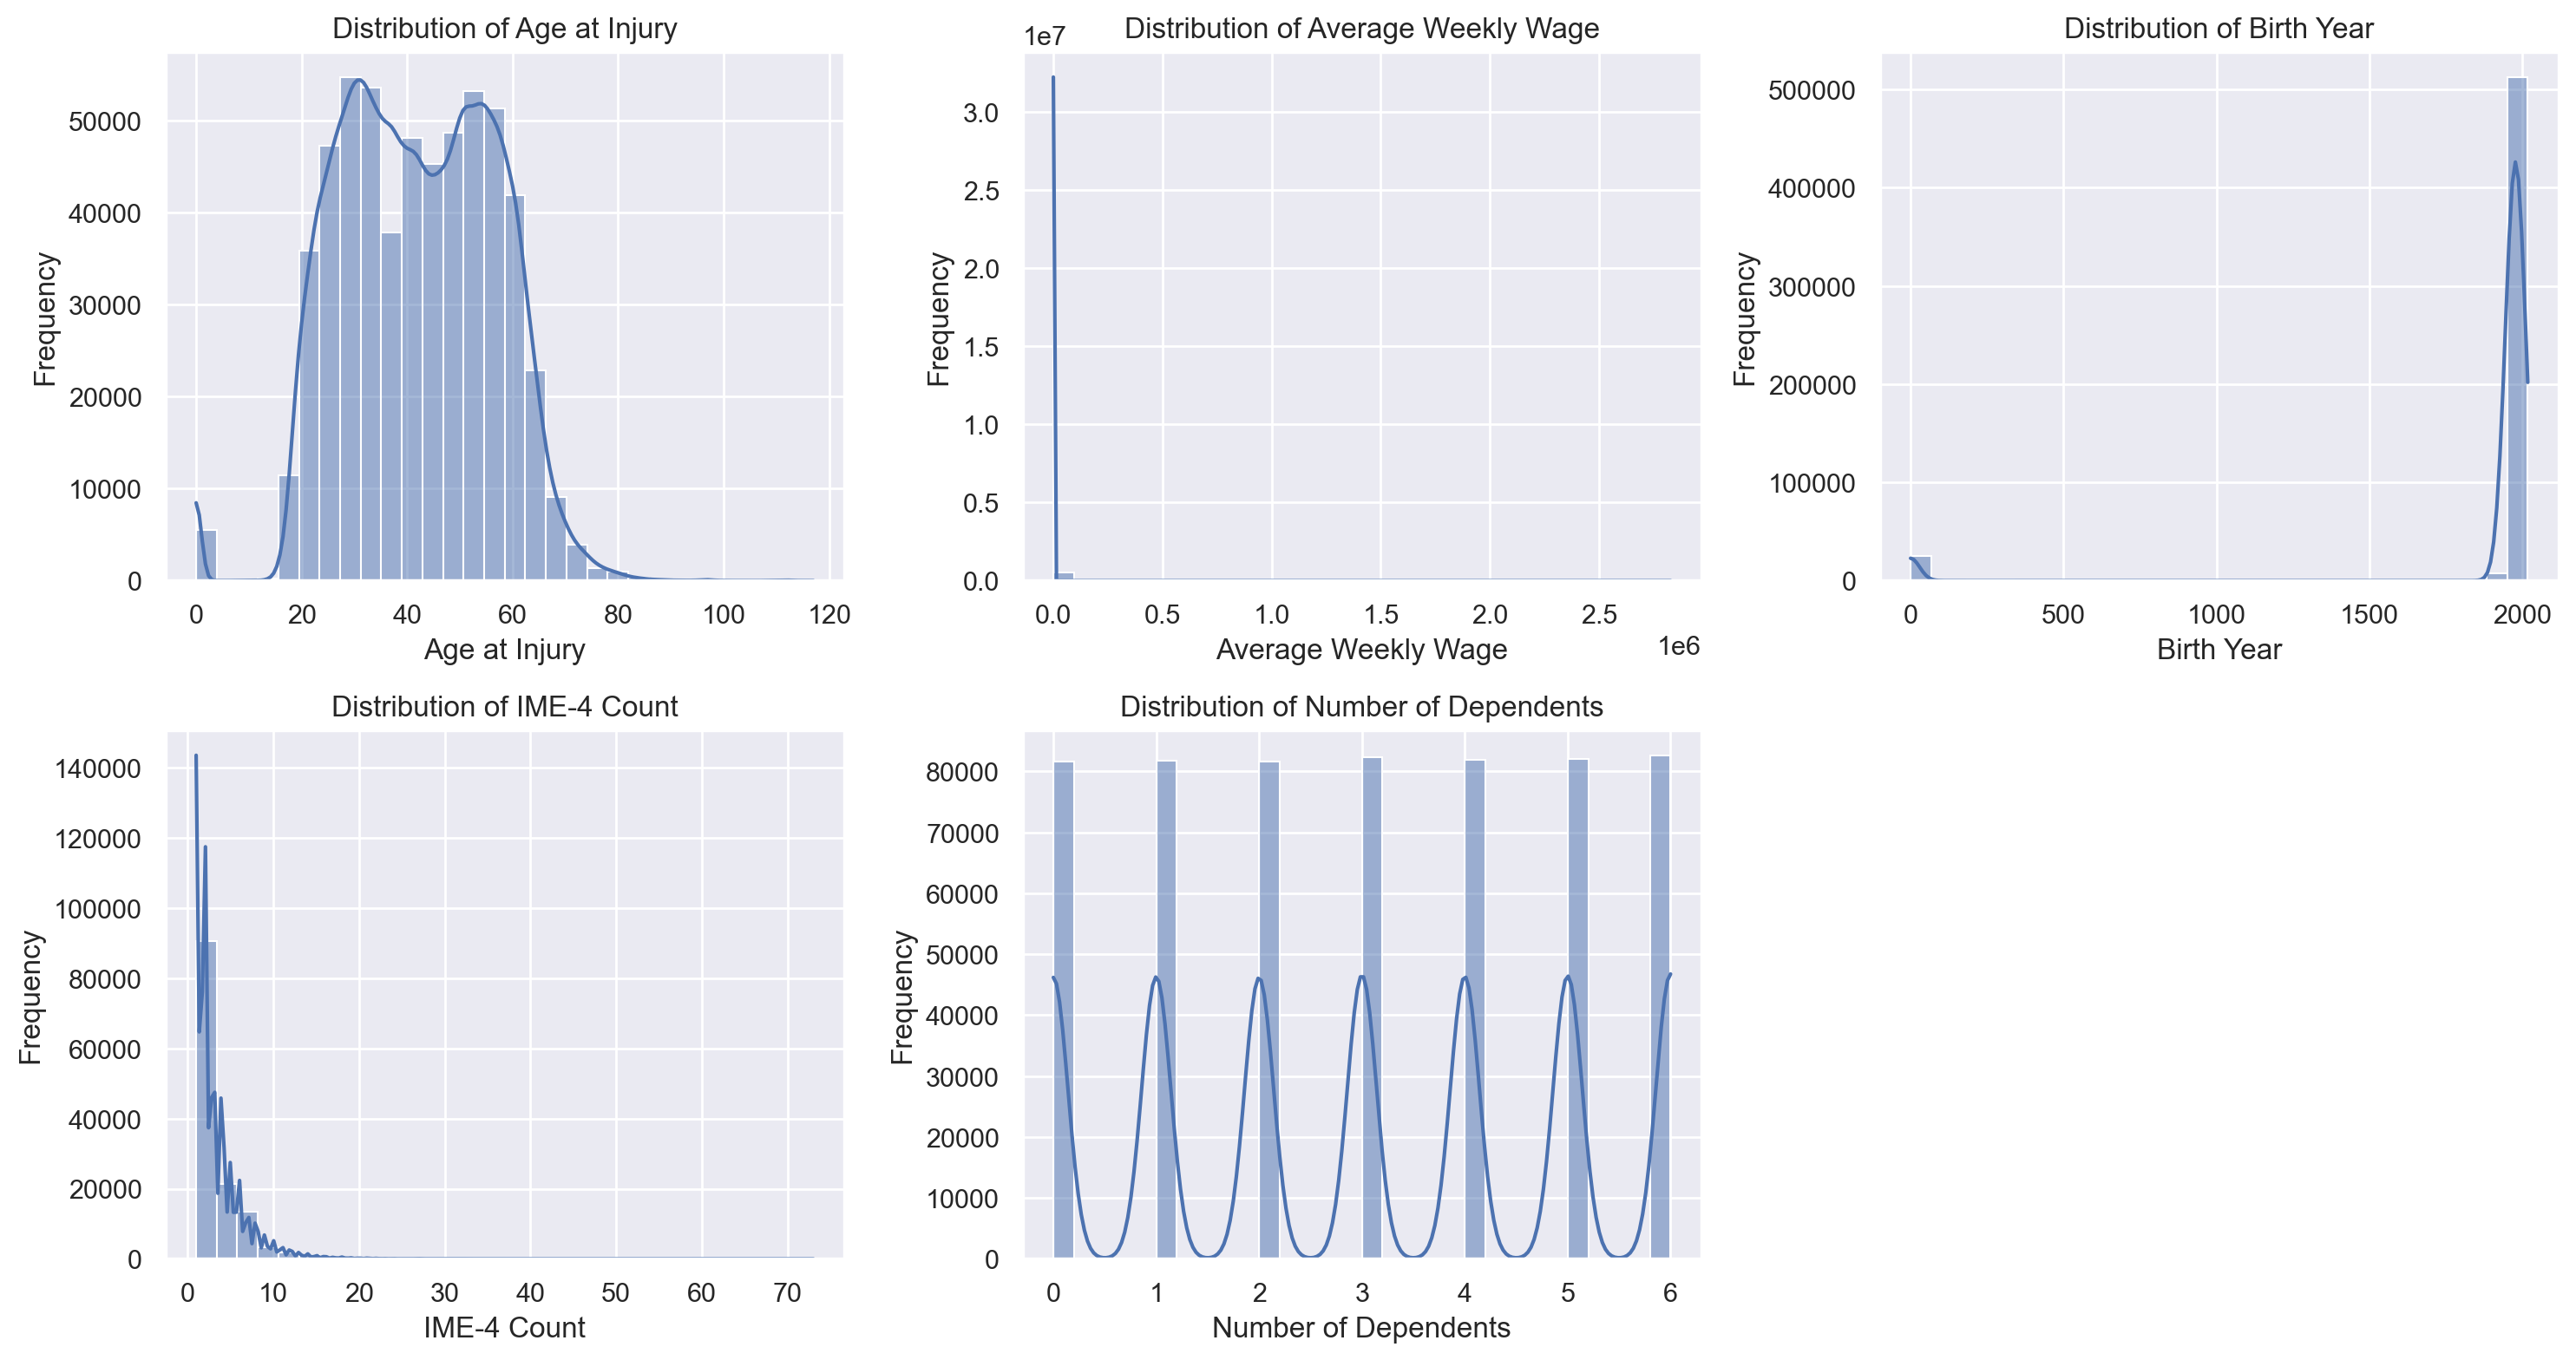

In [30]:
# Select numerical attributes with continuous values
numeric_attributes = wcb.loc[:, ['Age at Injury','Average Weekly Wage', 'Birth Year','IME-4 Count','Number of Dependents']]

# Set the number of subplots
num_attributes = len(numeric_attributes.columns)
num_cols = 3  # Set the number of columns for the subplots
num_rows = (num_attributes // num_cols) + (num_attributes % num_cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes

# Loop through each numerical attribute and plot its distribution
for i, column in enumerate(numeric_attributes.columns):
    sns.histplot(numeric_attributes[column], bins=30, kde=True, ax=axes[i])  # KDE adds a density curve
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Categorical Data Visualization

For categorical data, we plotted a bar chart showing frequency of unique values: 

this visualization is not ideal for following attributes, that present more dense values <br>
`Zip Code` <br>
`Carrier Name` <br>

[ ] change visual for these attributes

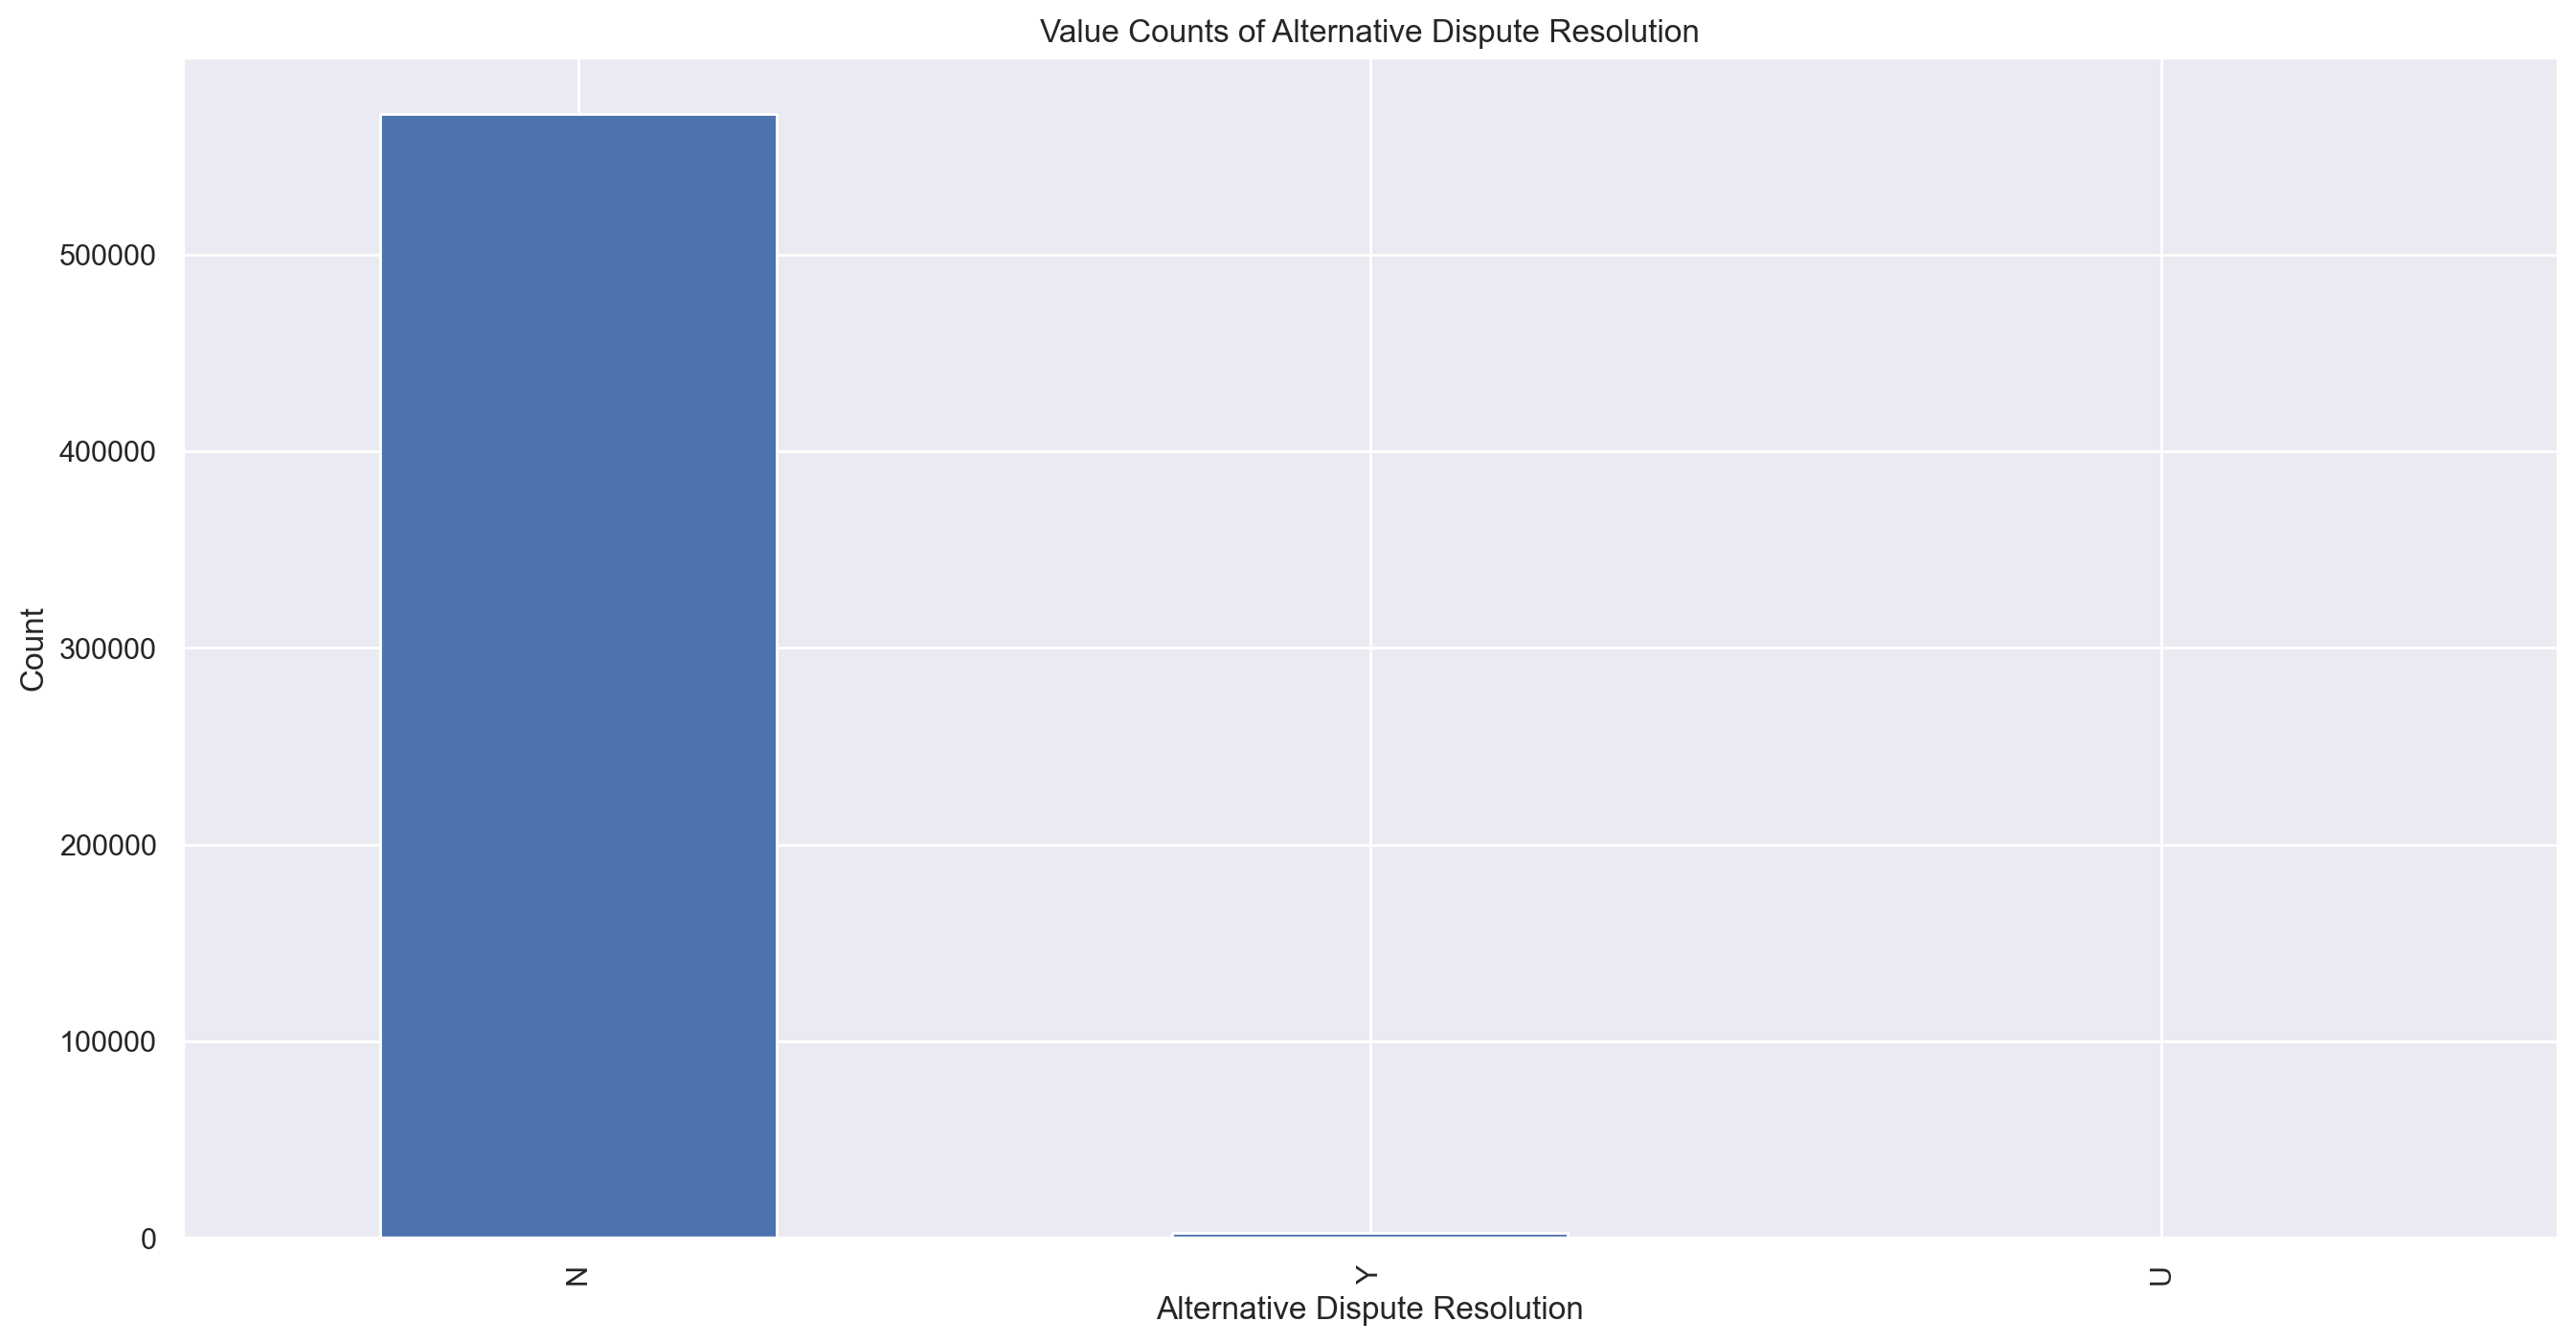

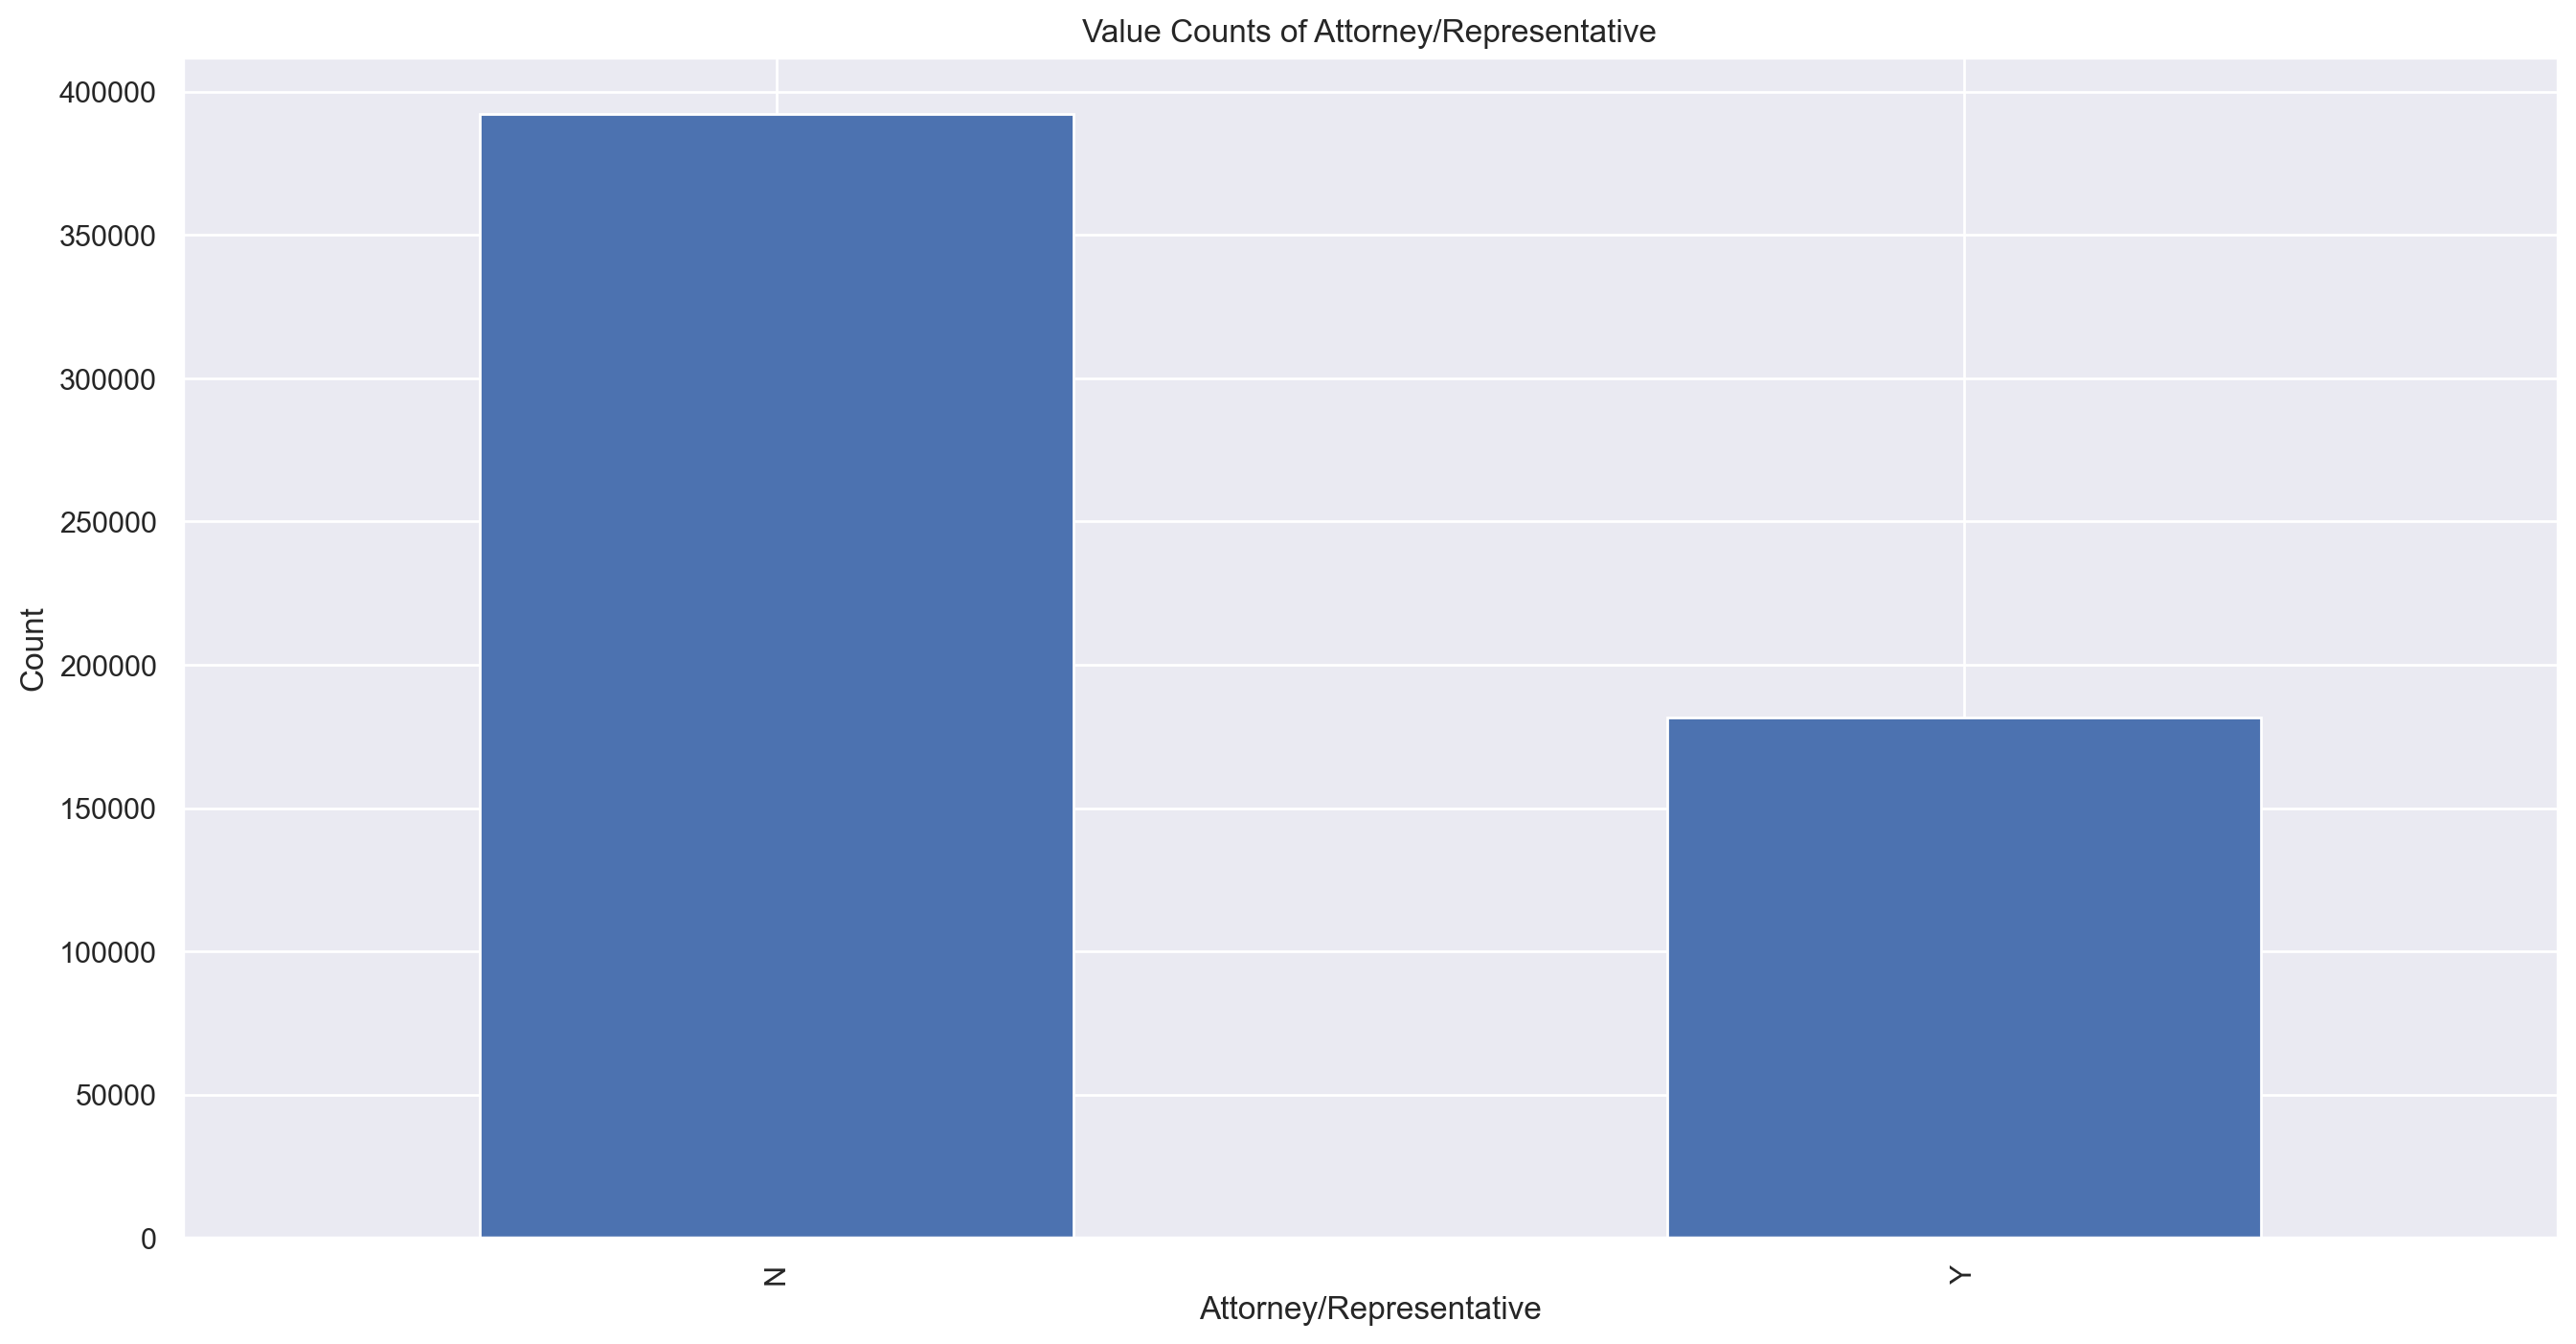

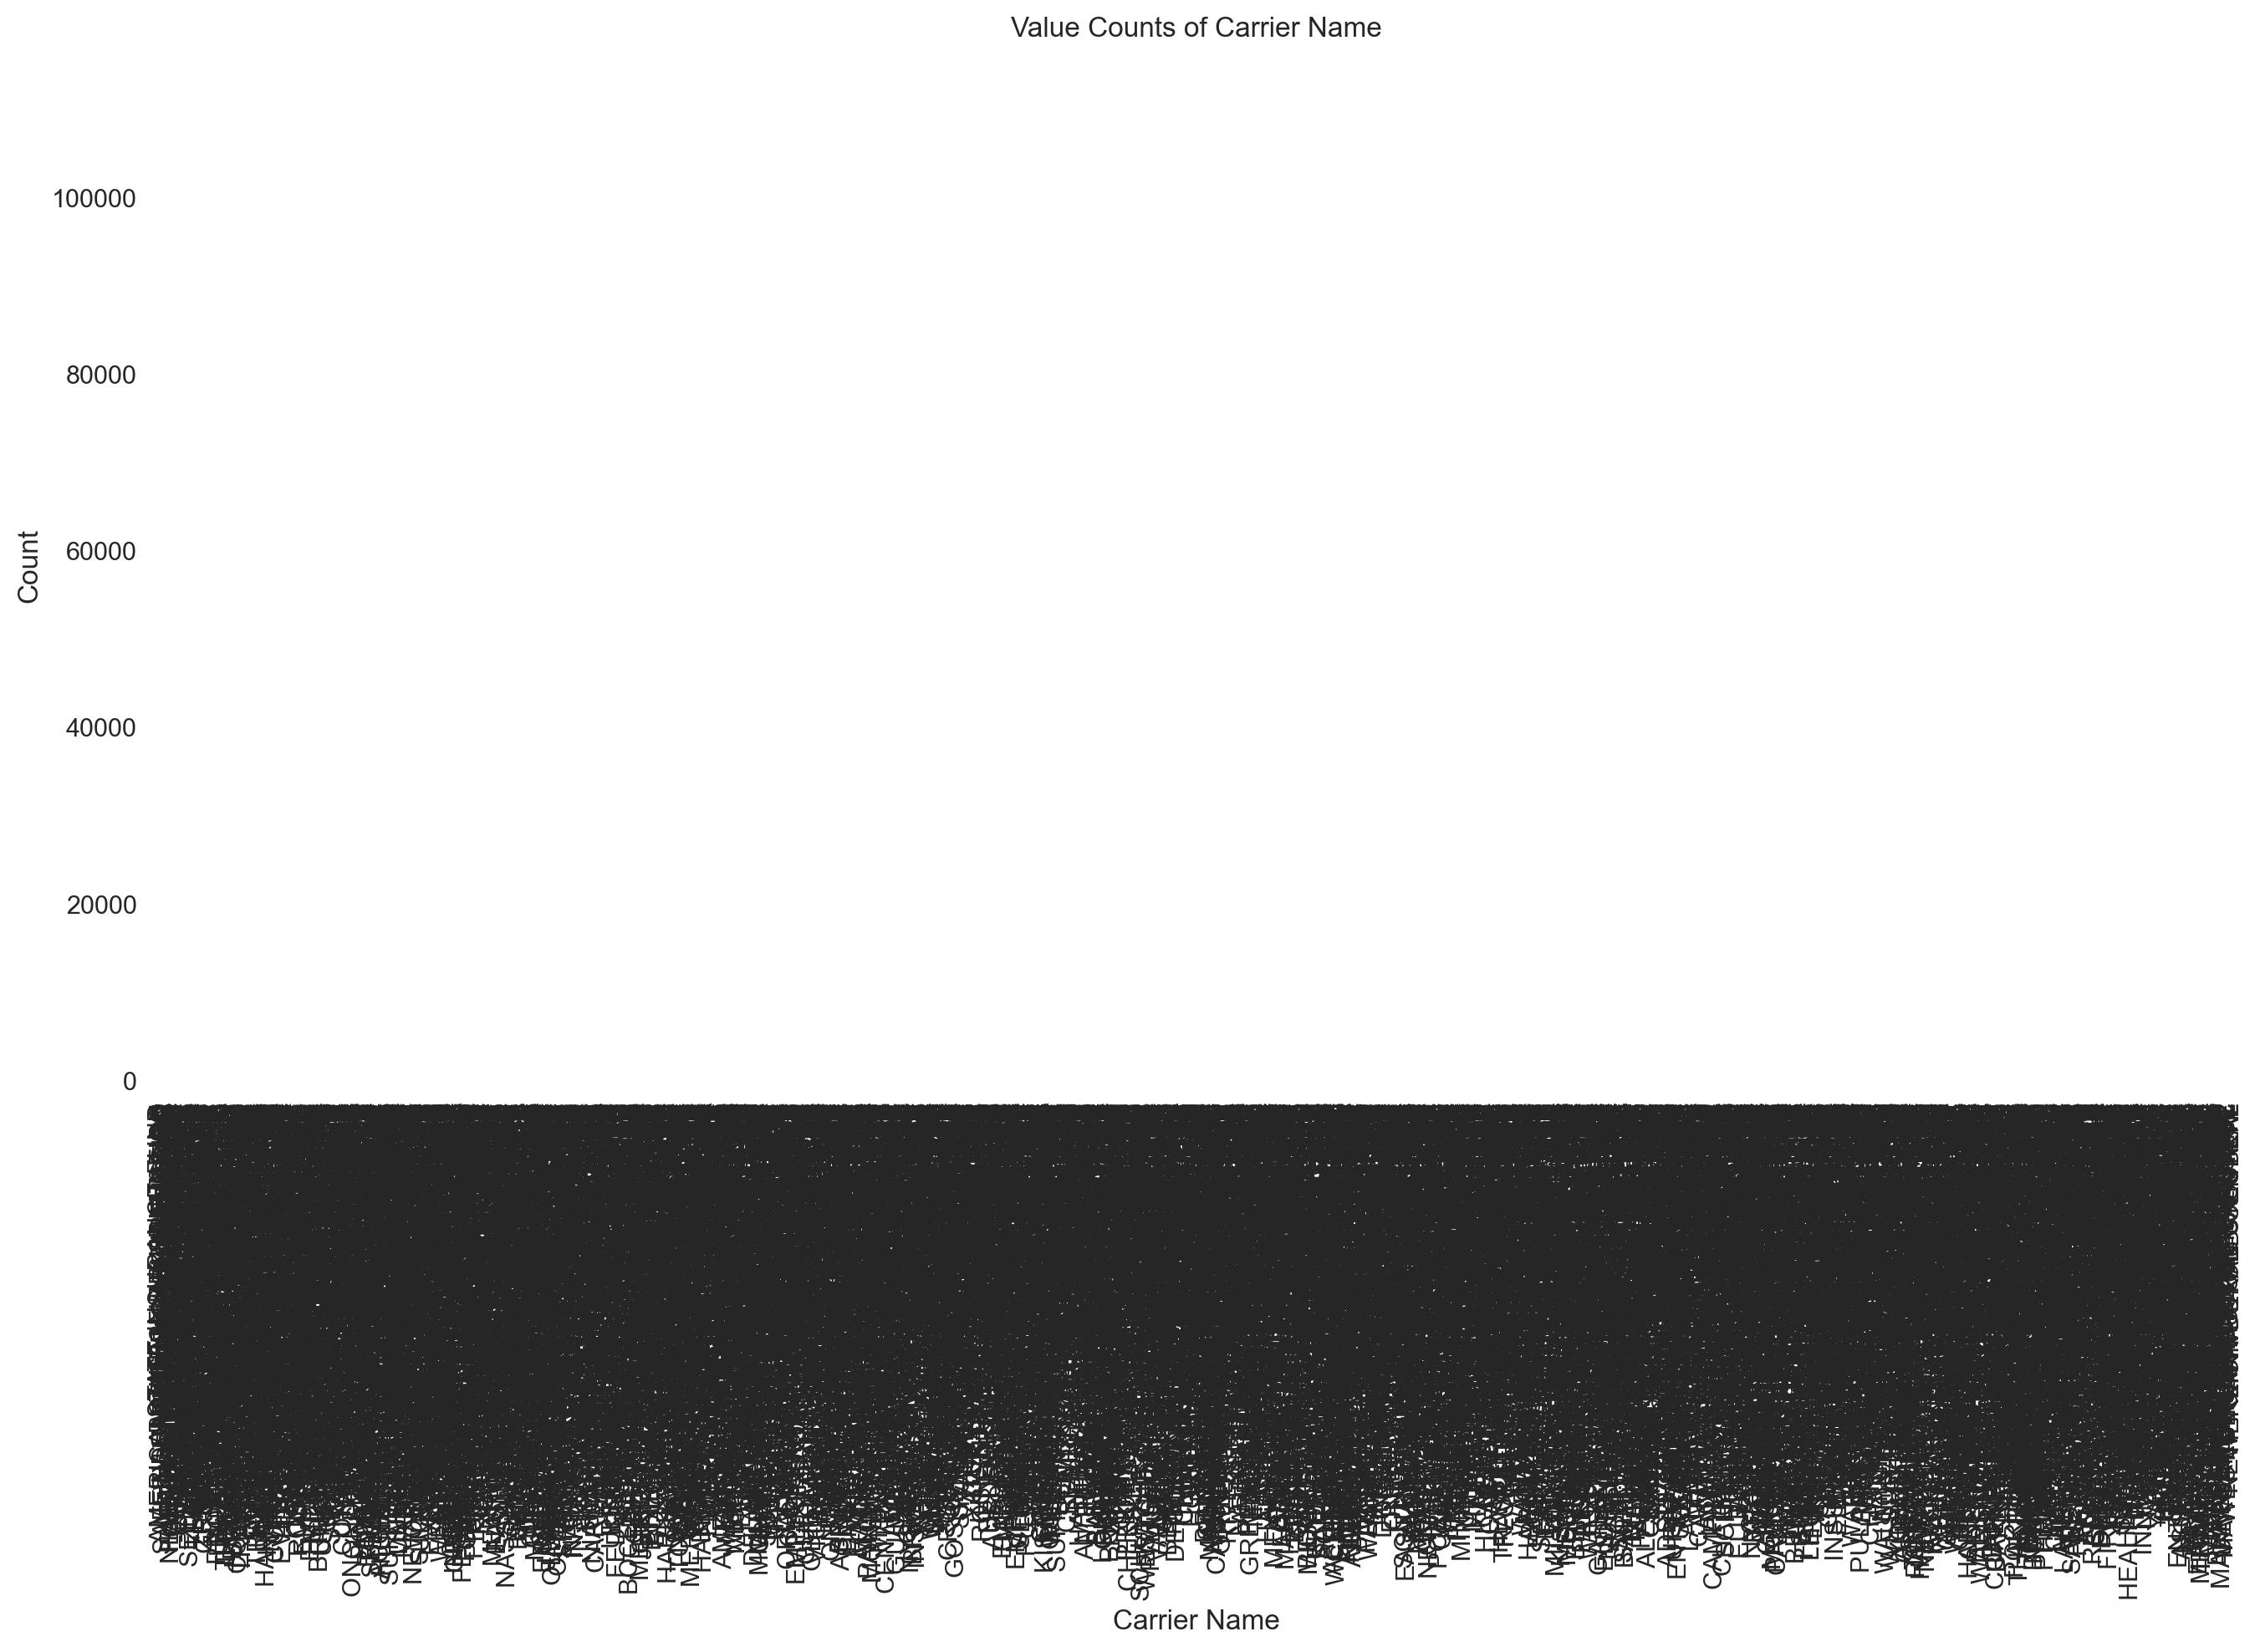

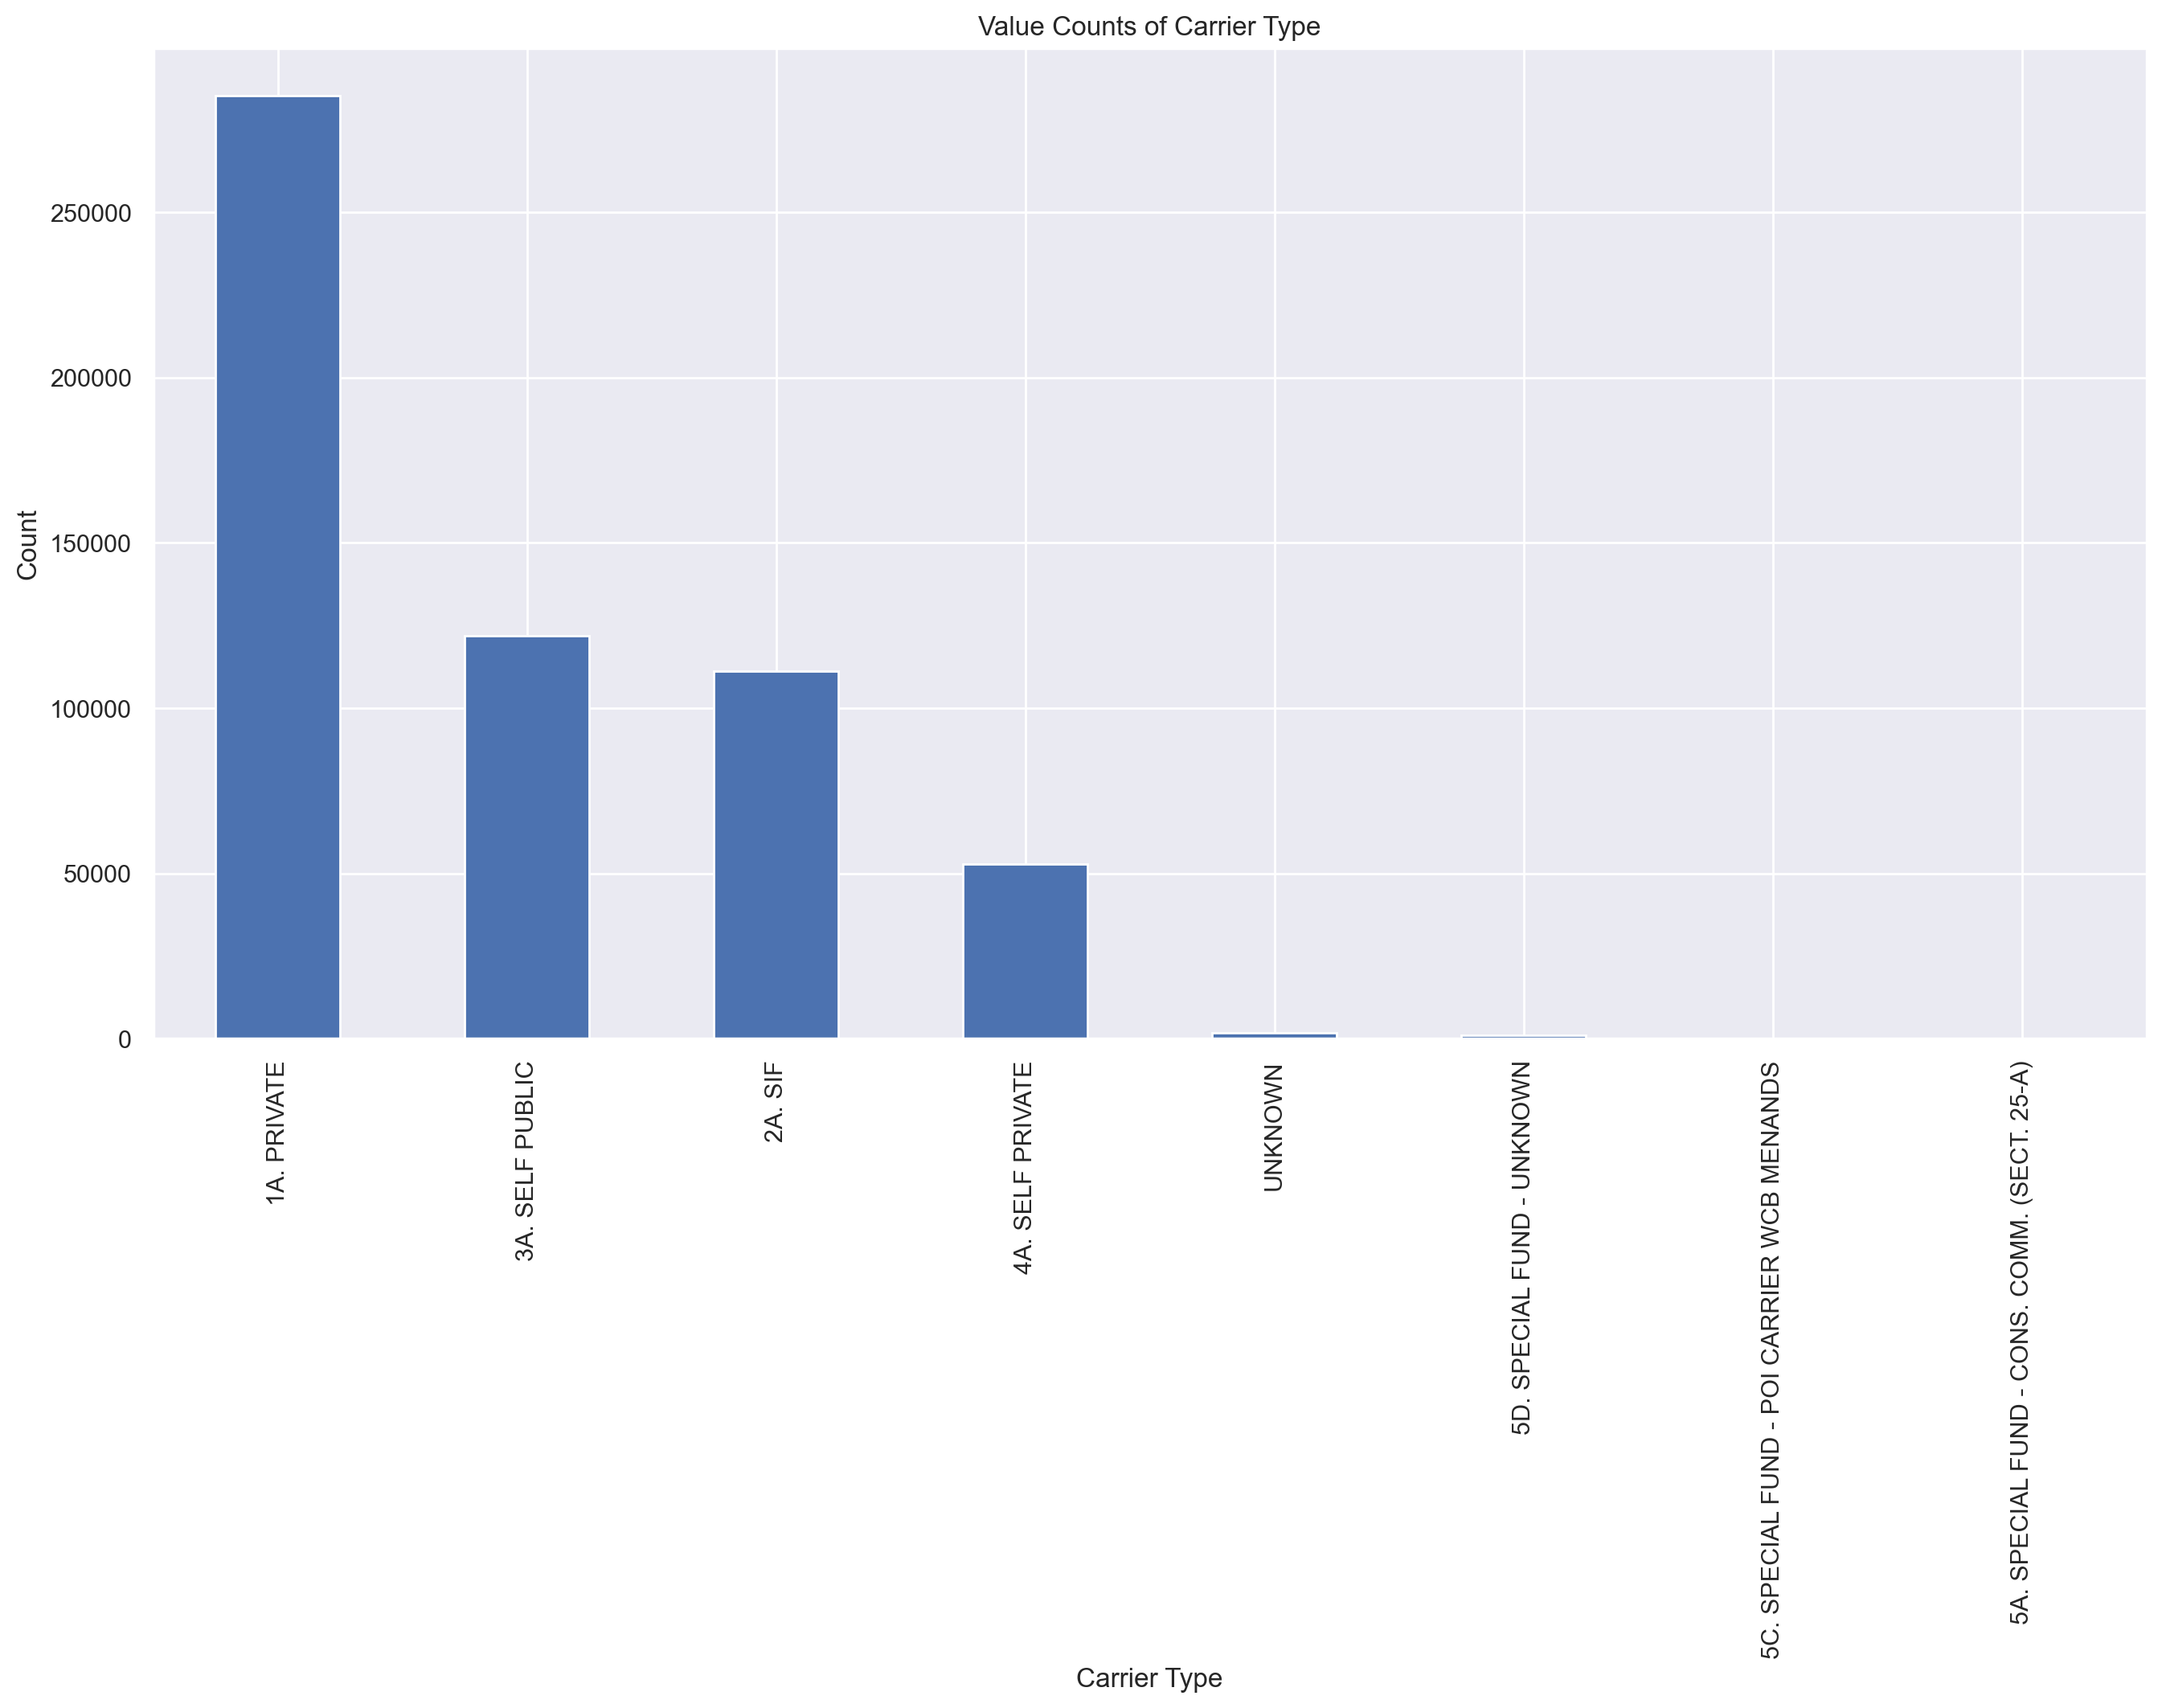

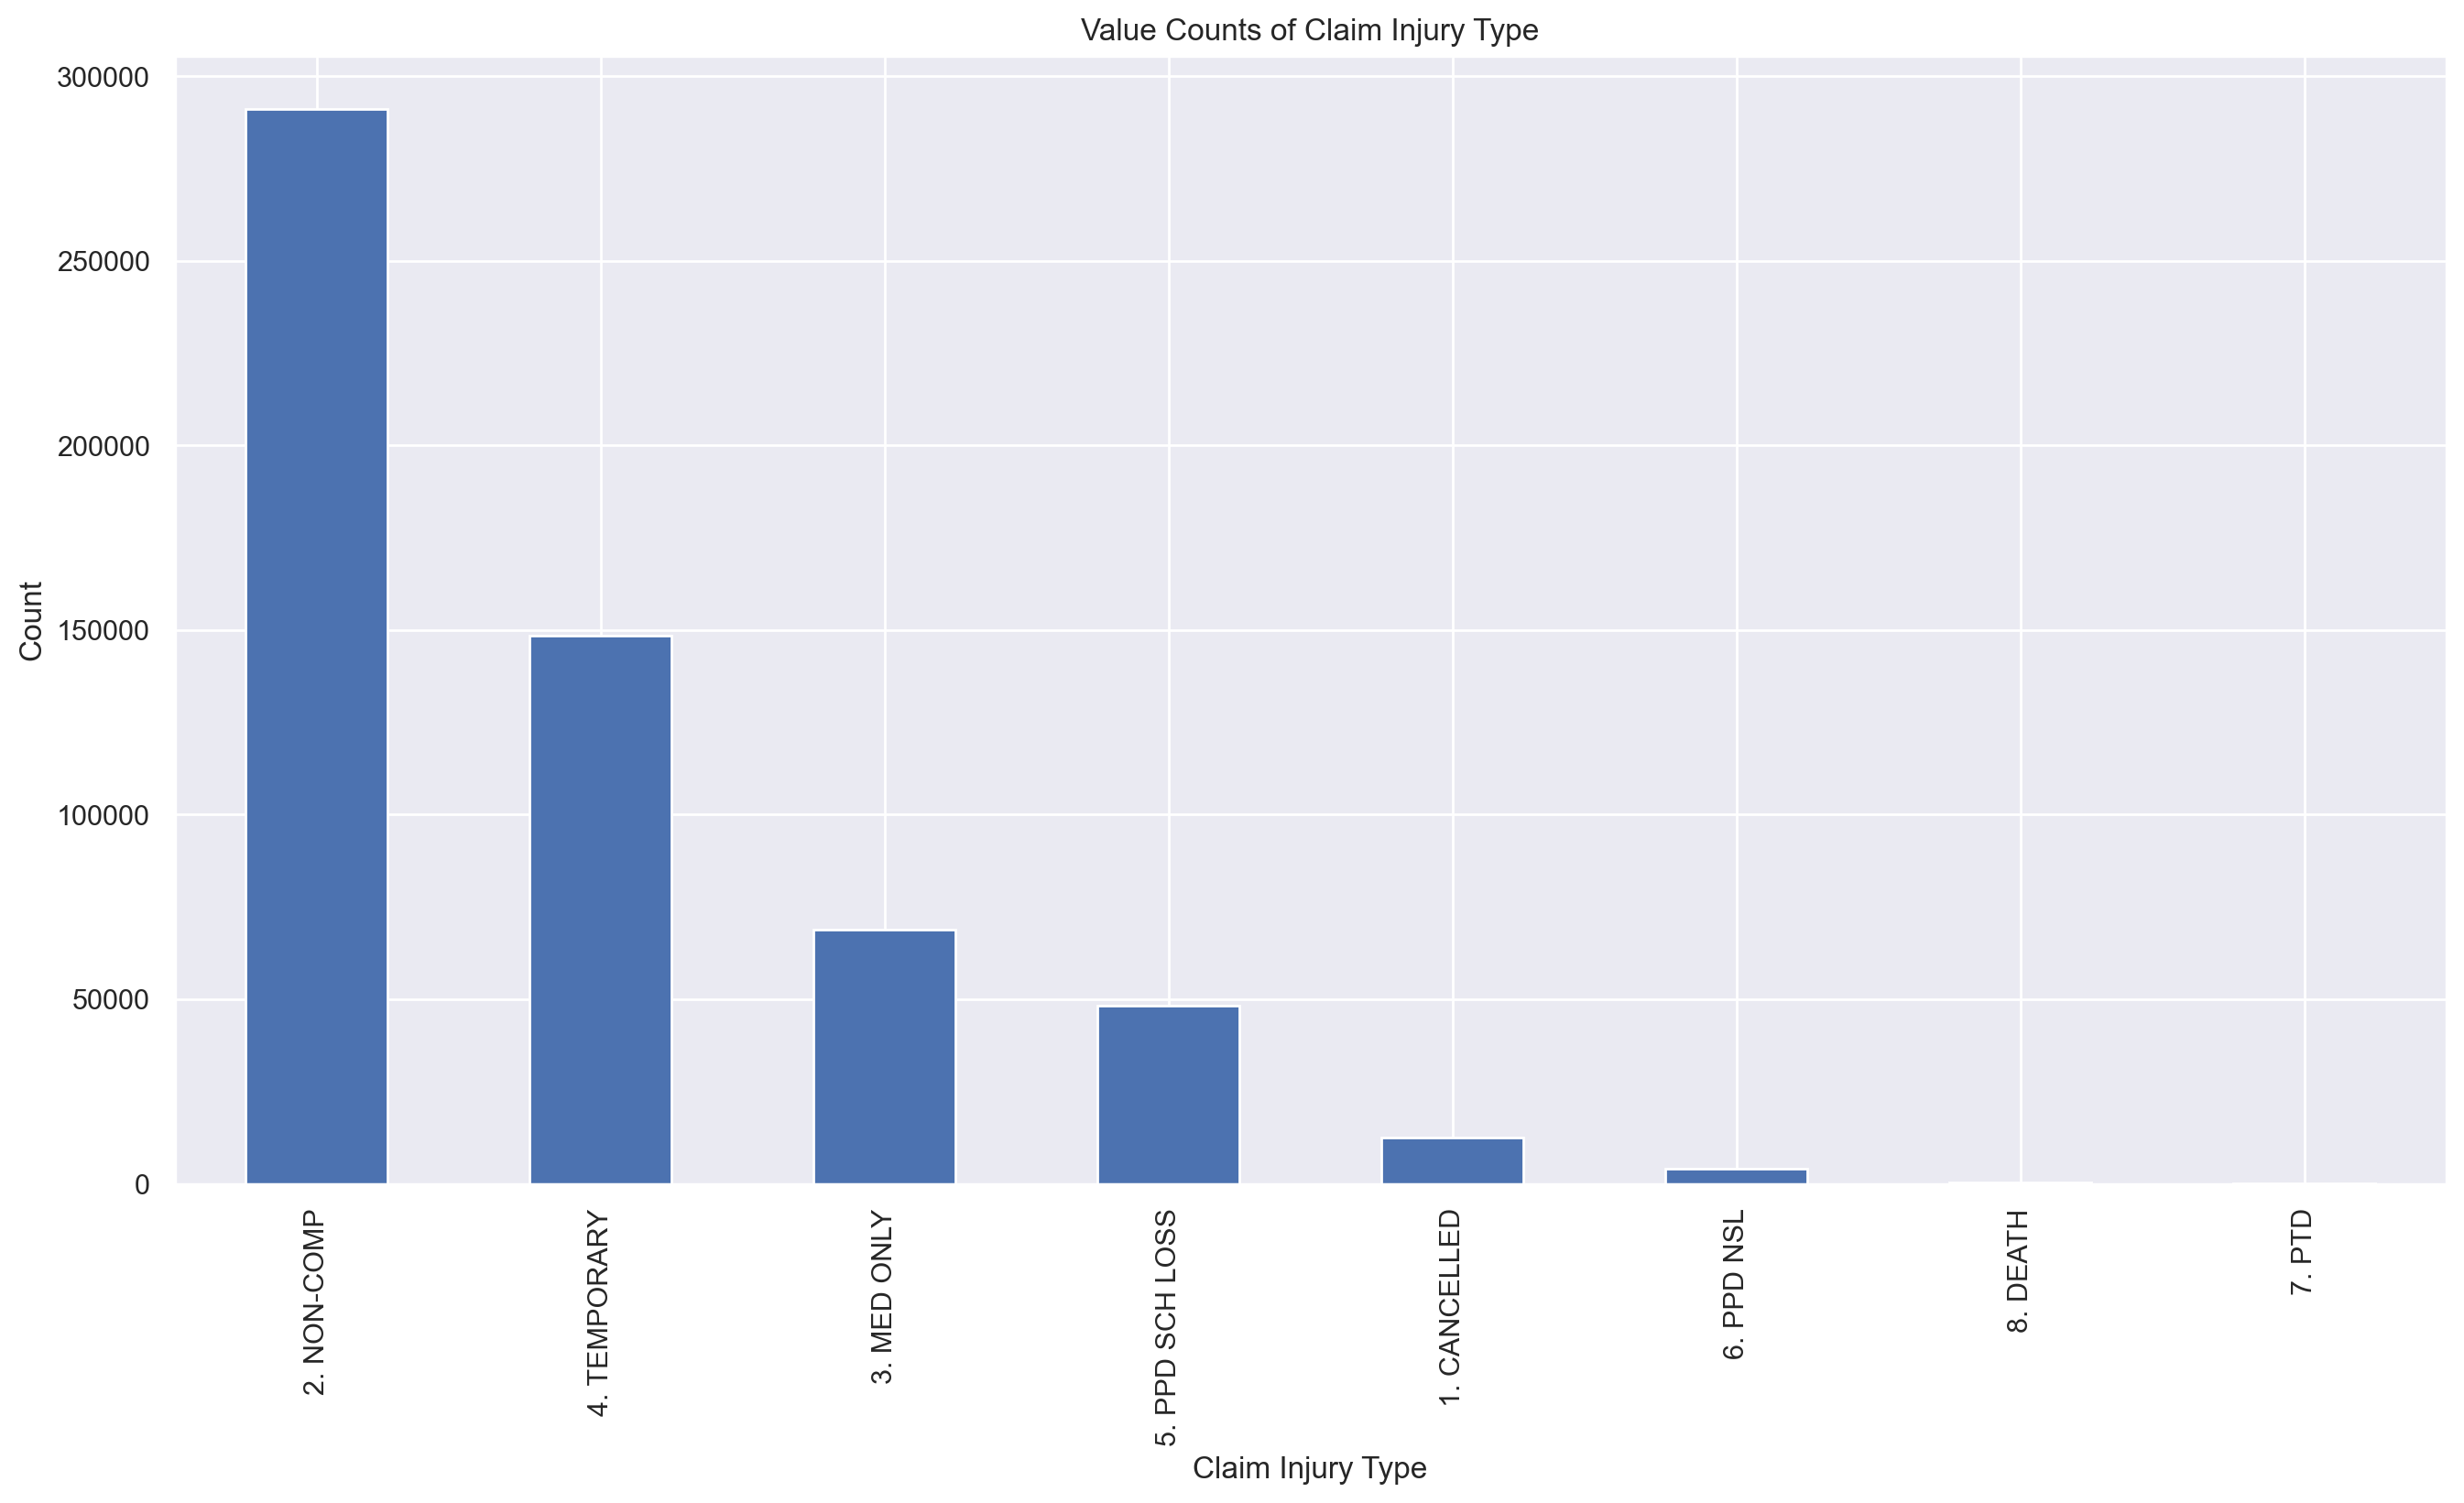

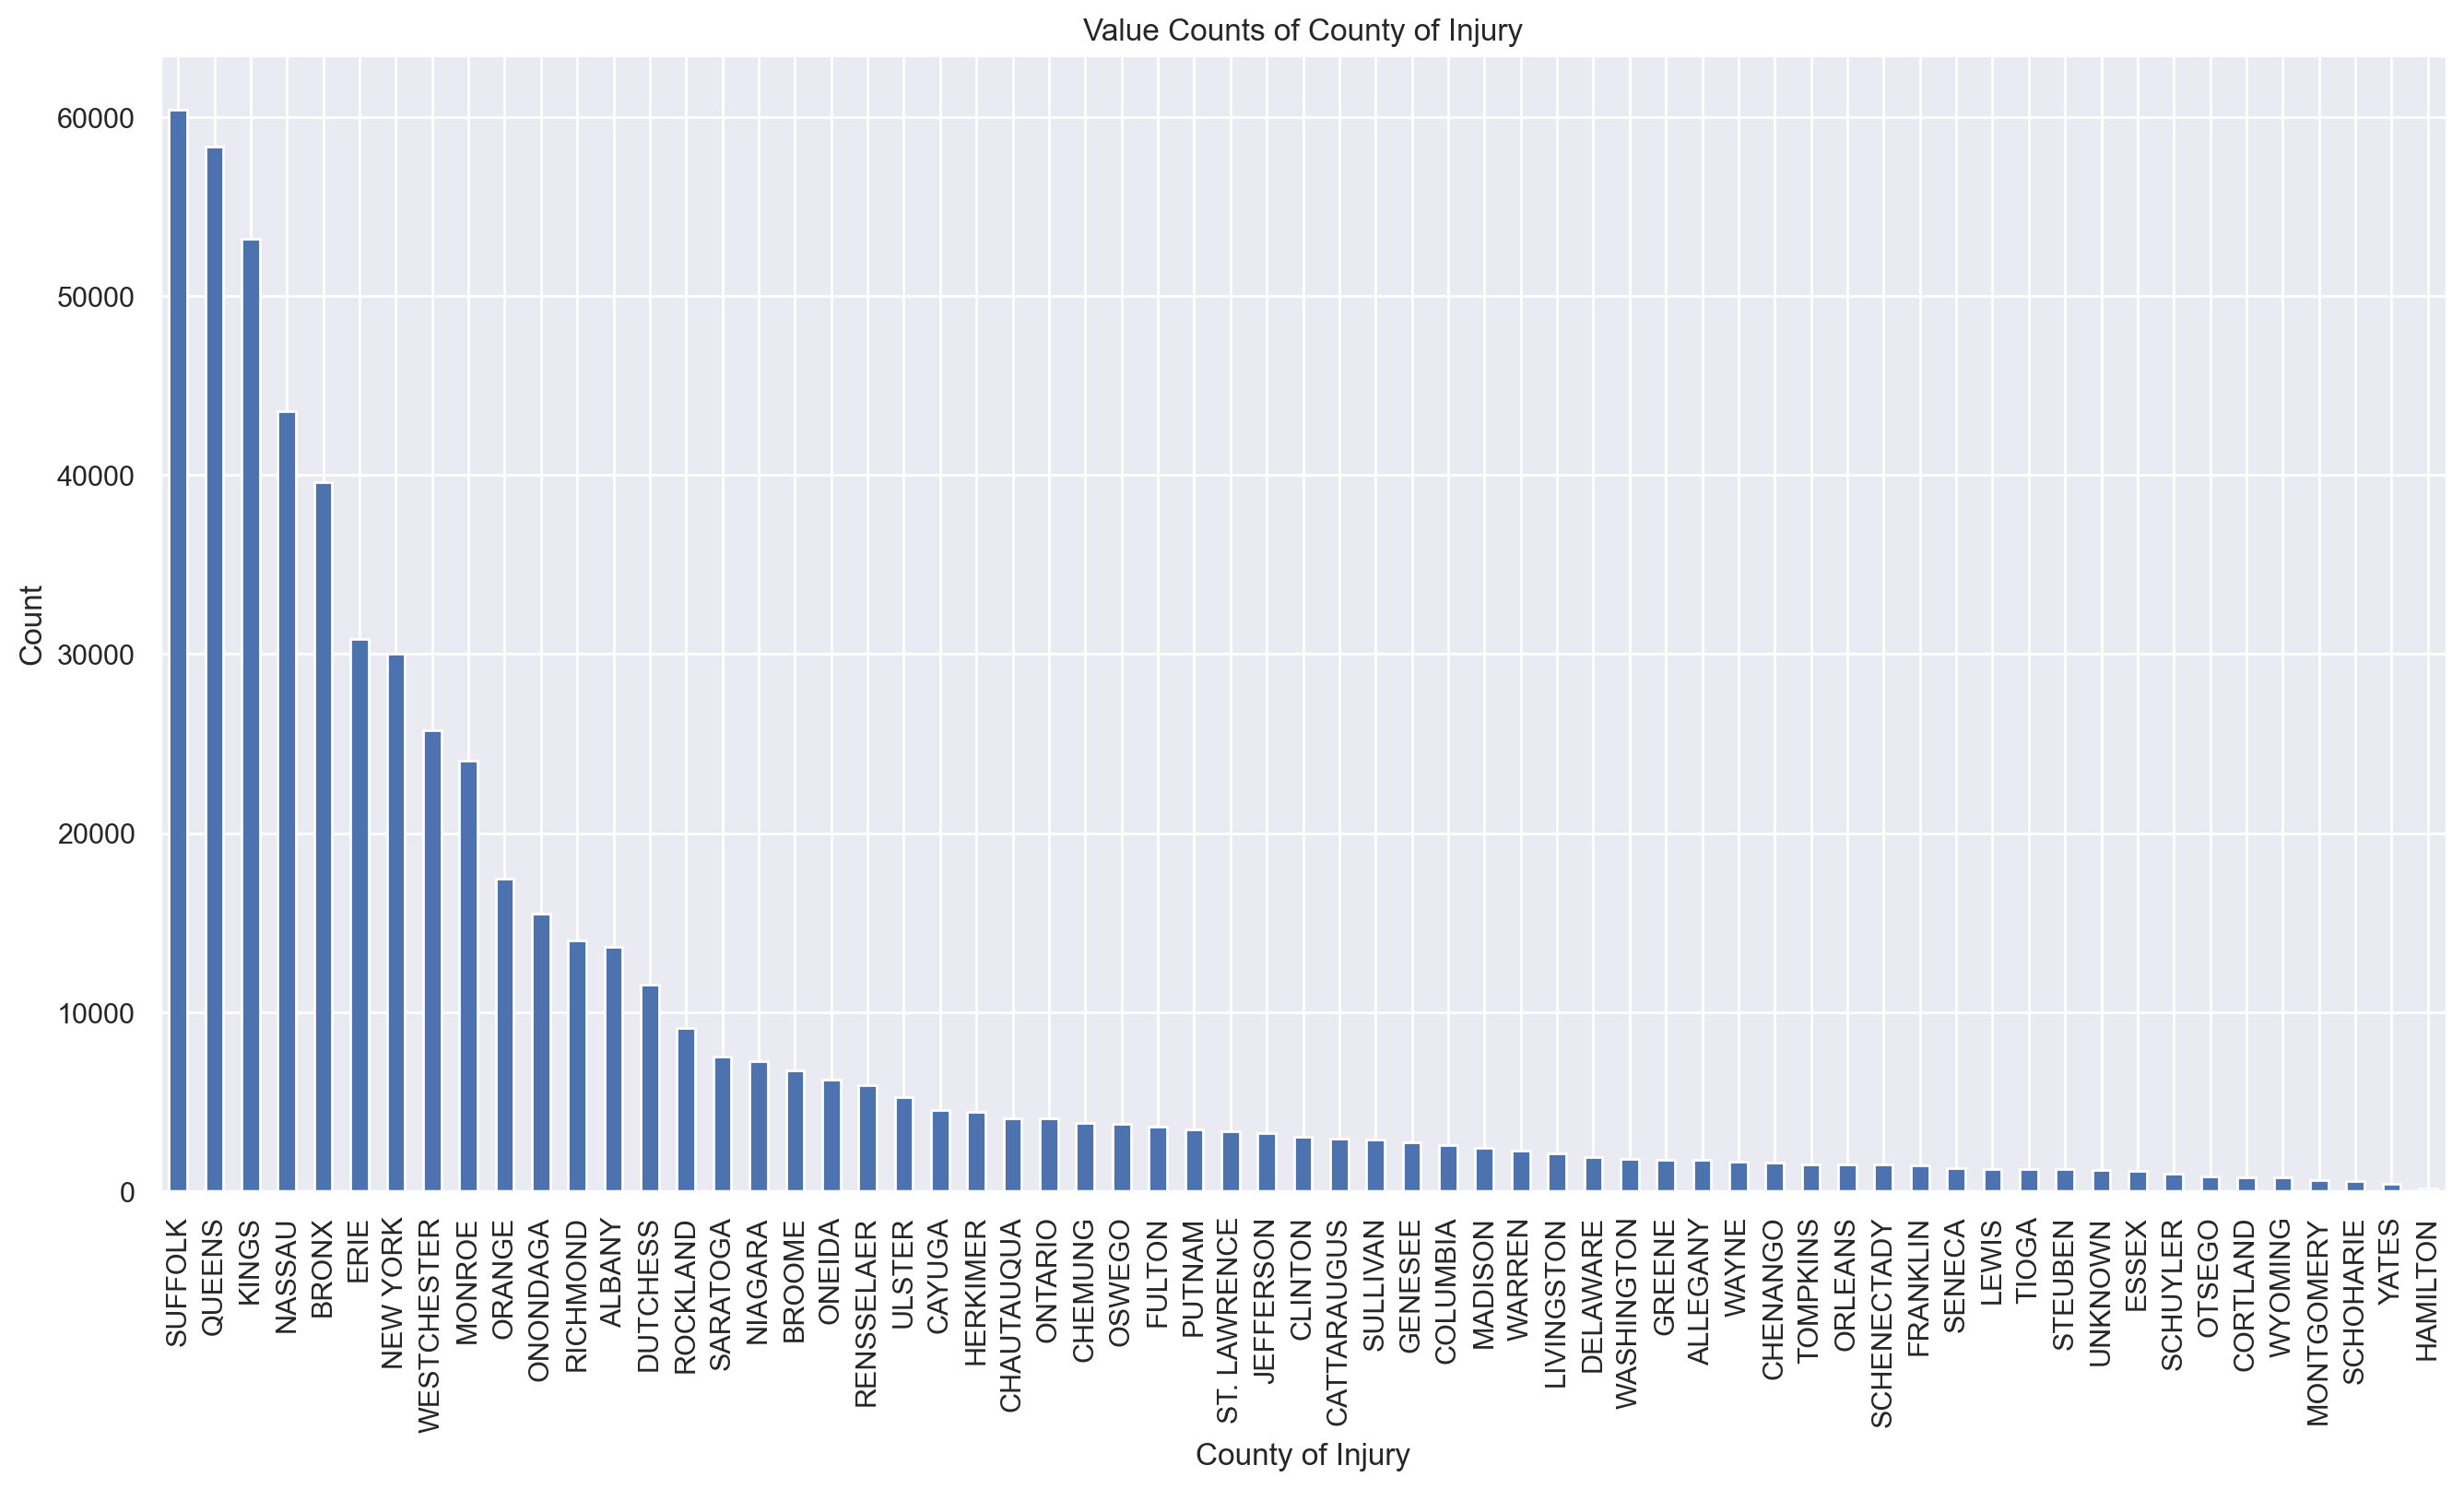

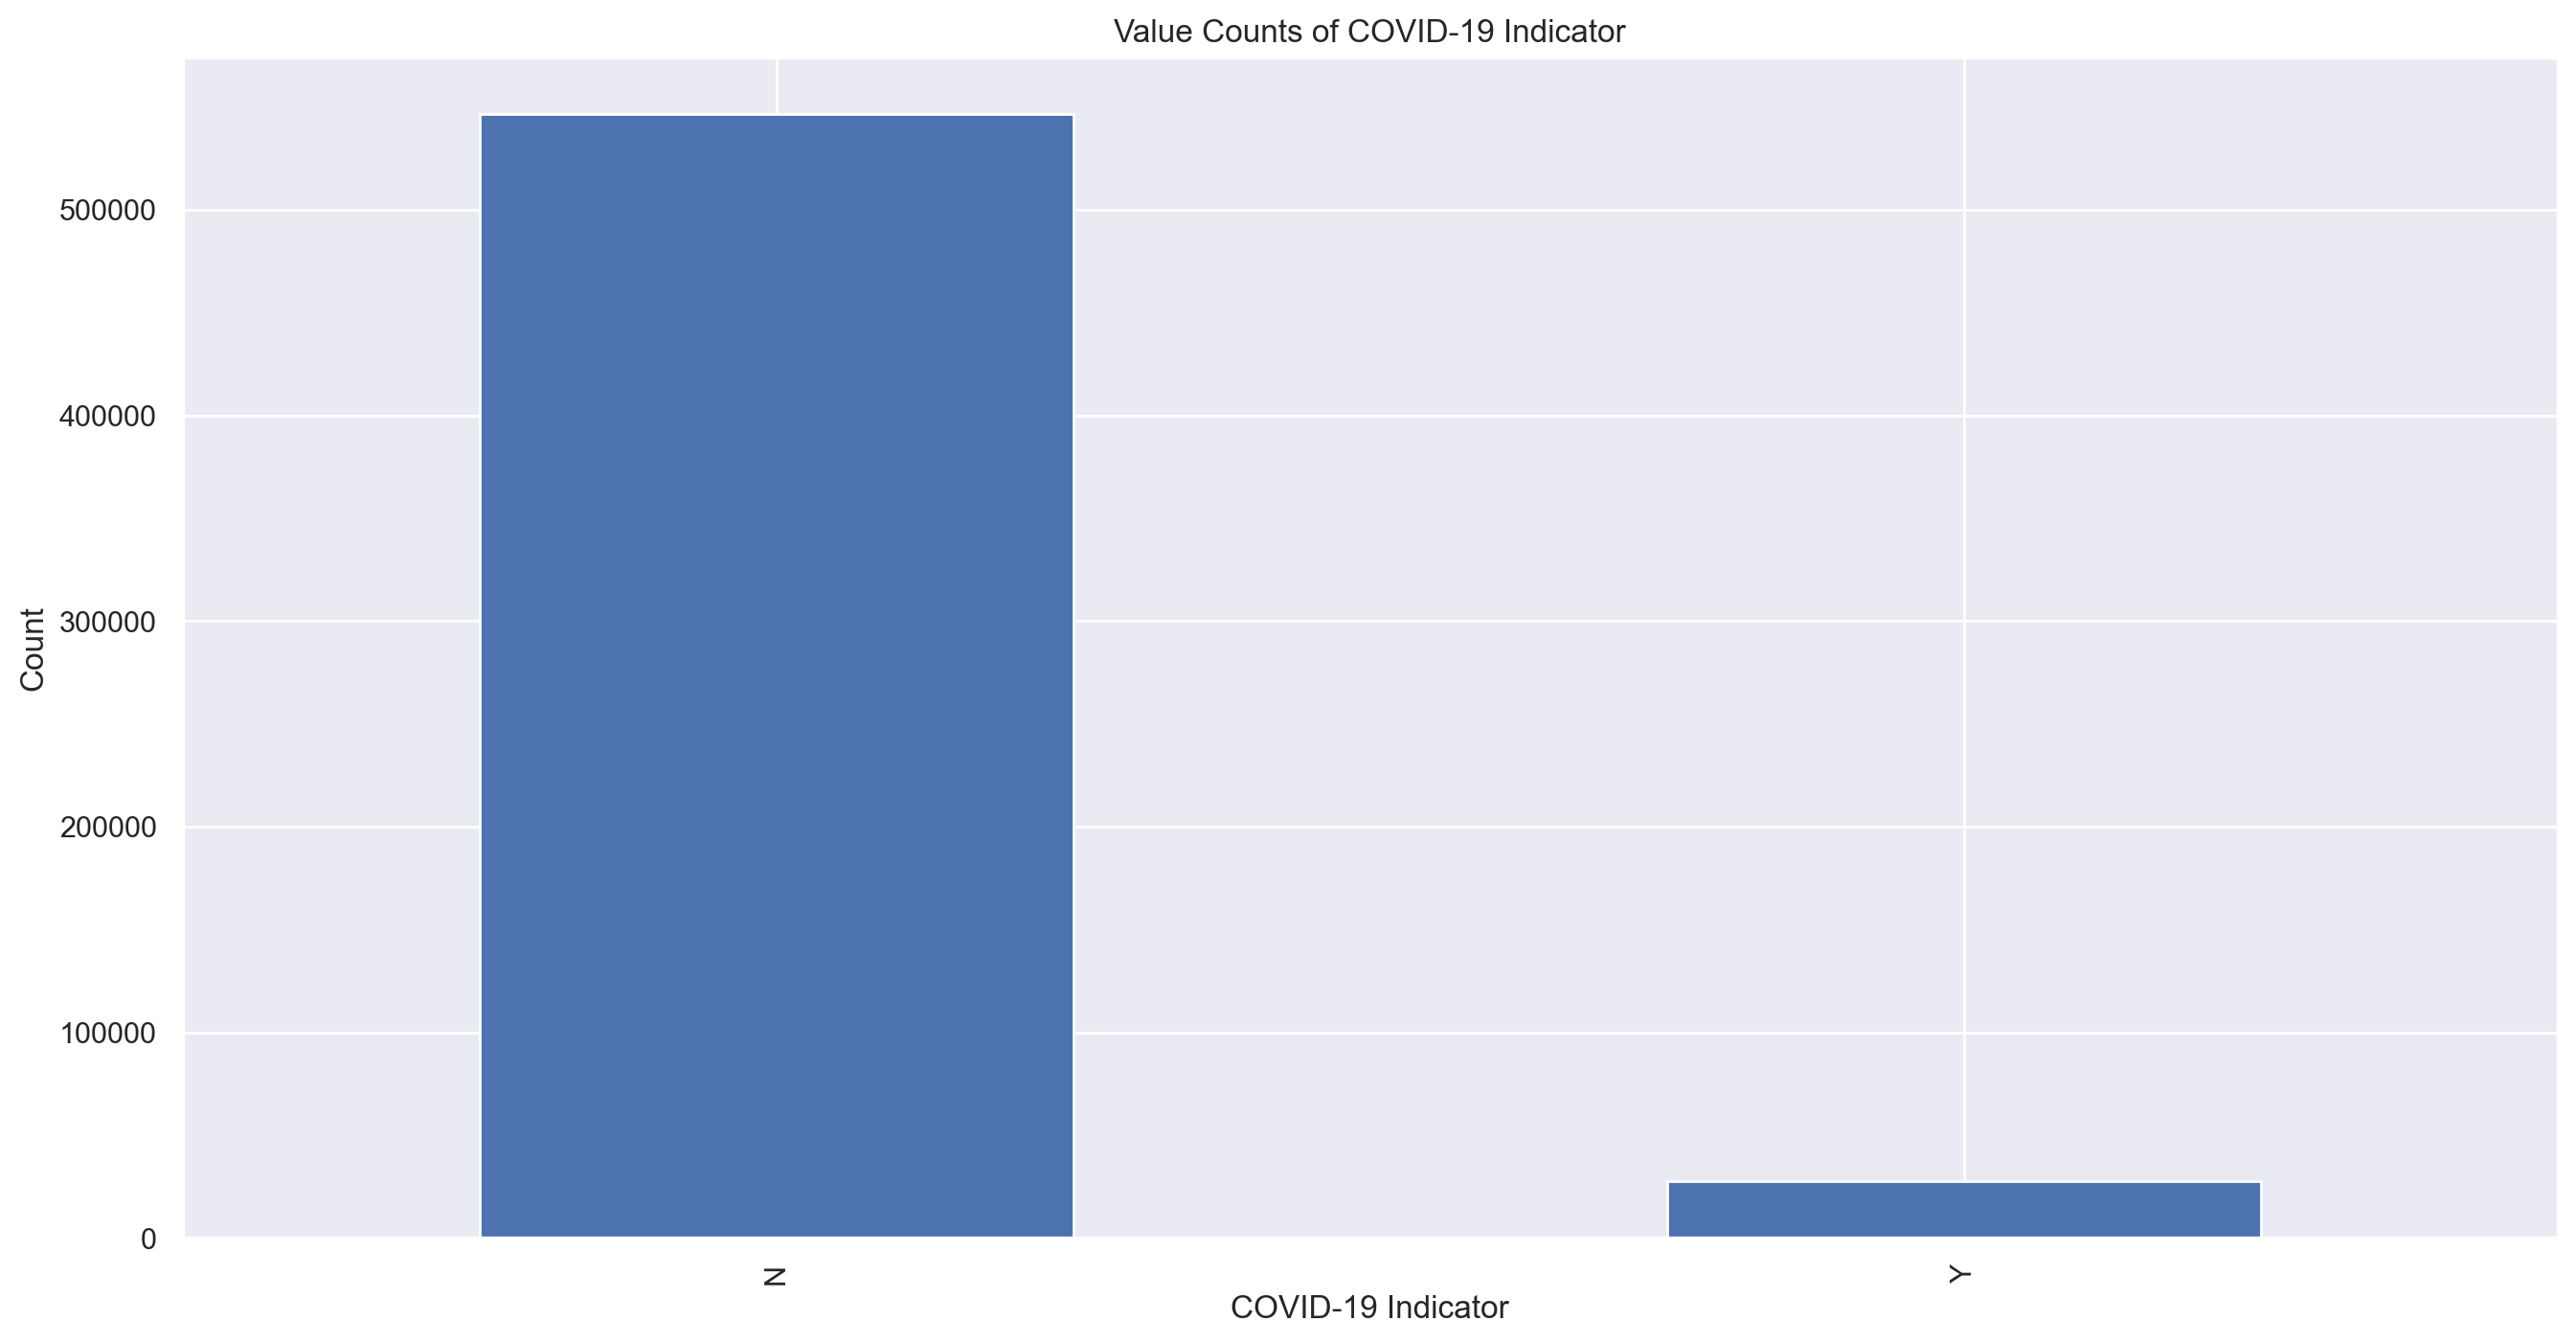

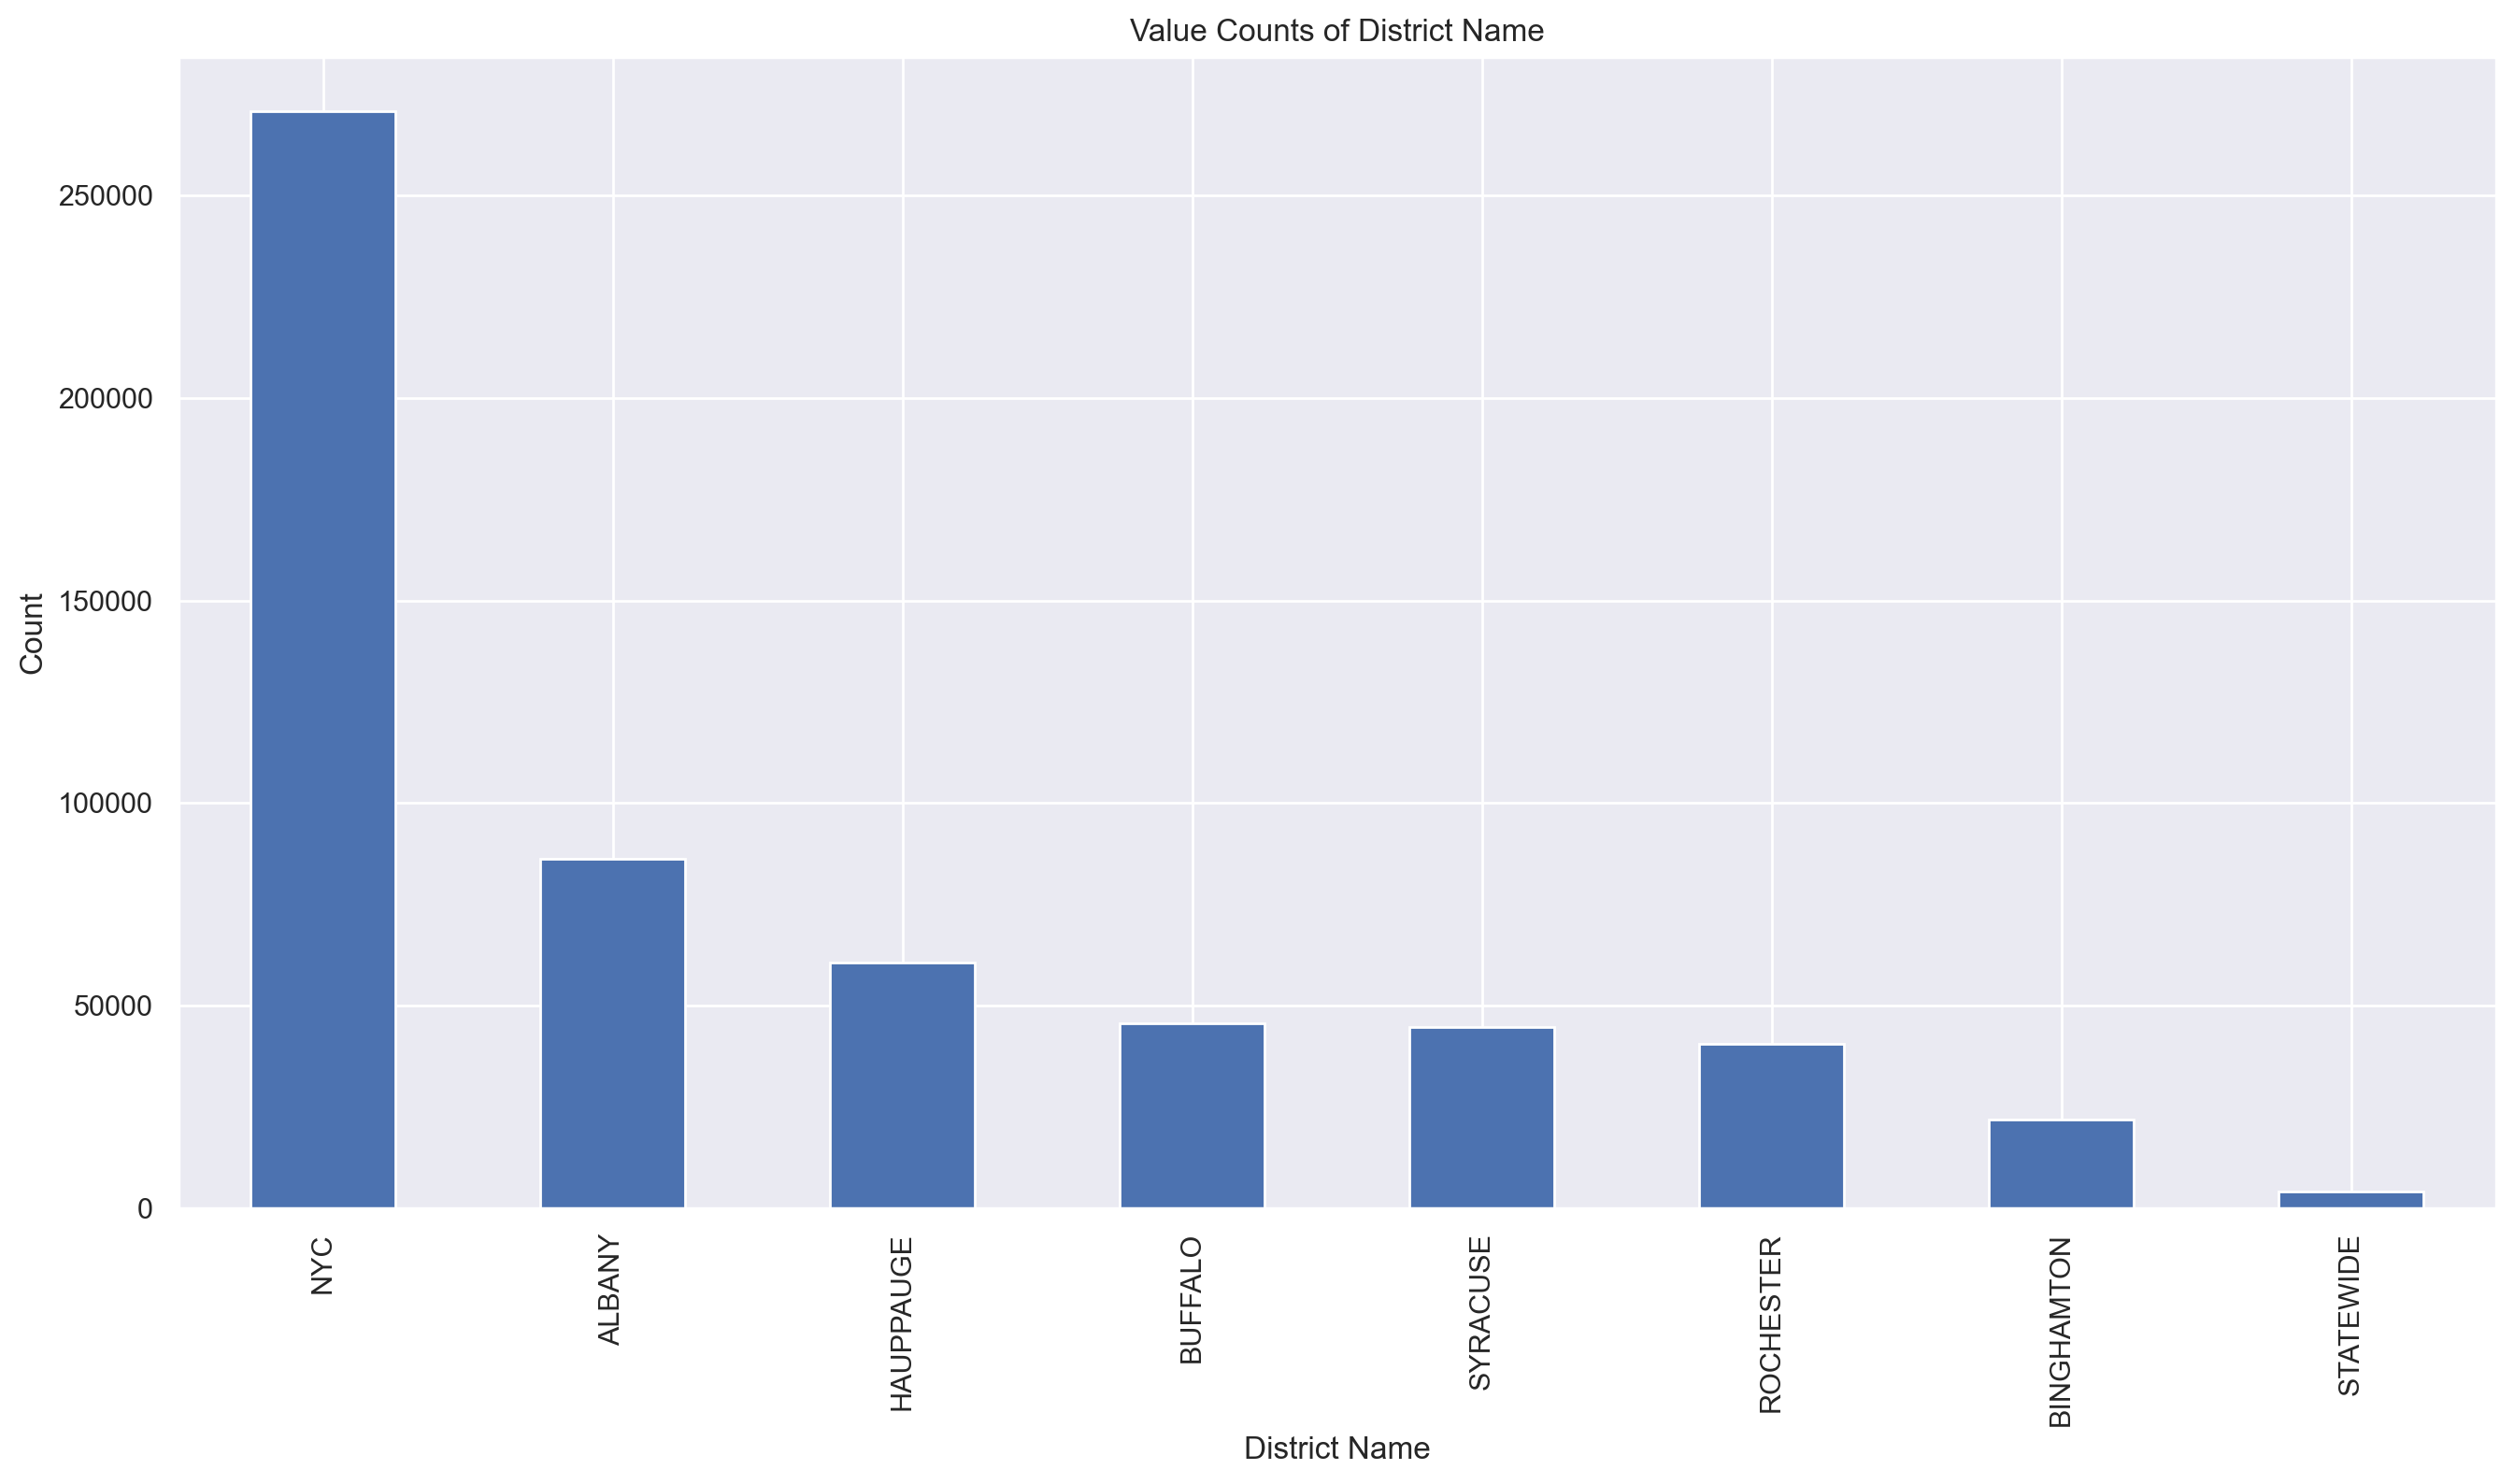

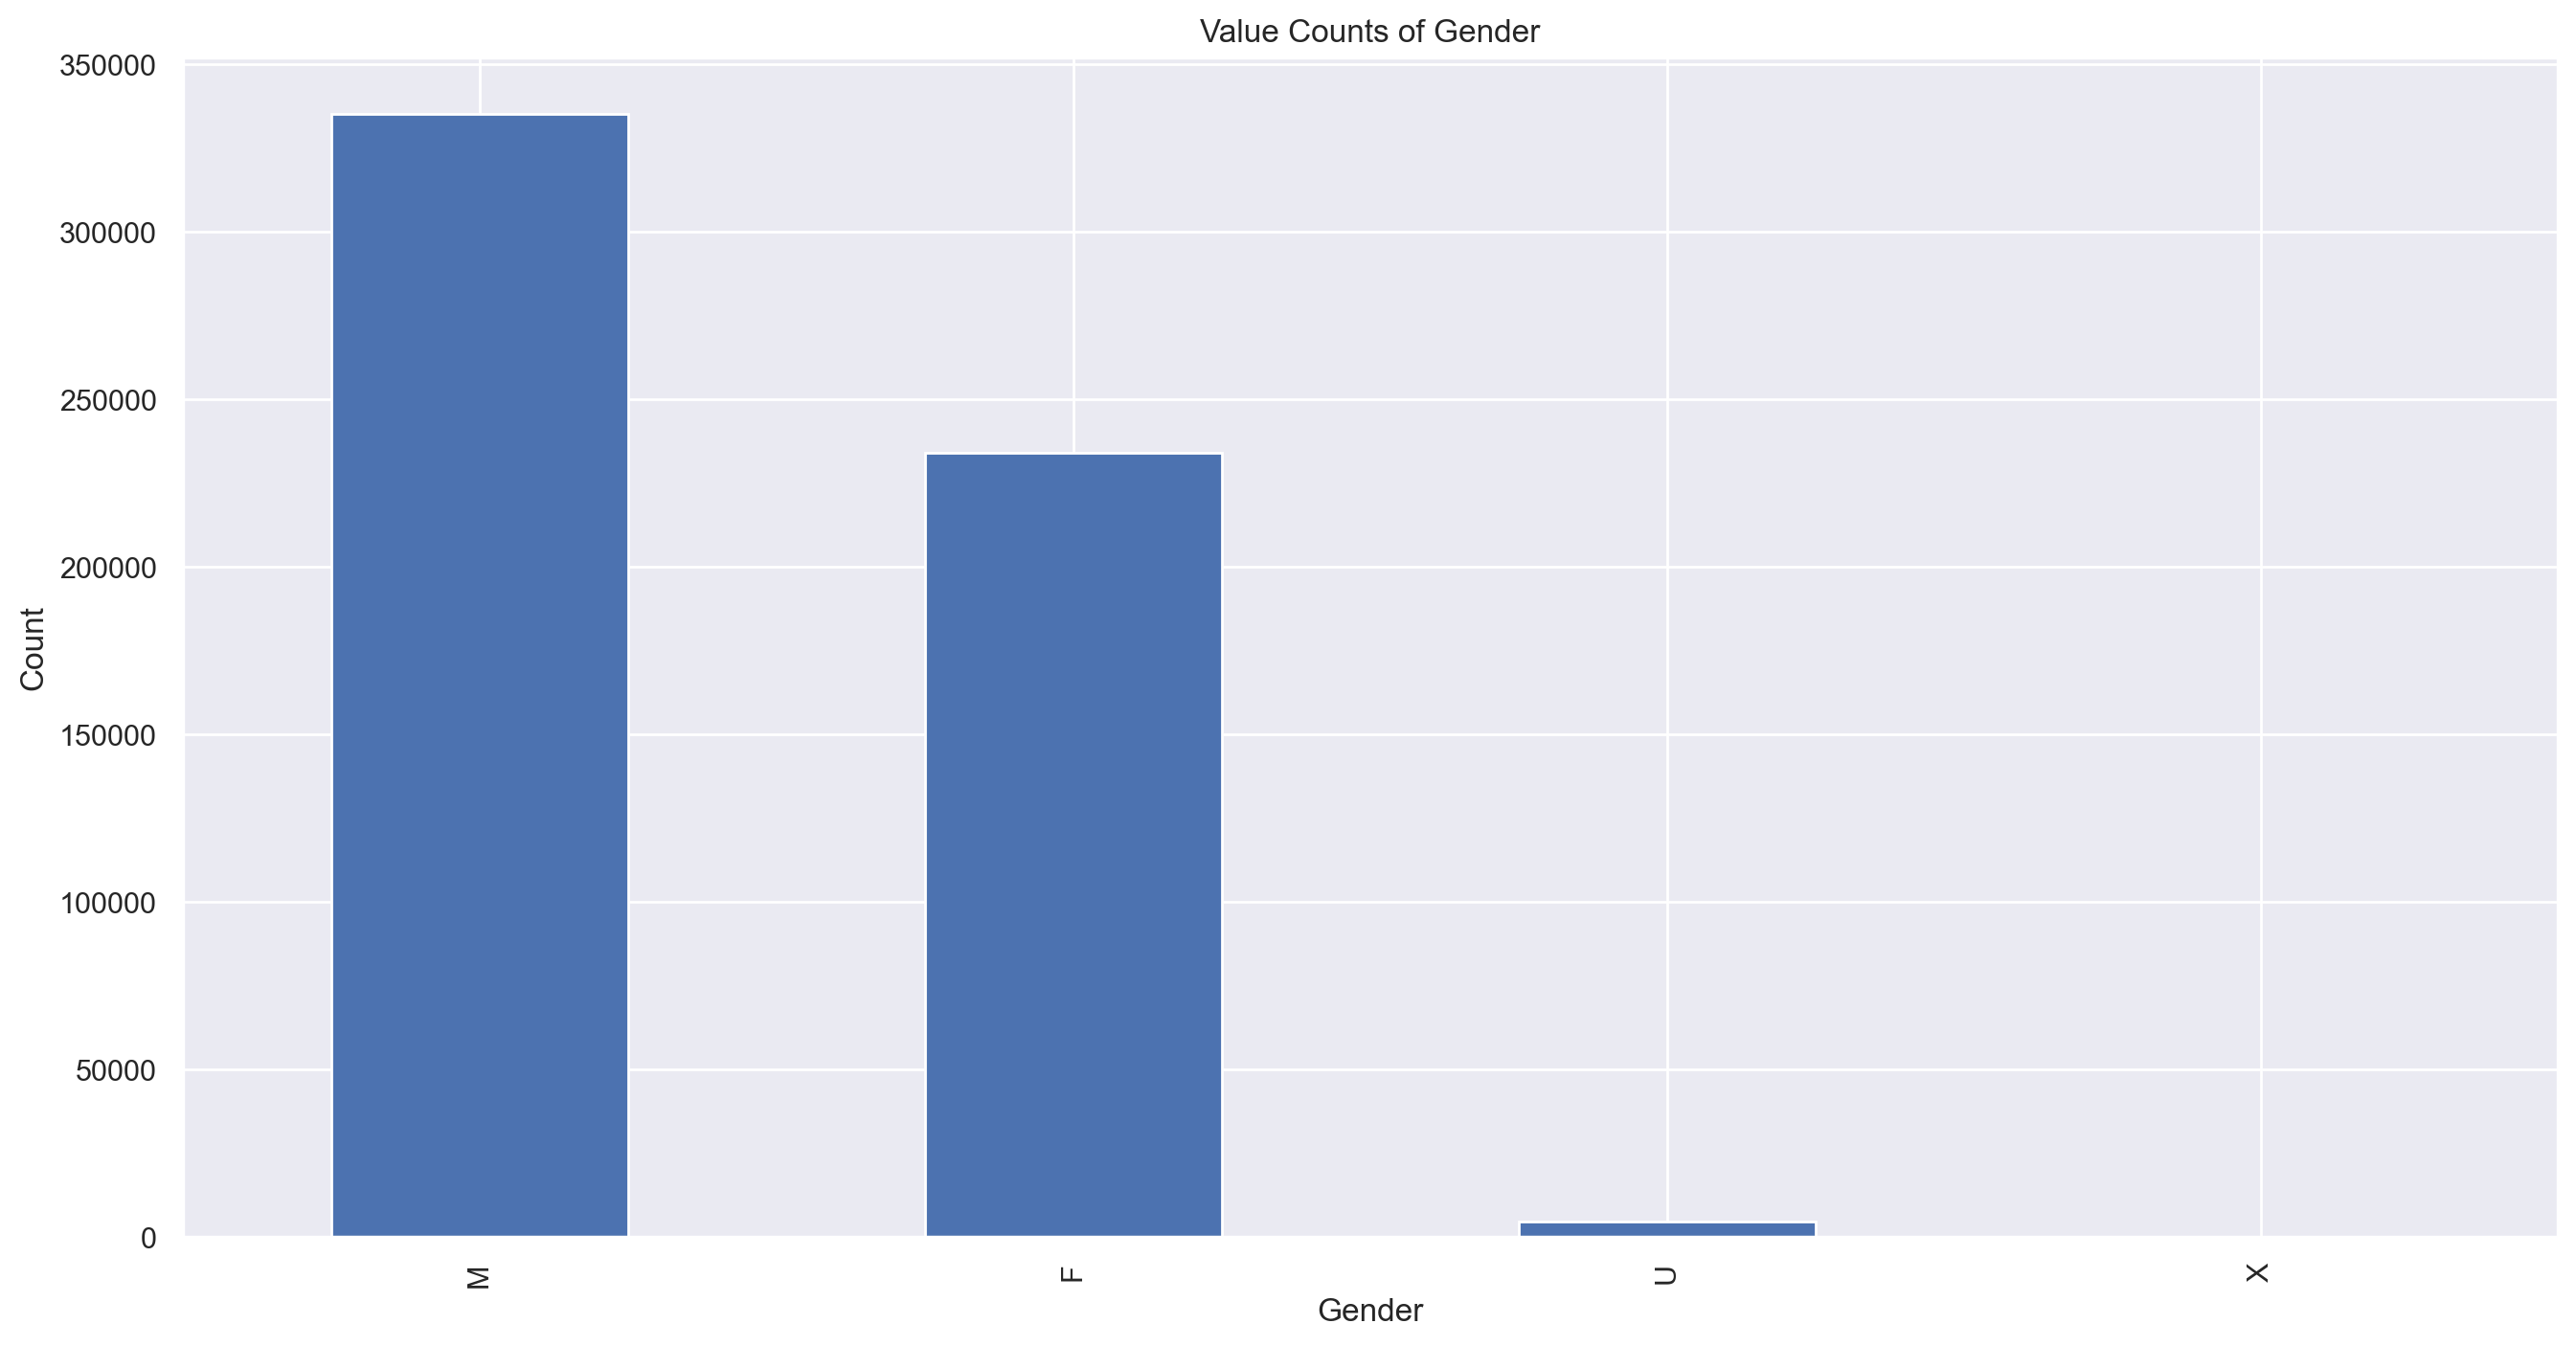

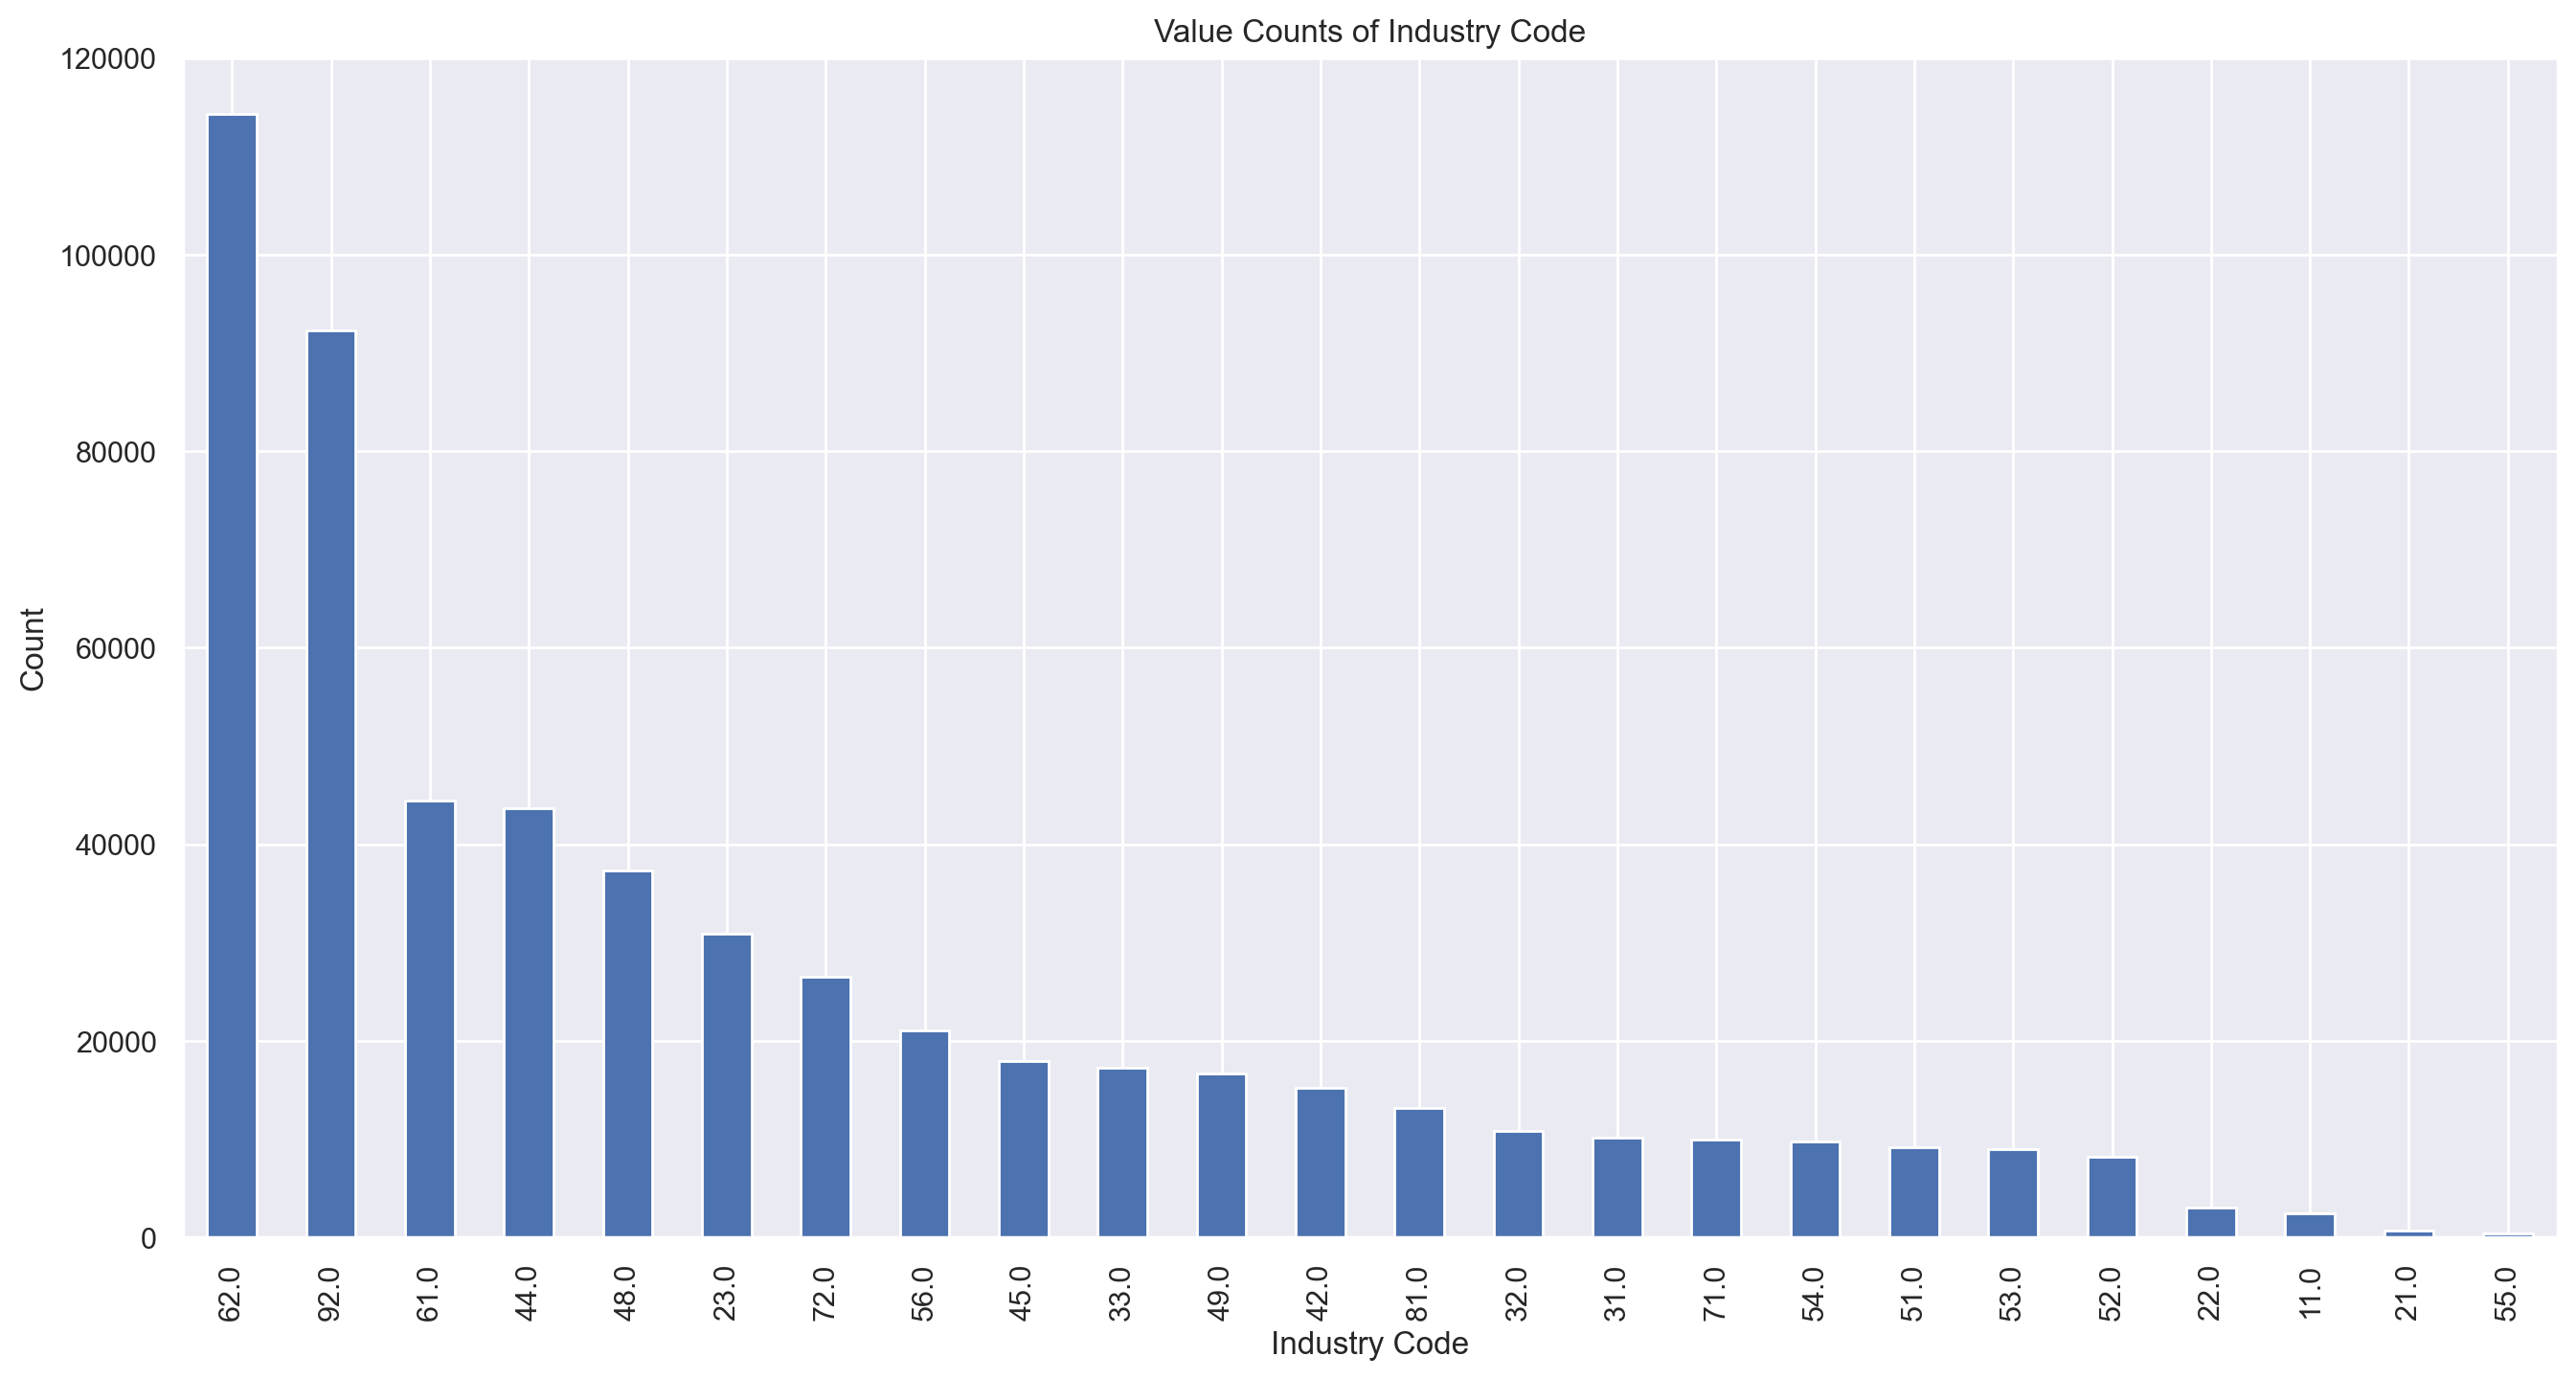

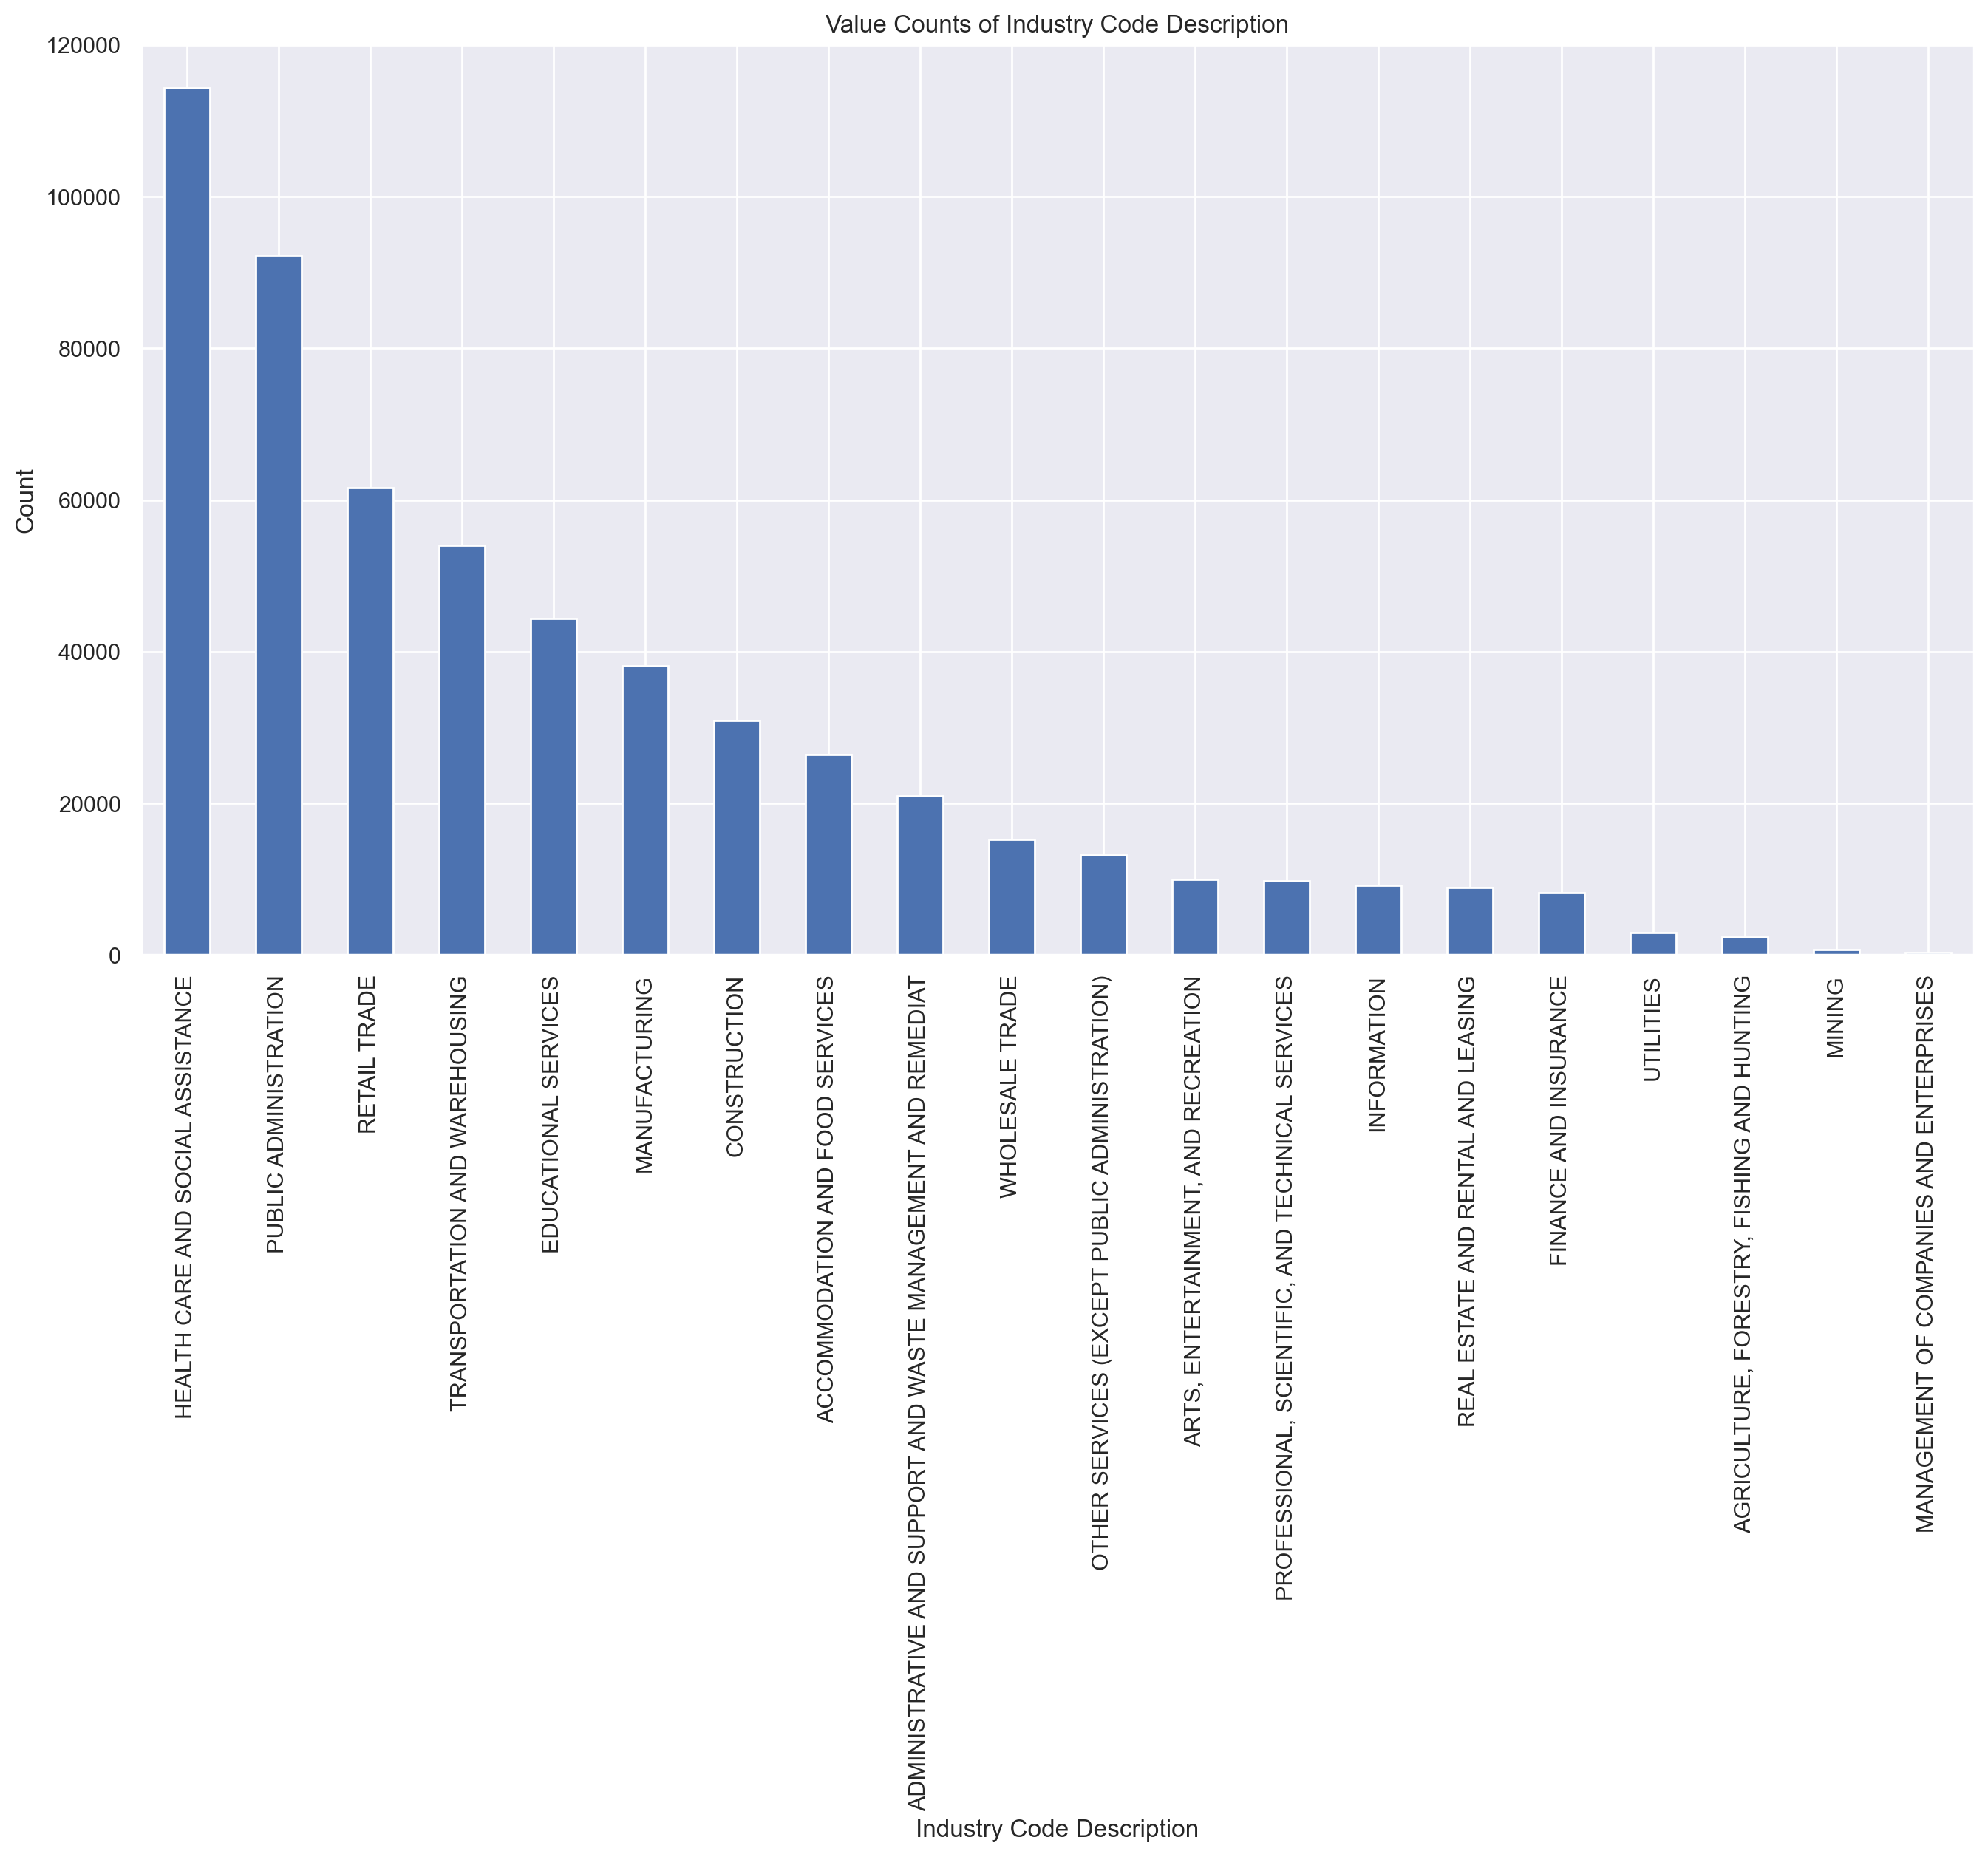

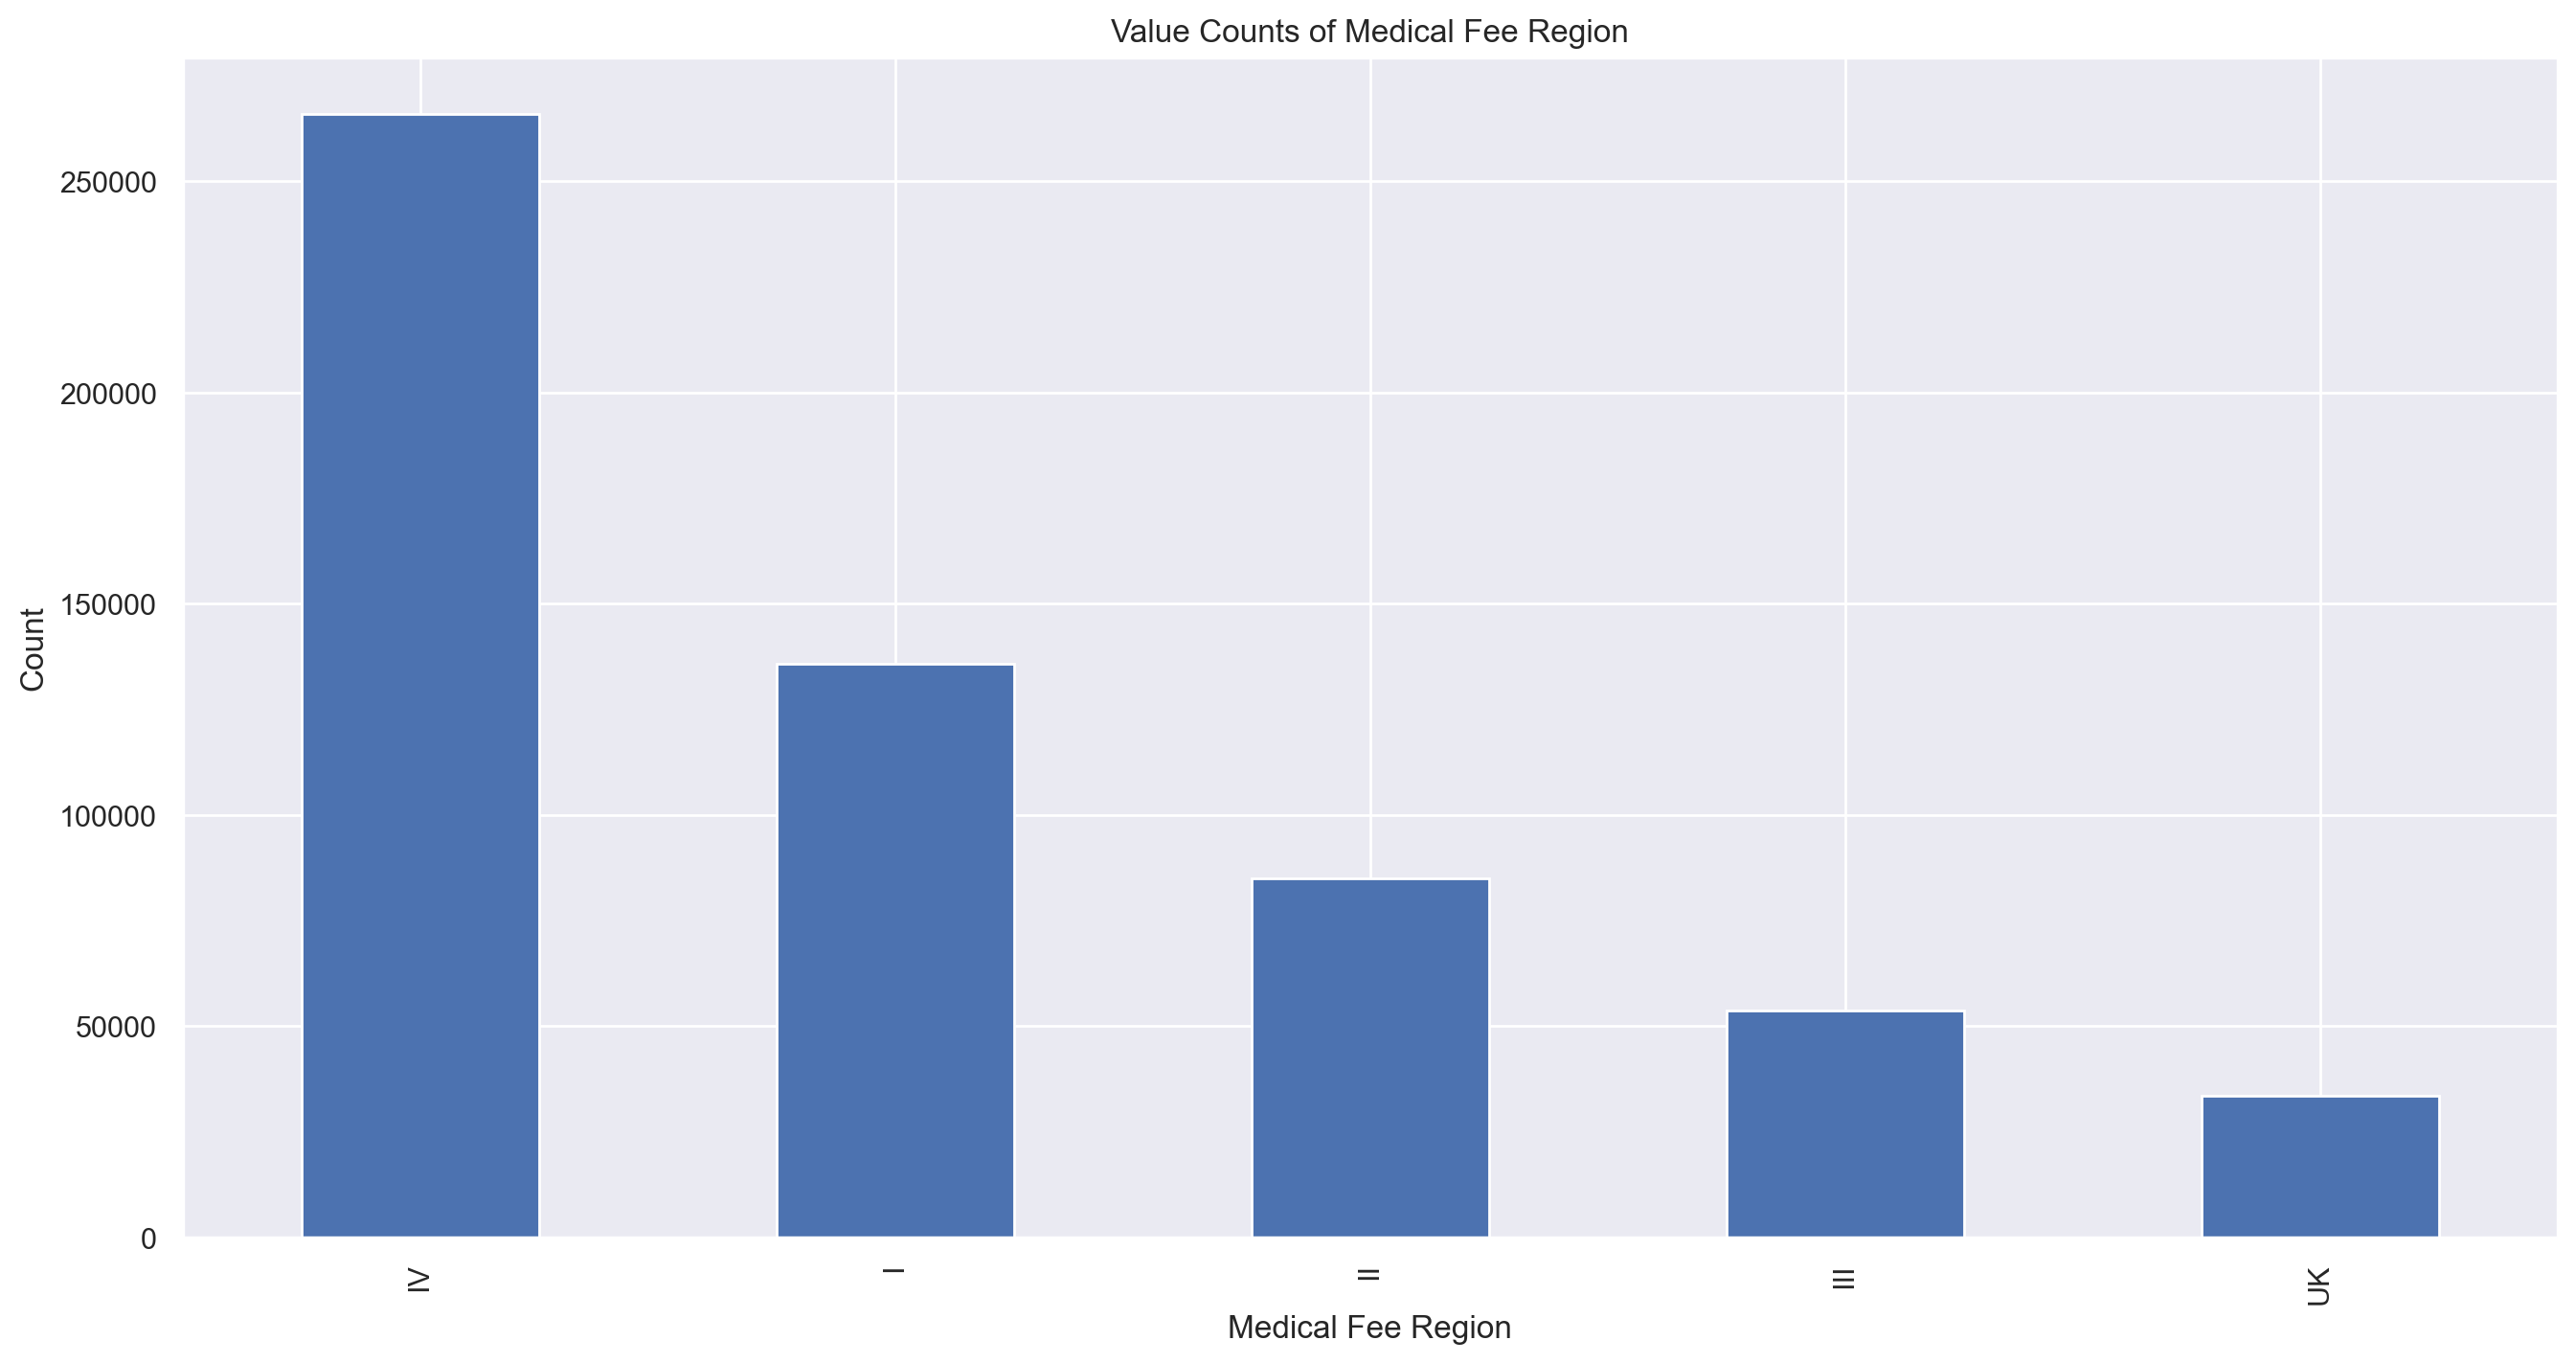

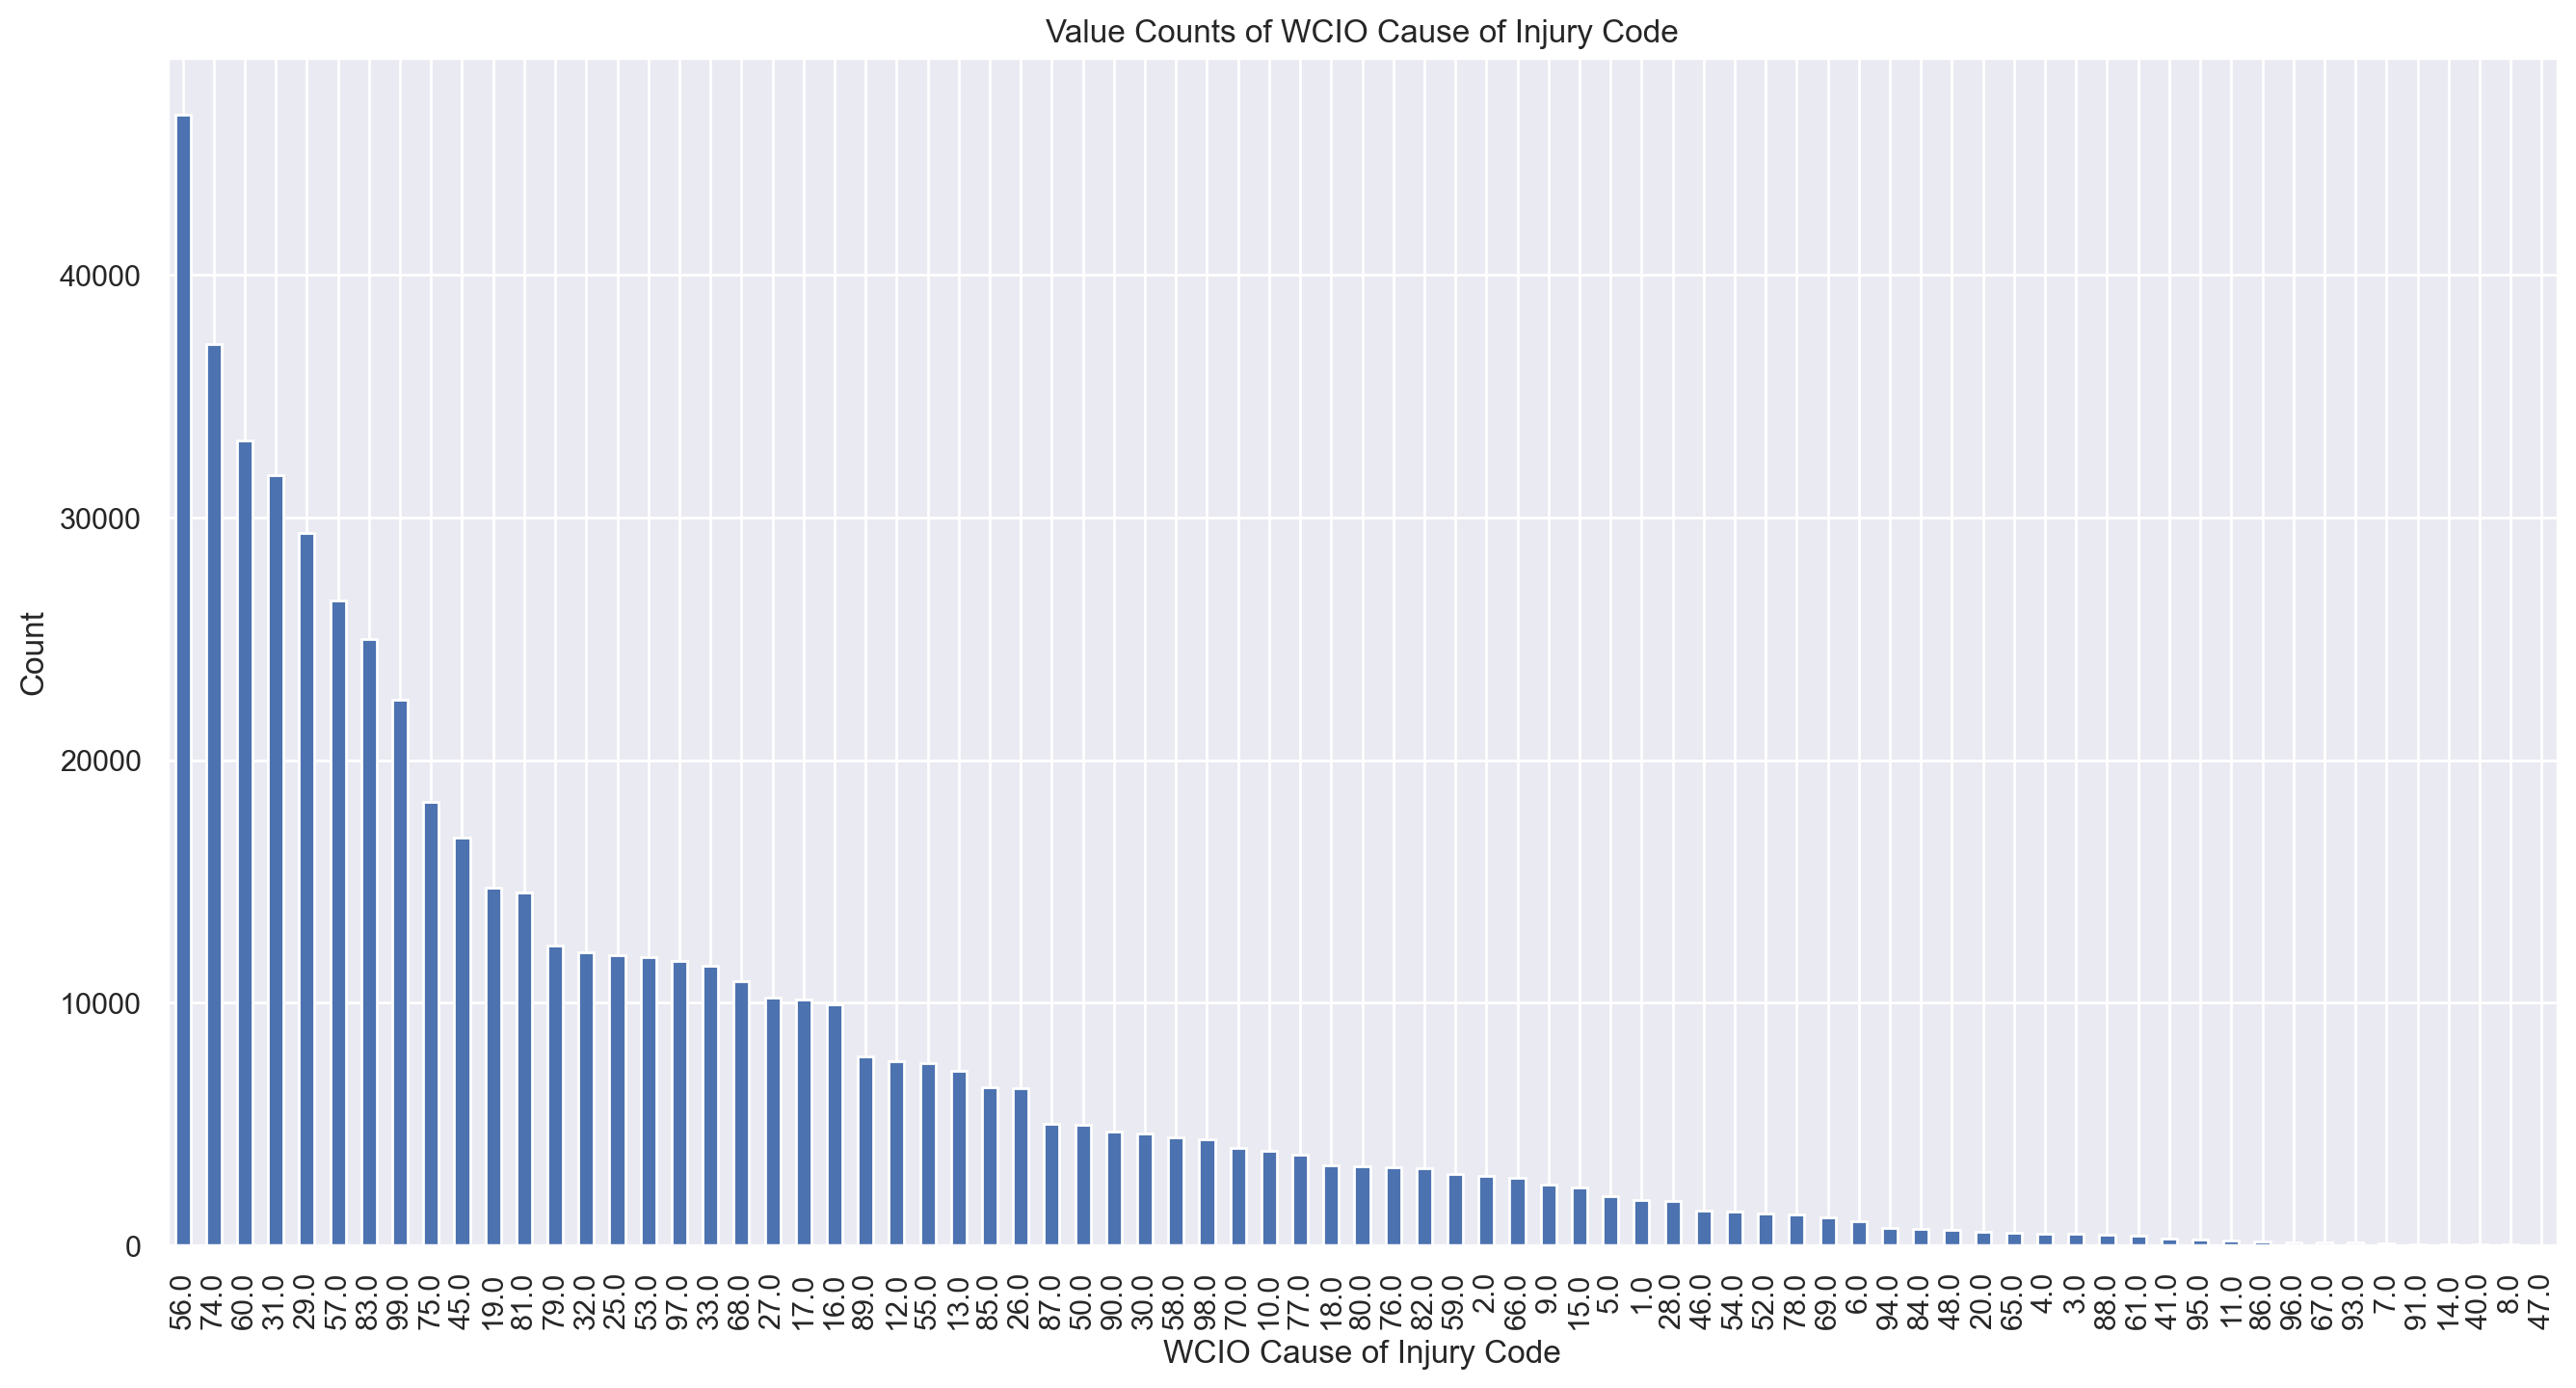

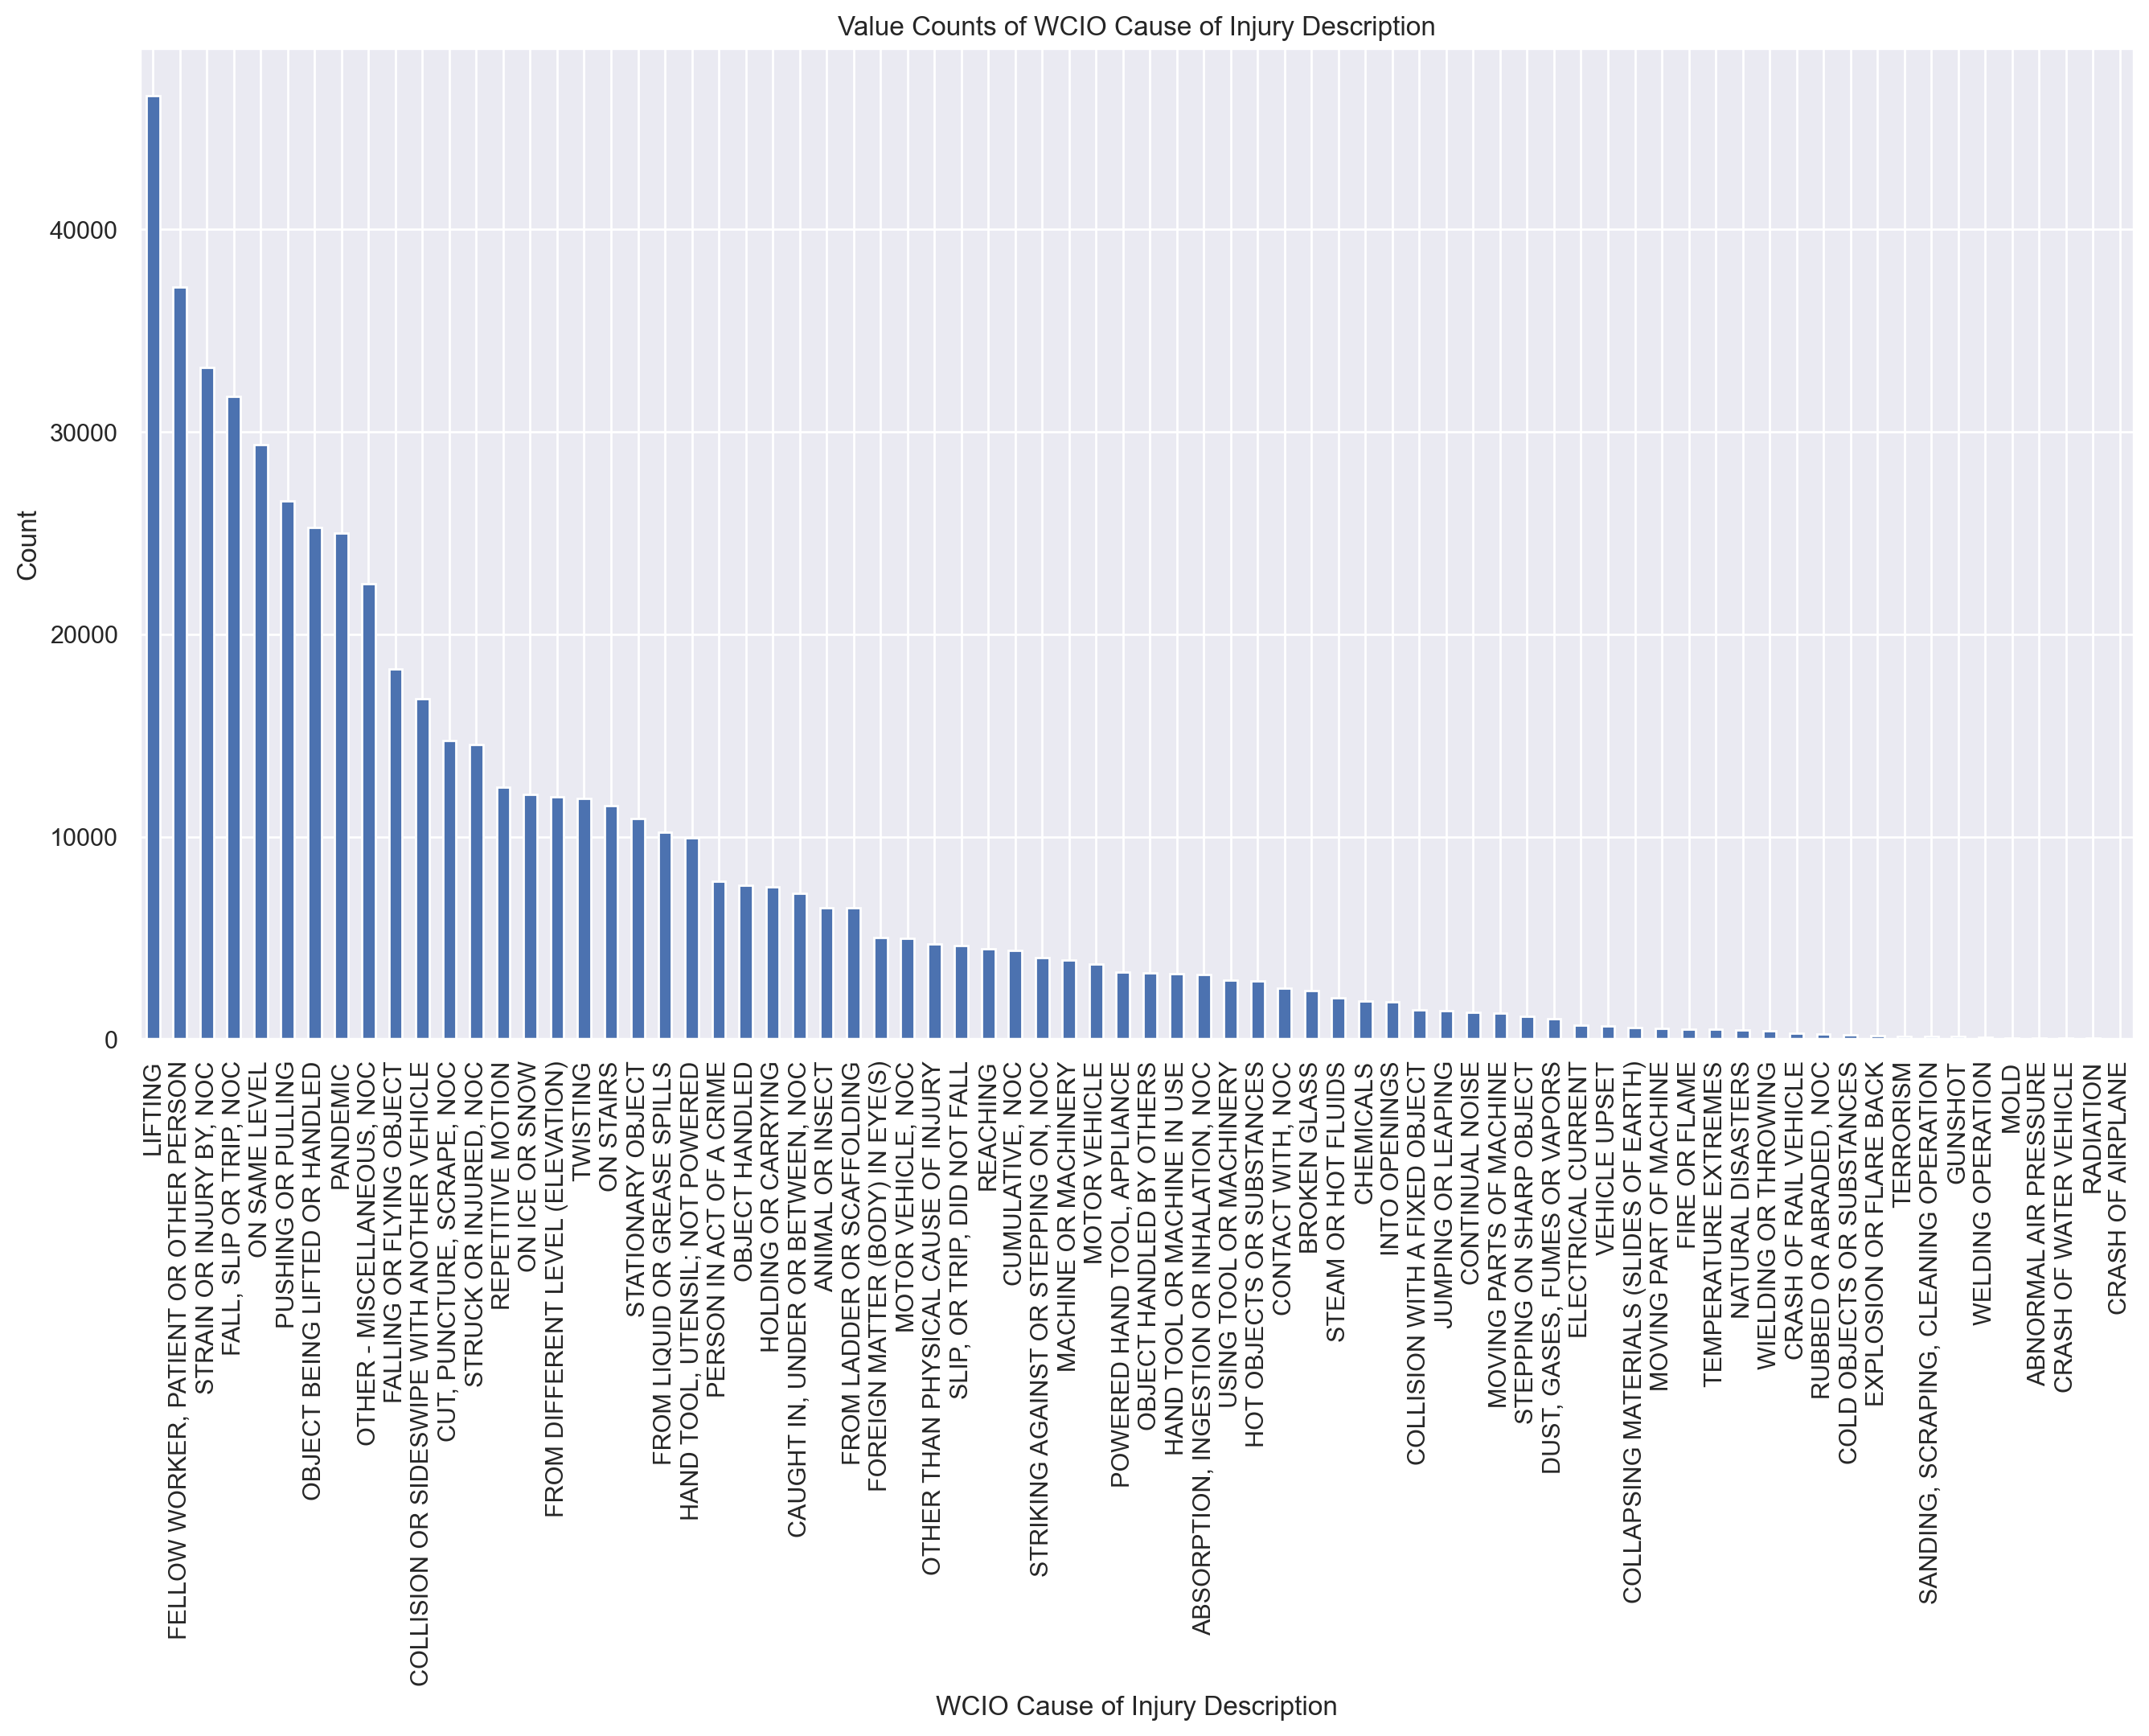

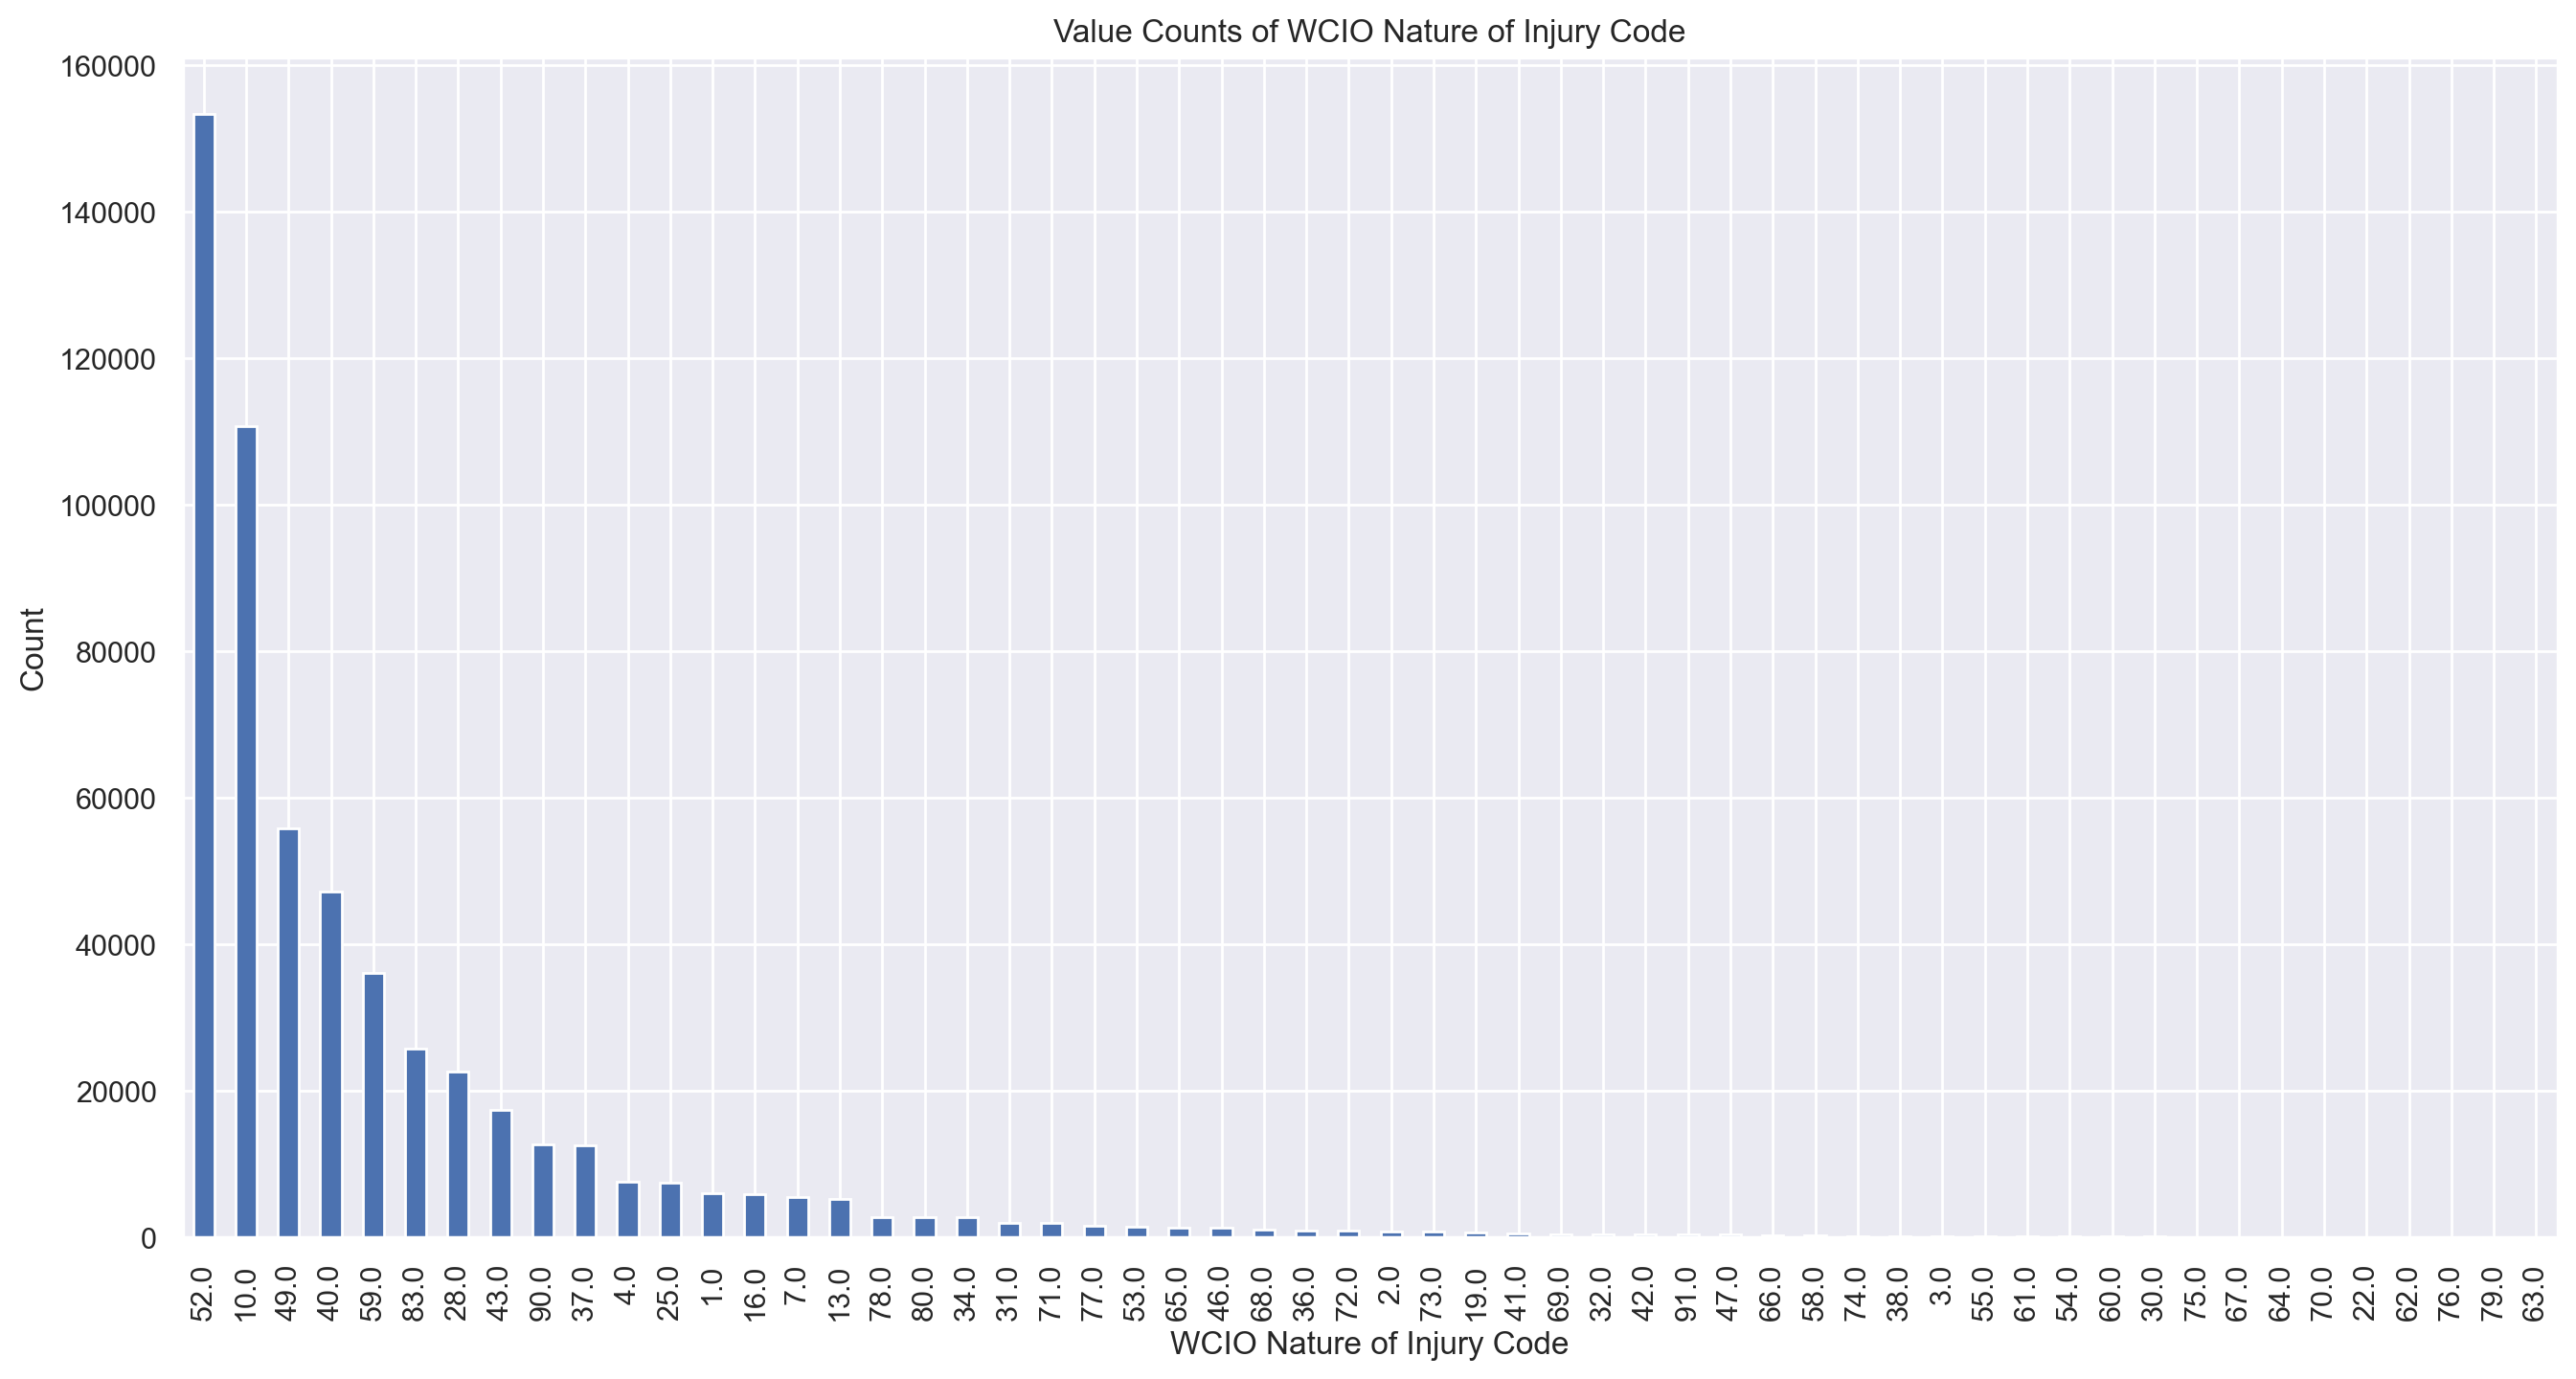

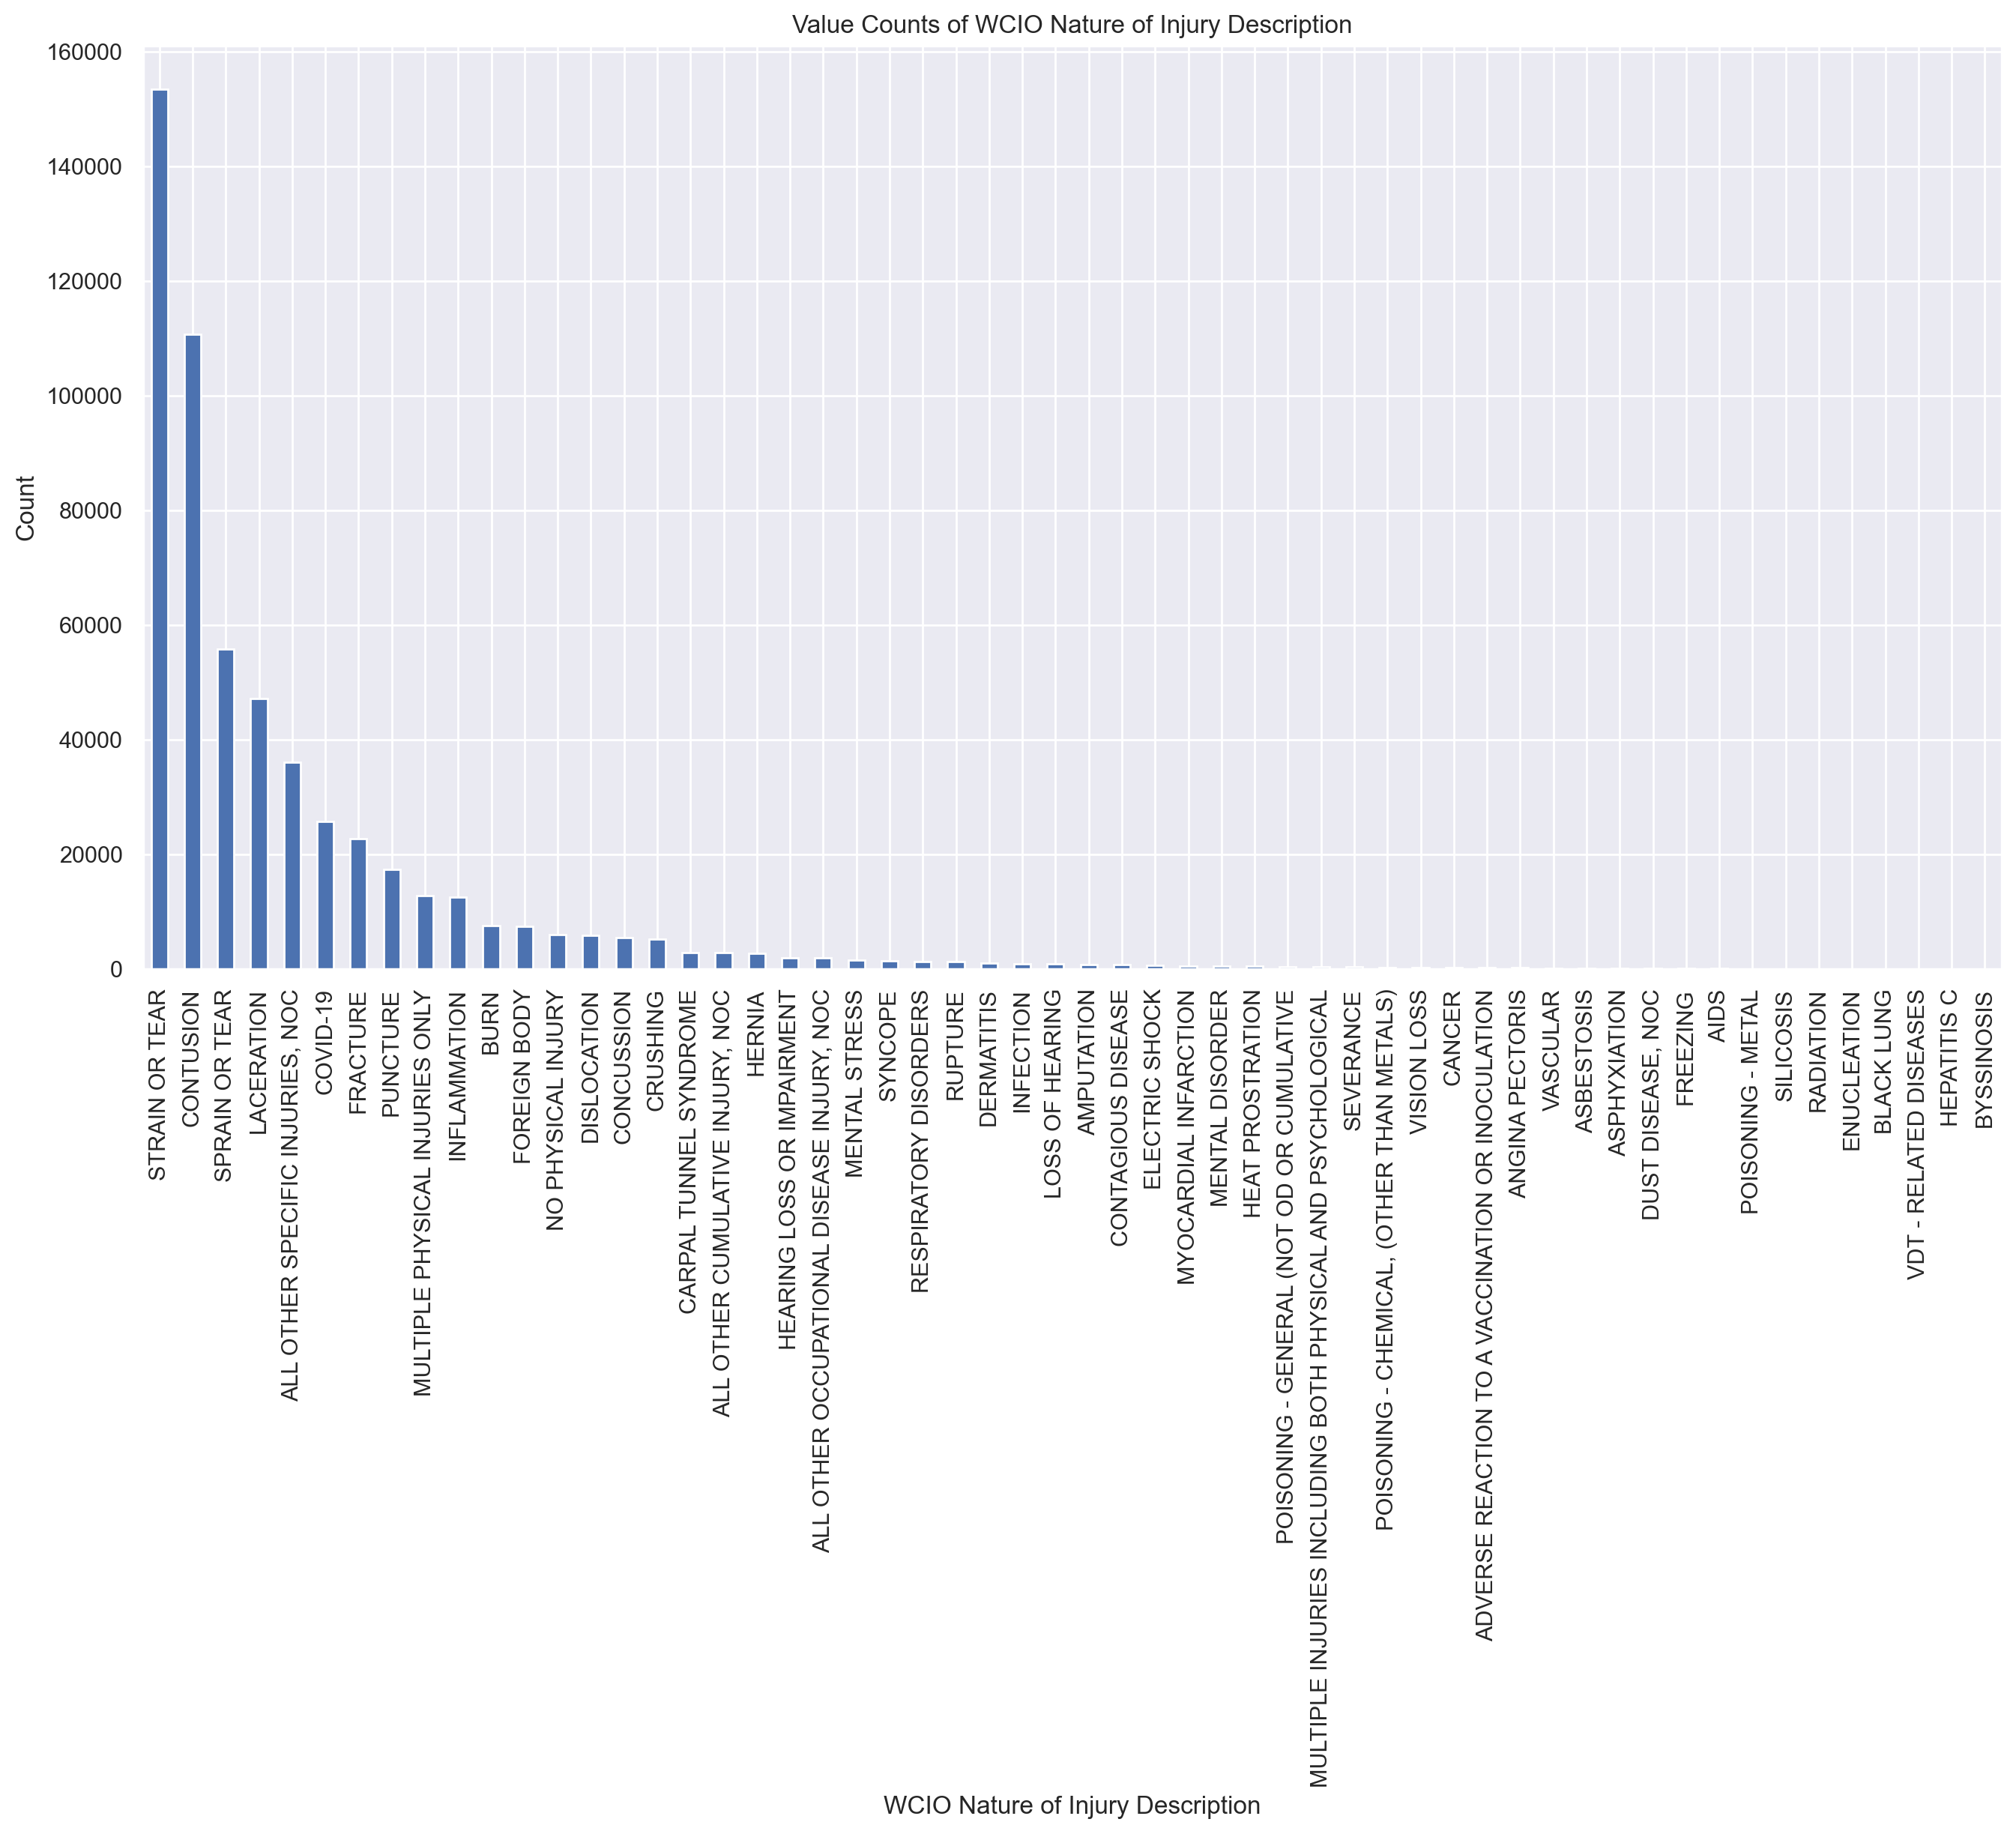

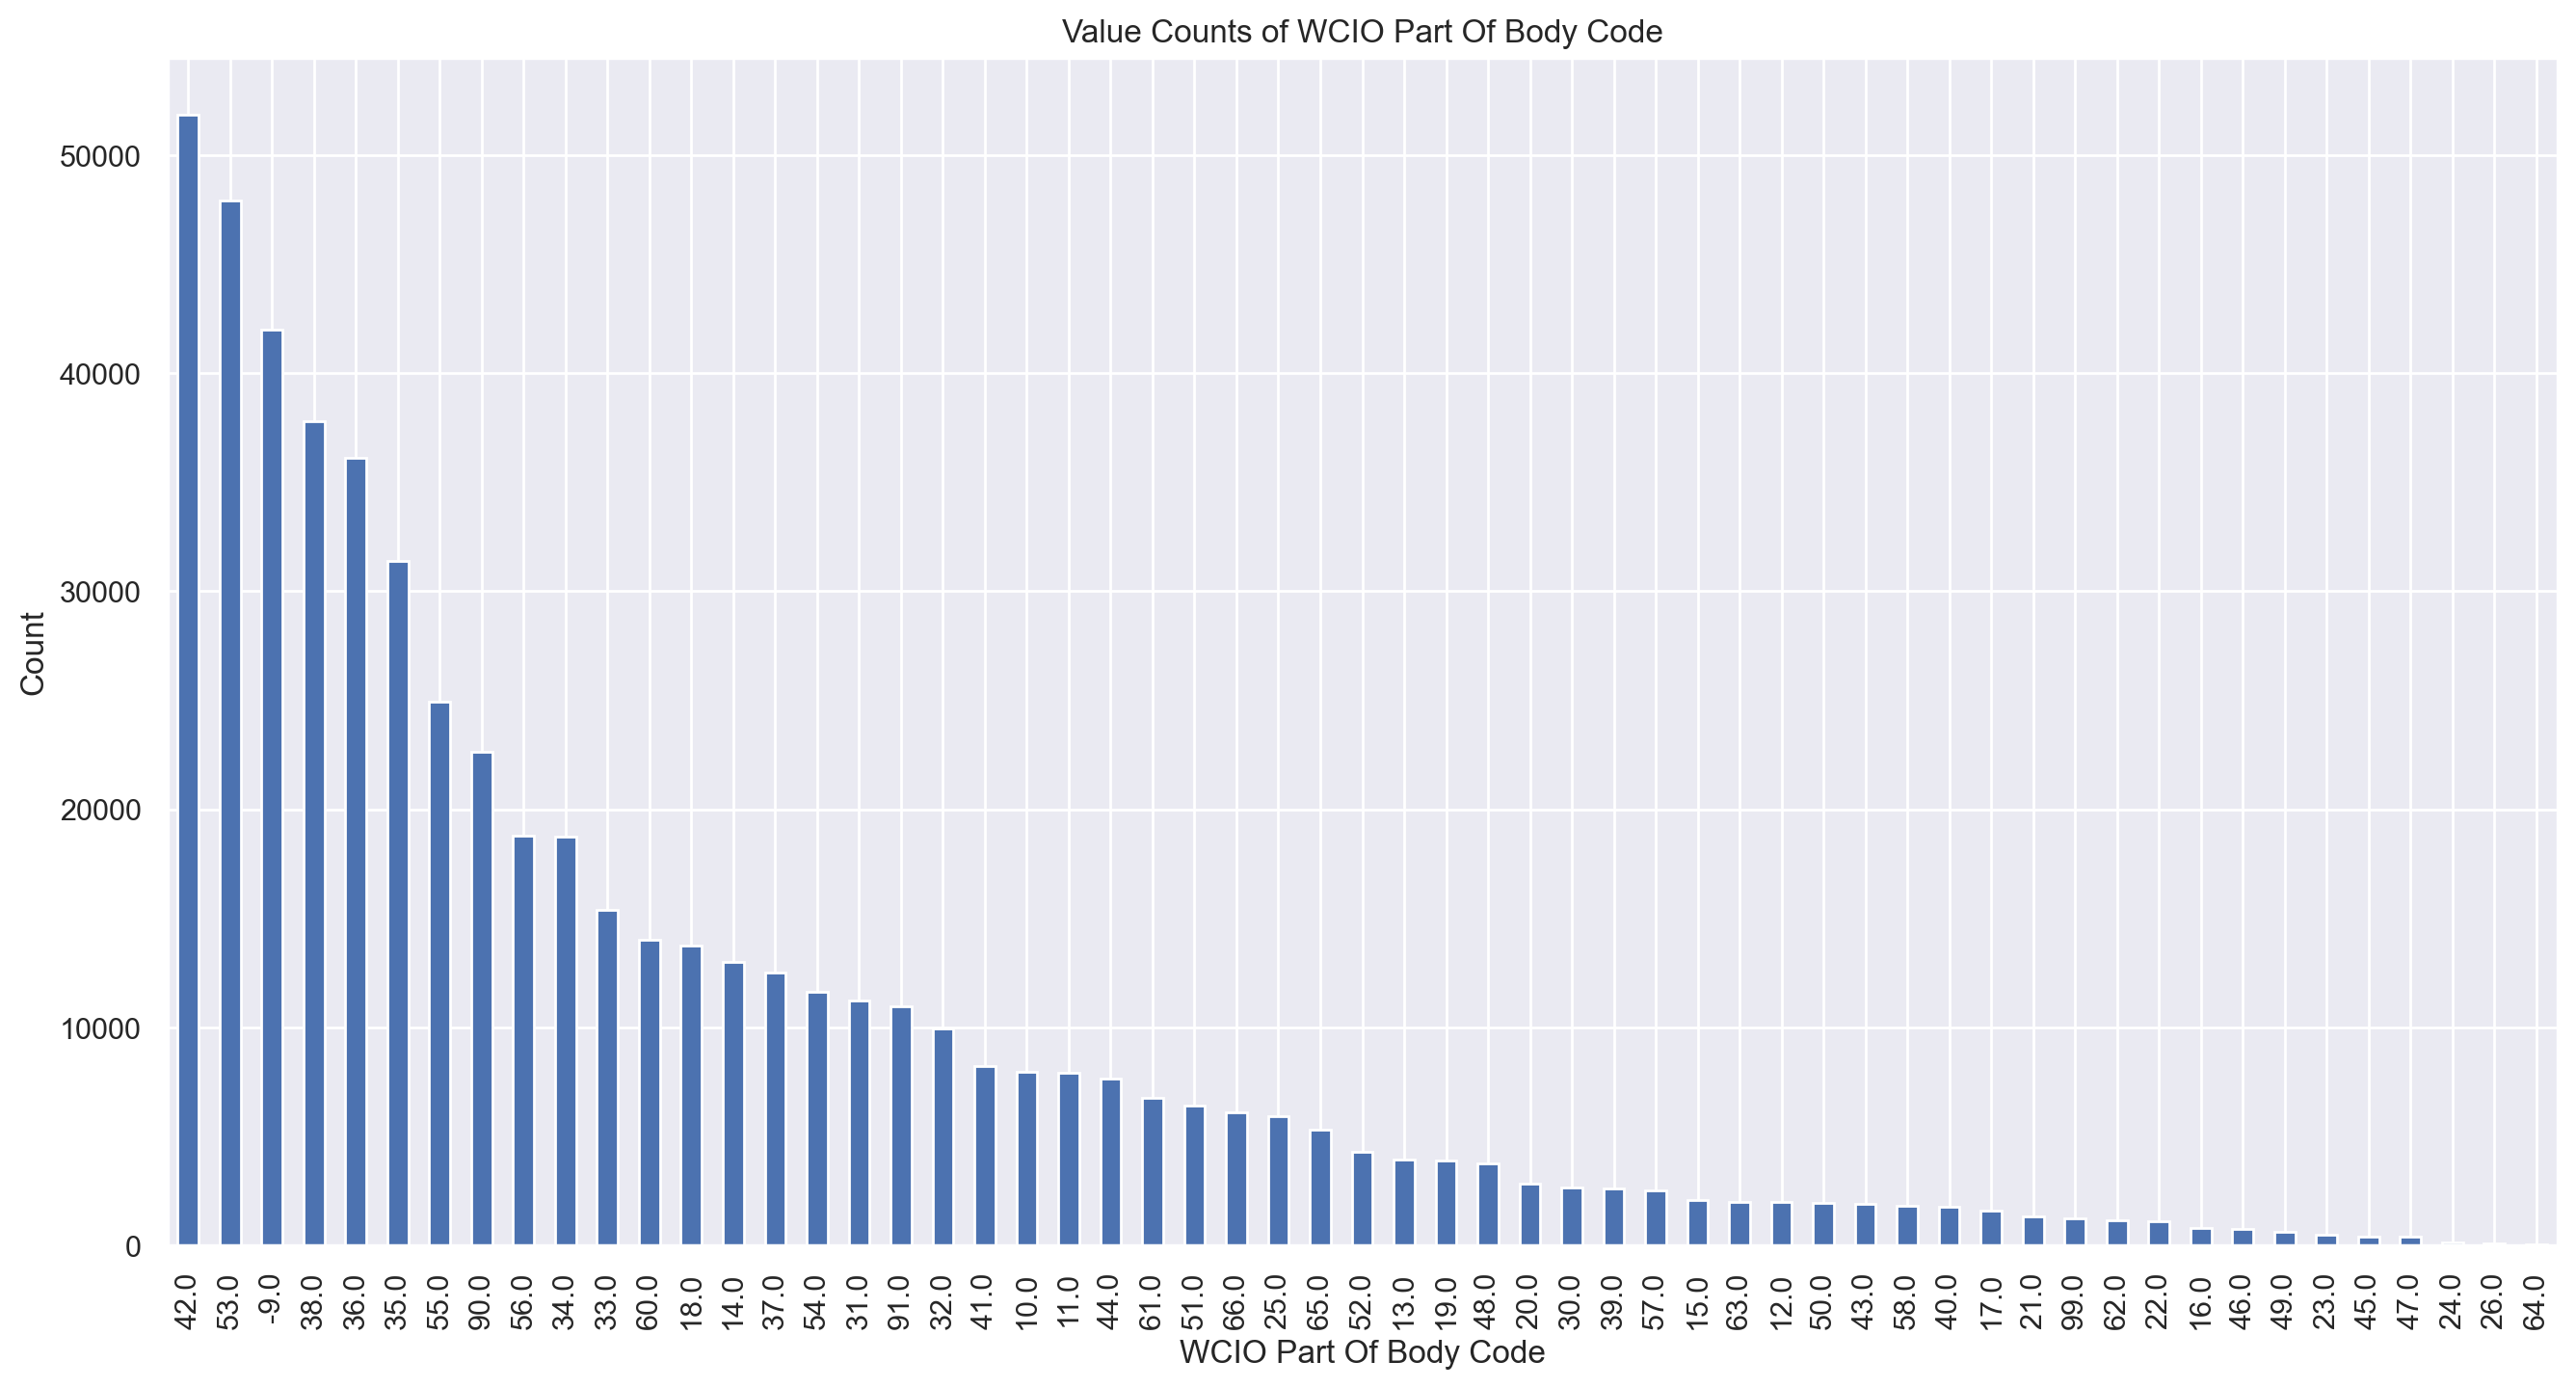

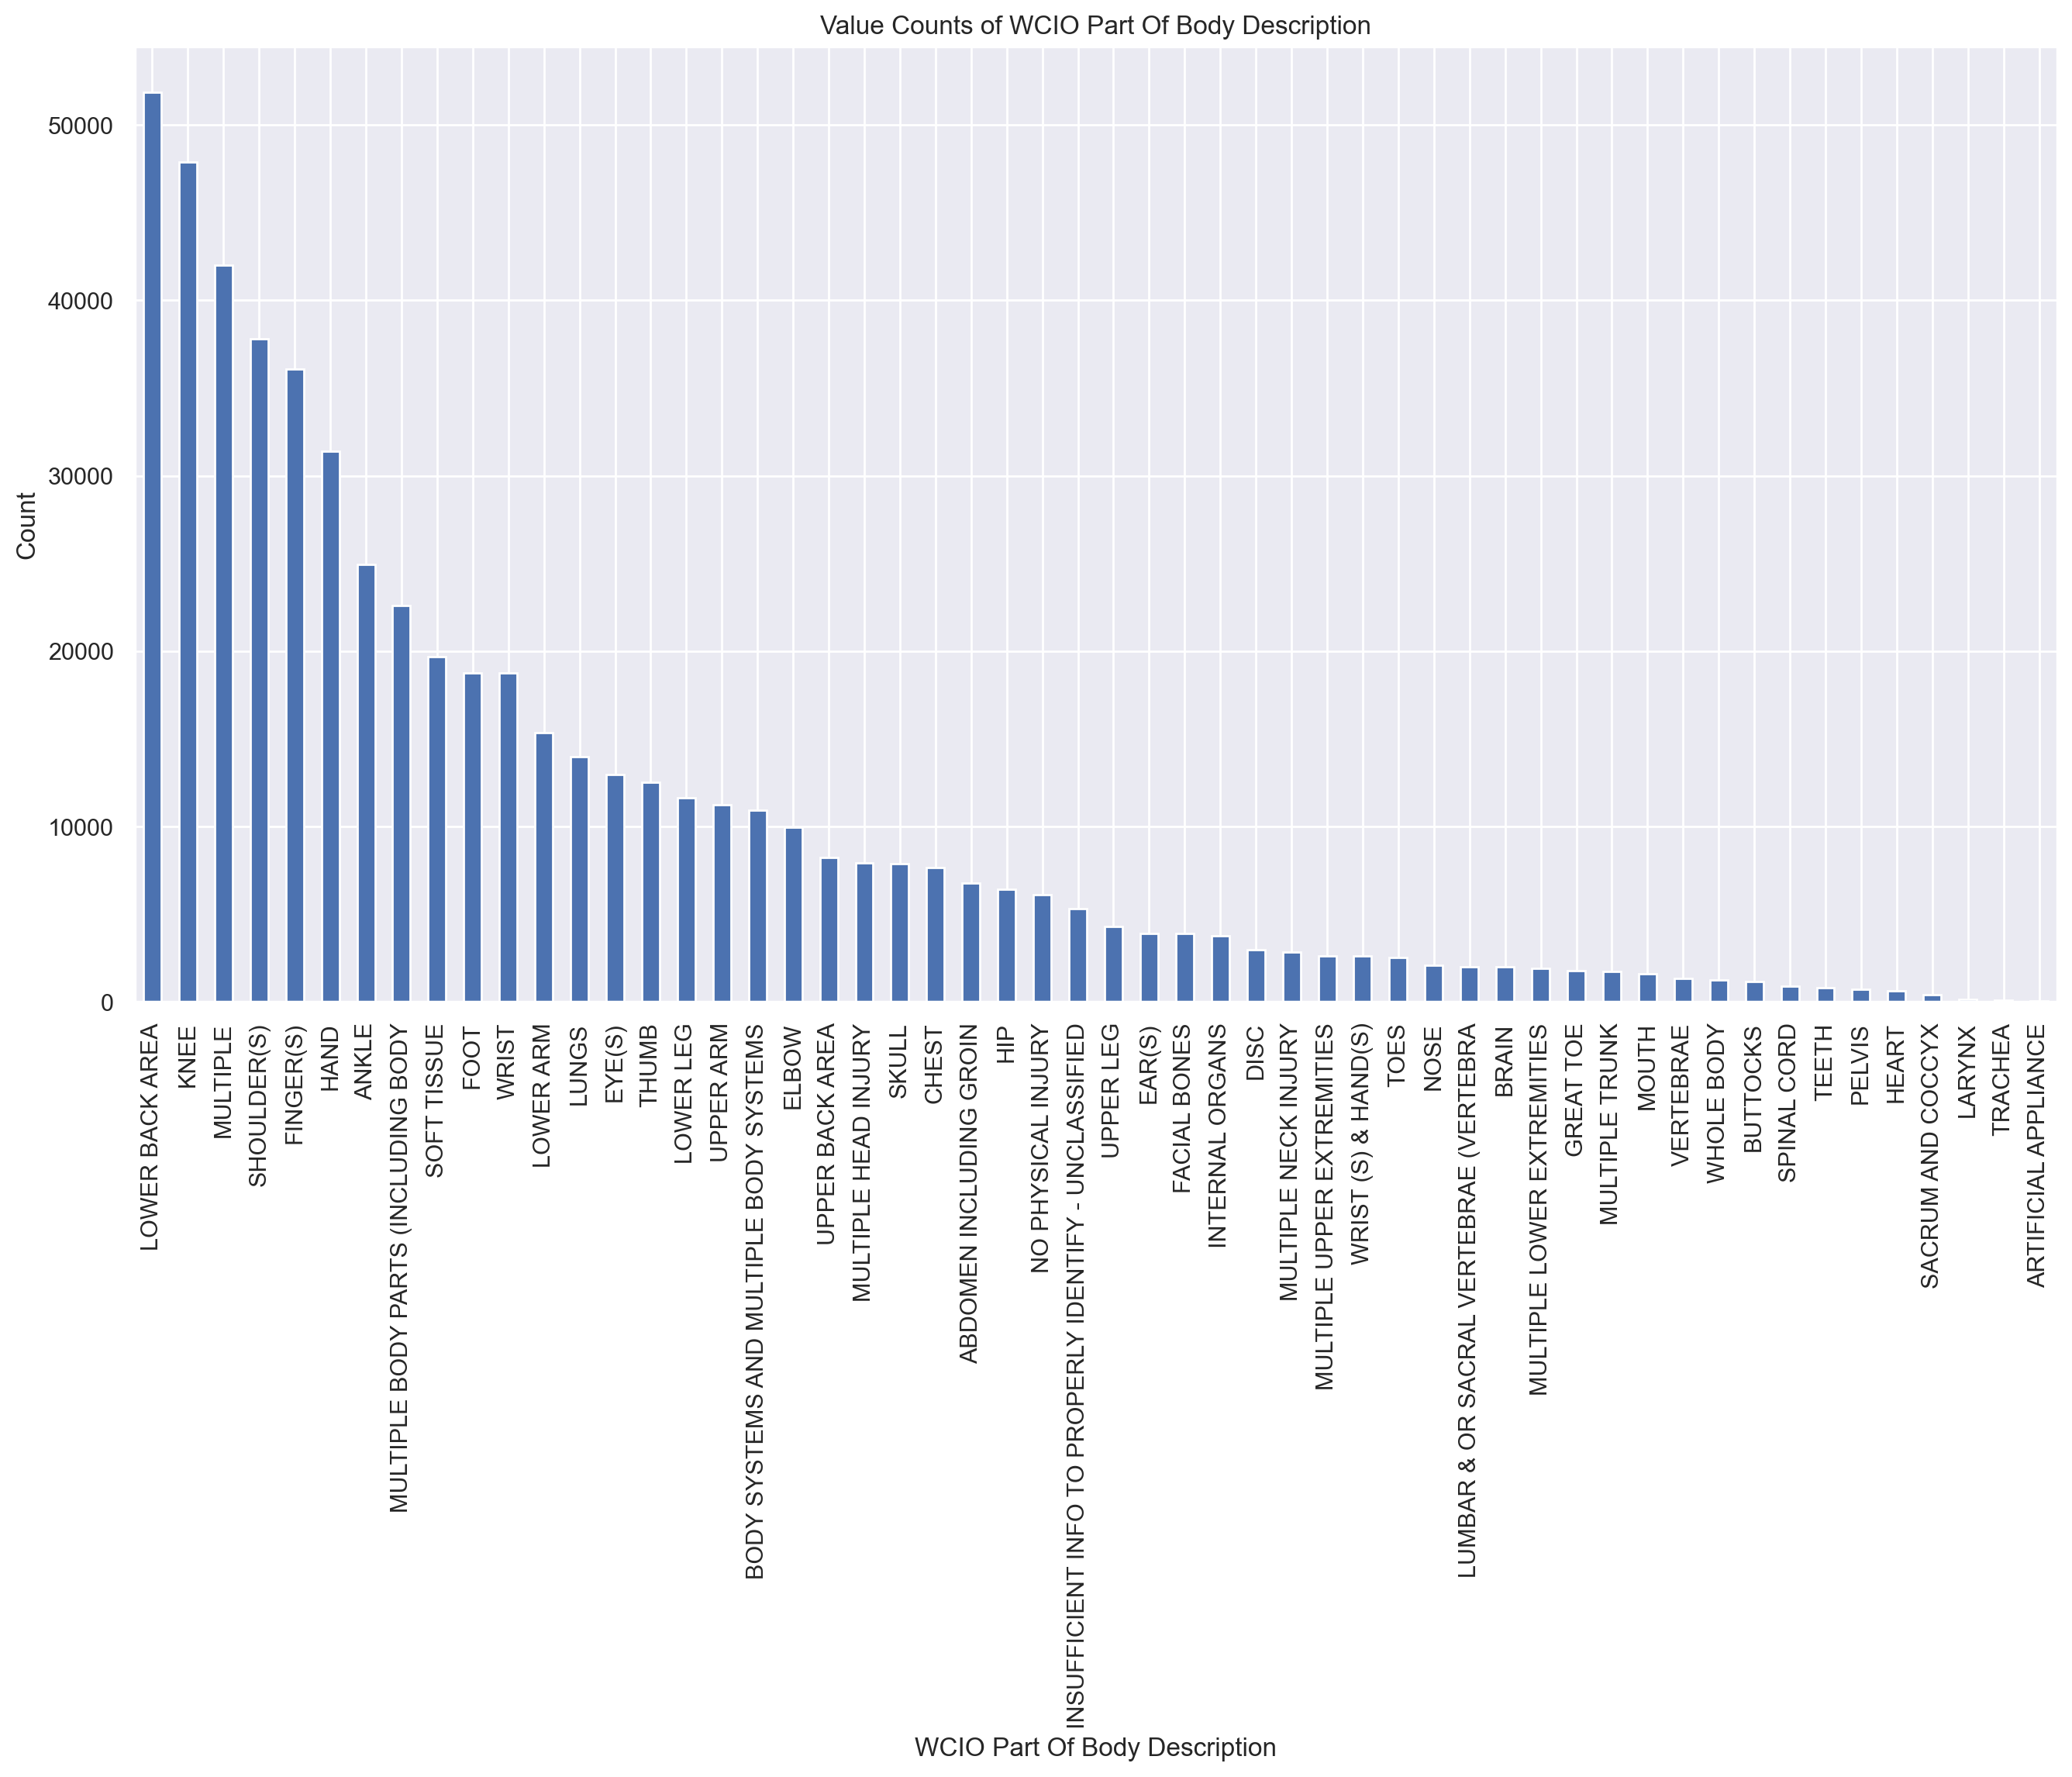

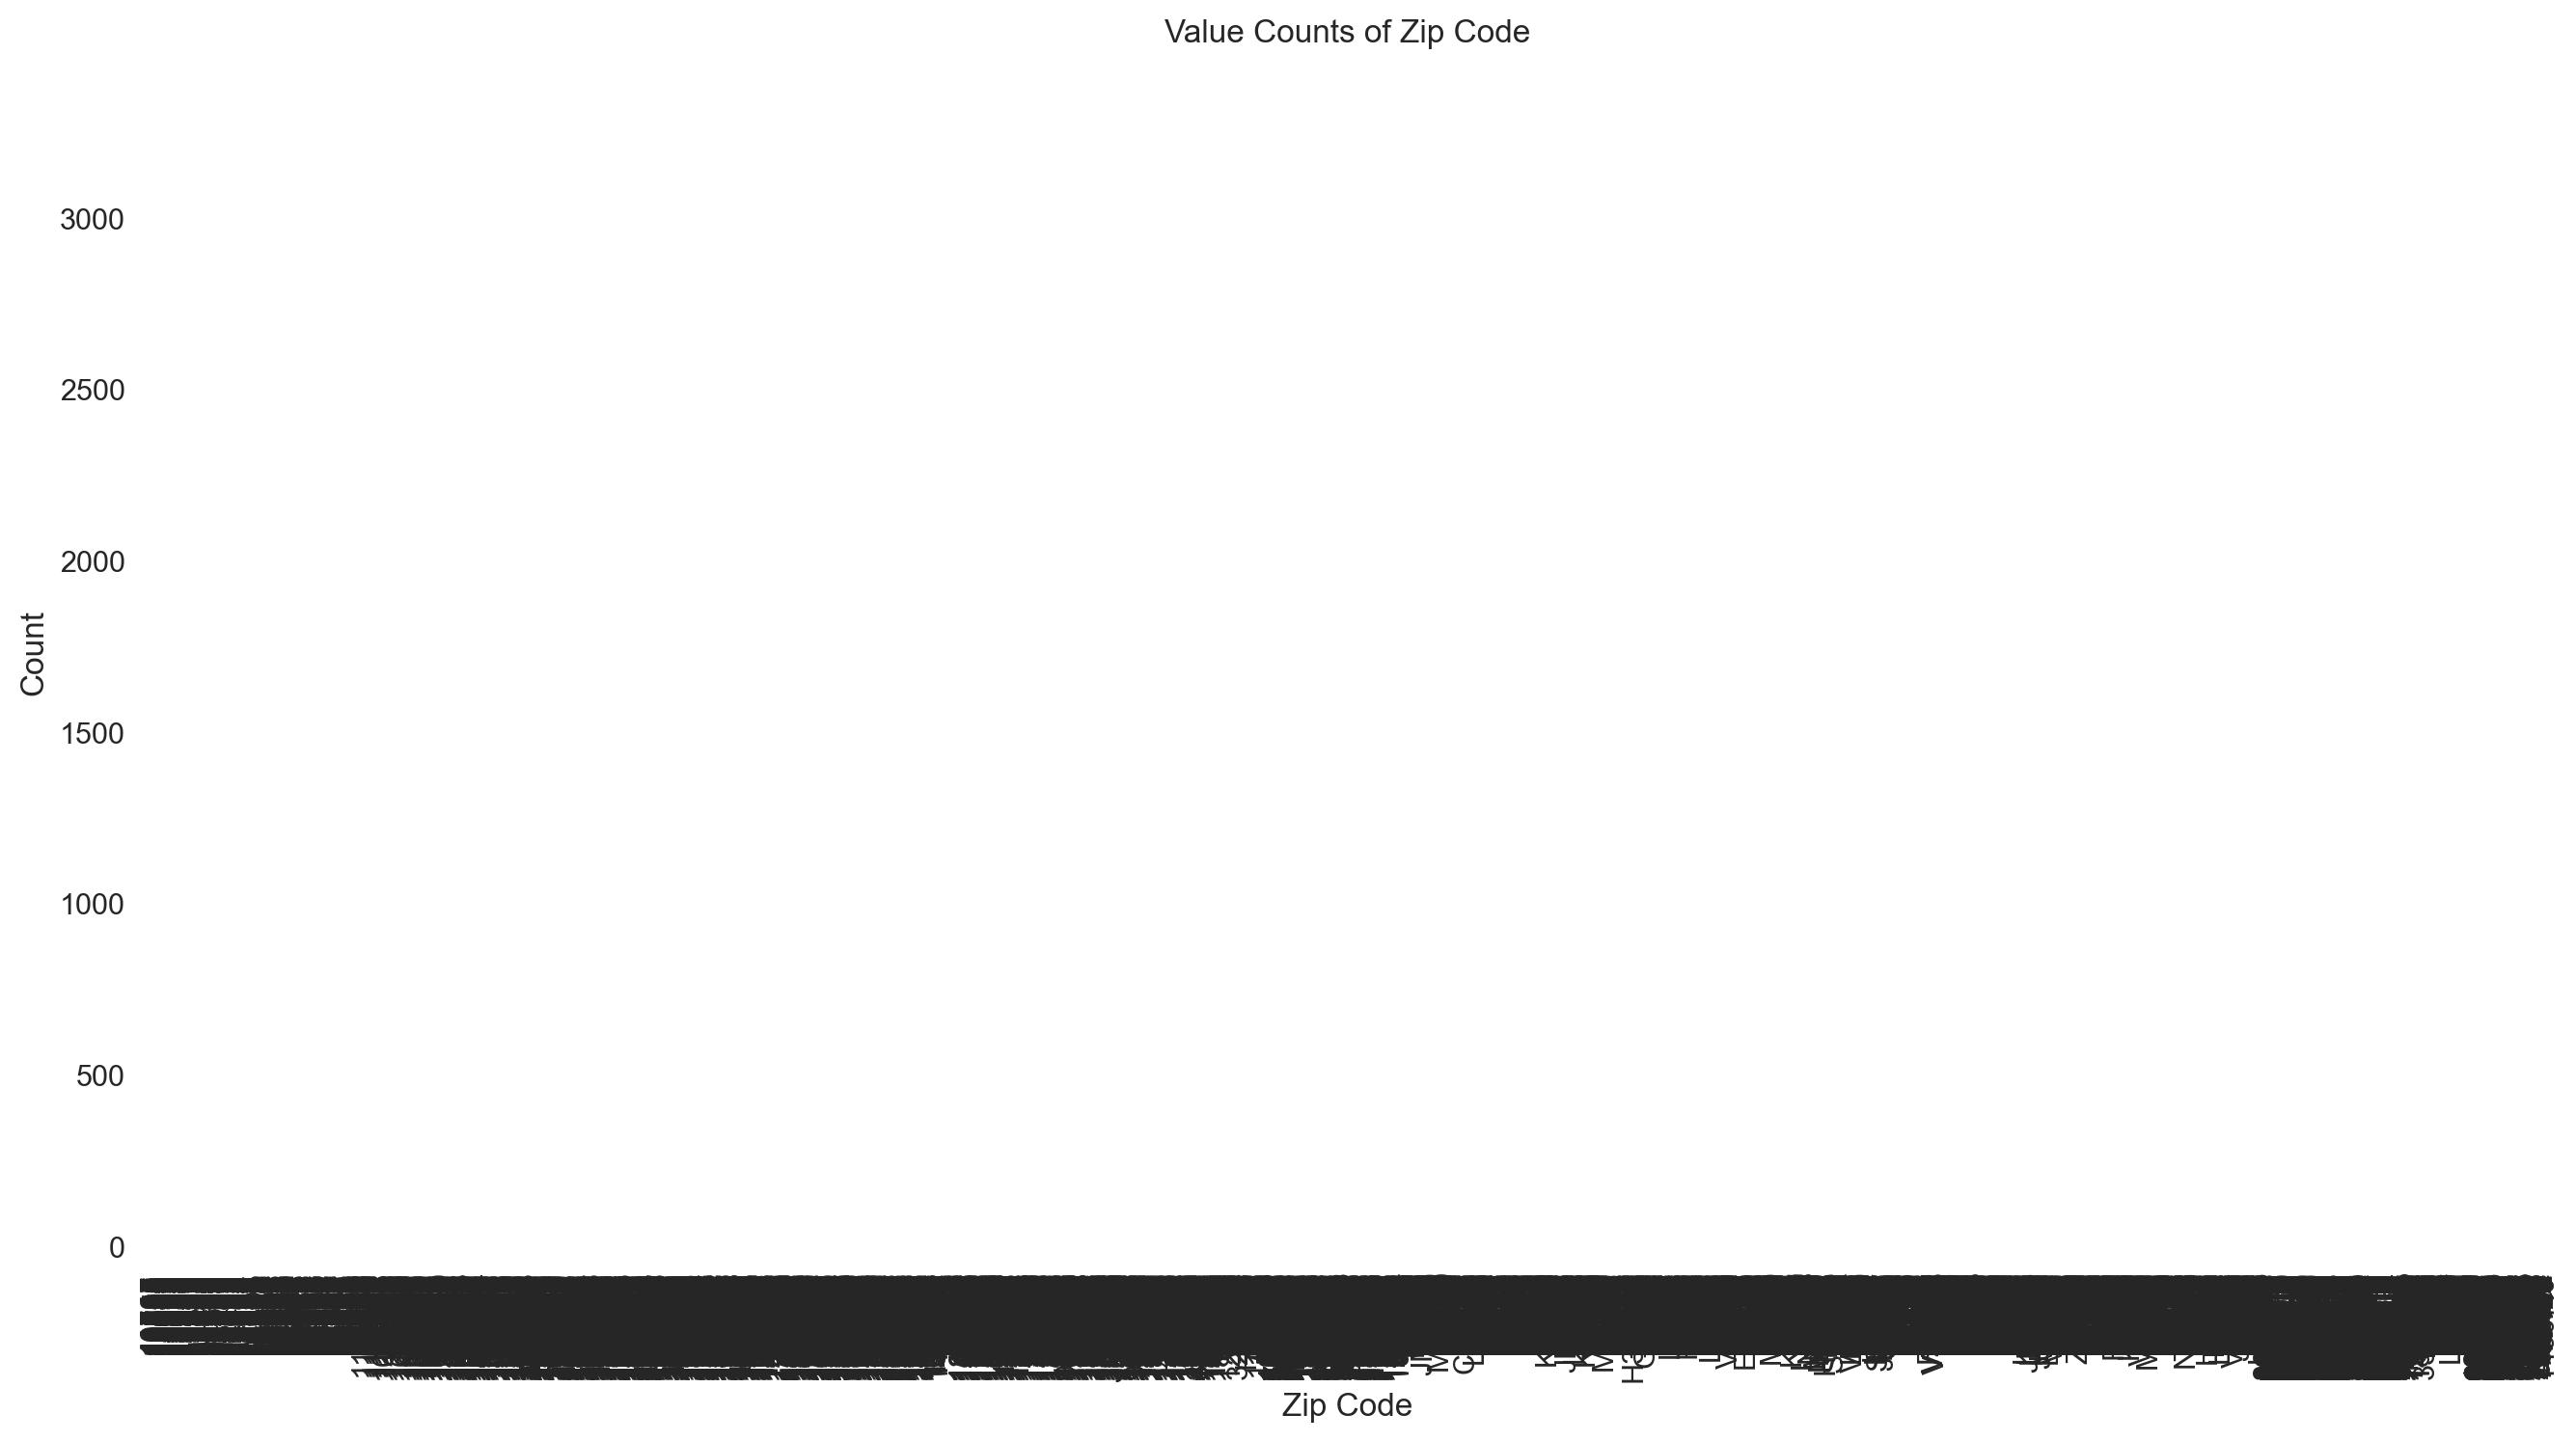

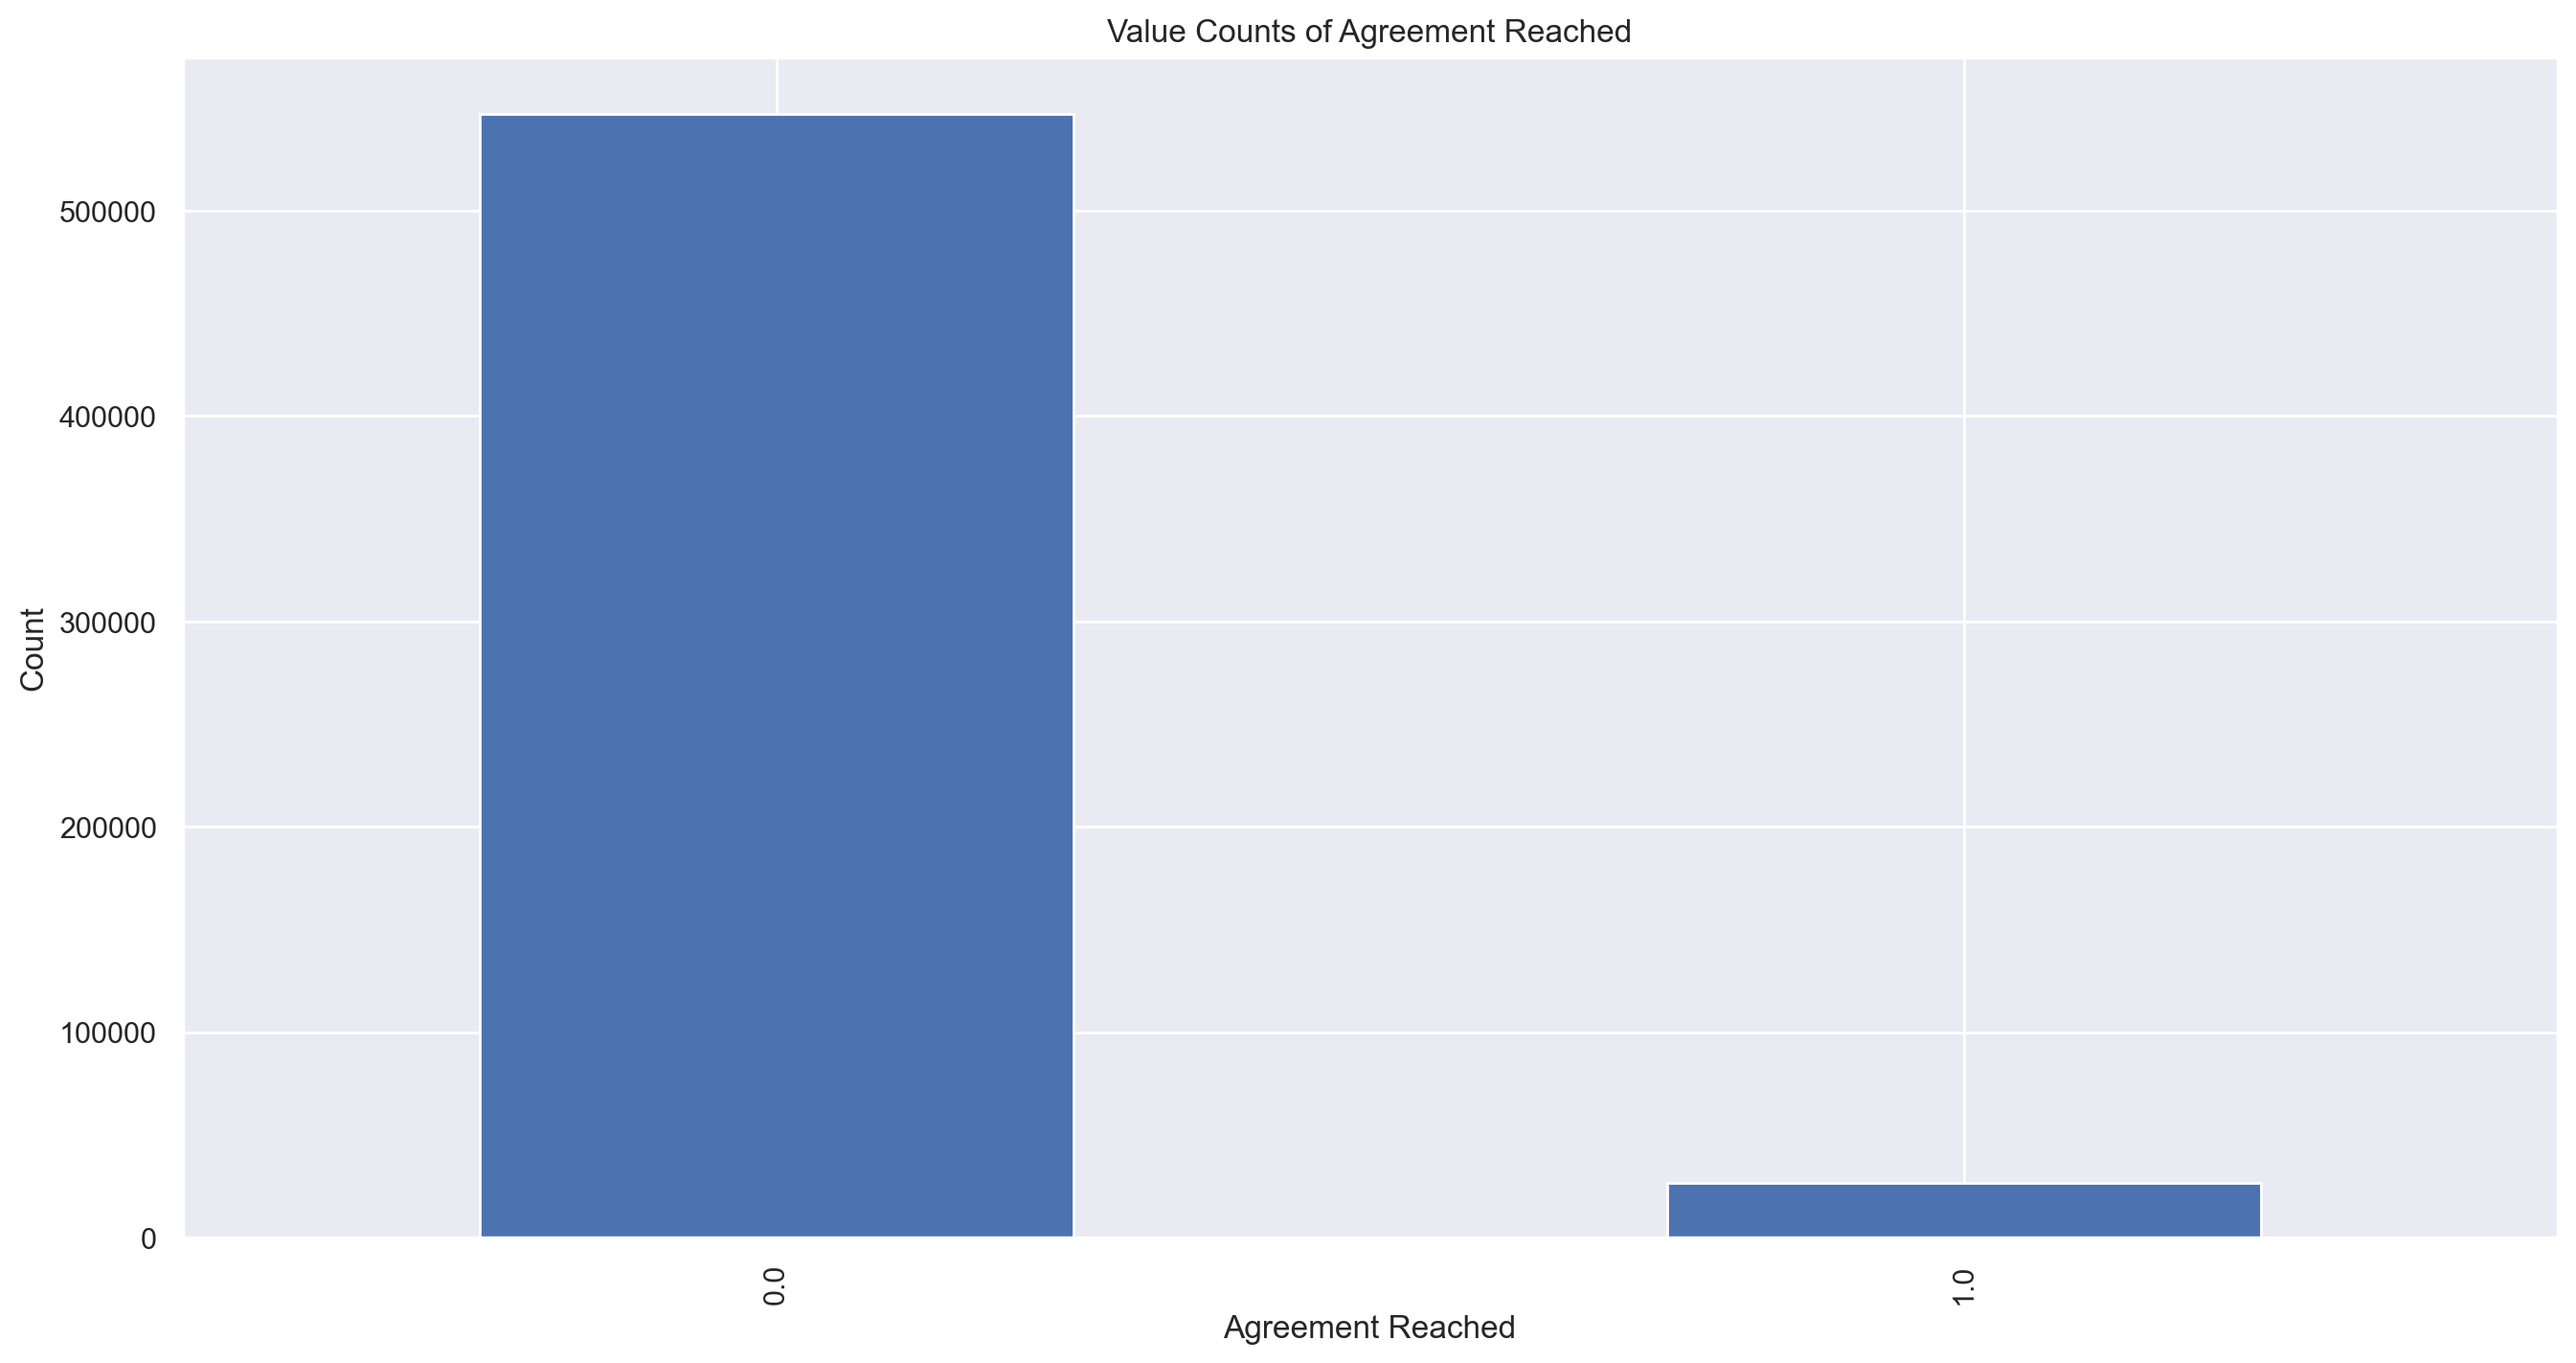

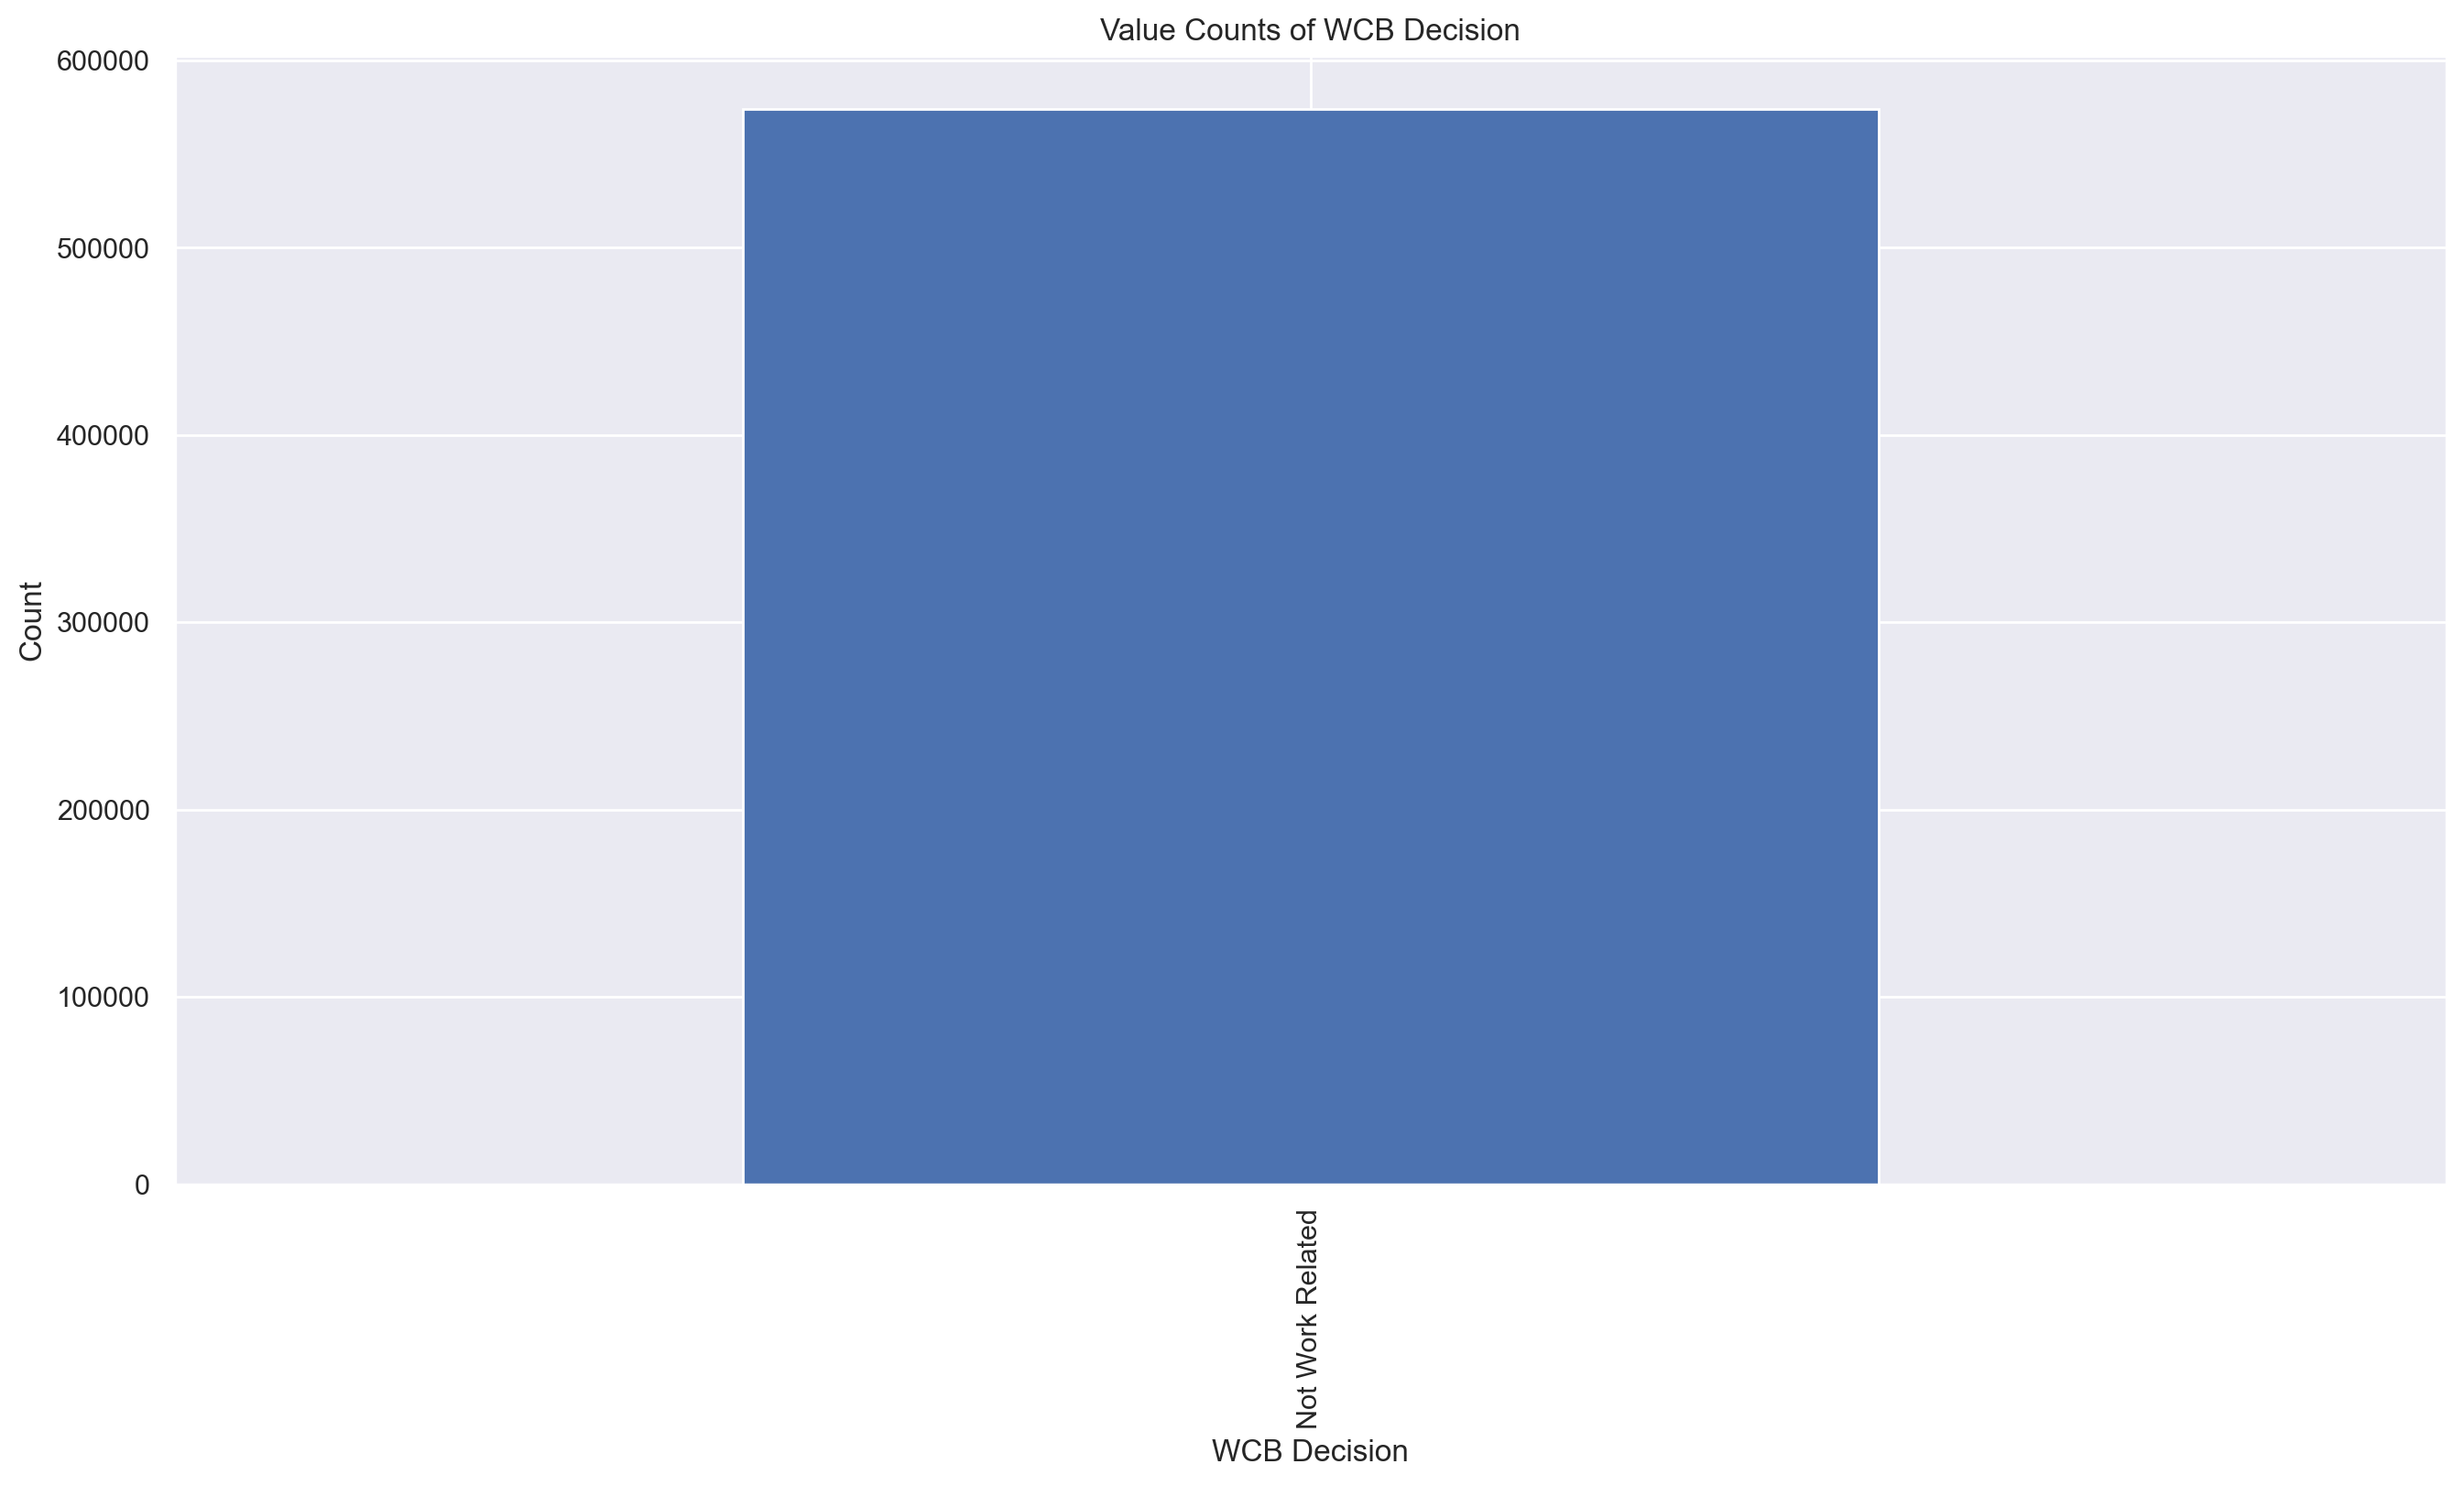

In [33]:
# Select all categorical columns
categorical_columns = wcb.select_dtypes(include='object').columns

# Plot value counts for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(16, 8))
    wcb[col].value_counts().plot(kind='bar')
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## 1.6 Multivariate Relationships <a name="16-multivariate-relationships"></a>


`Gender` <> `Day of Year`

In [36]:
wcb['Day of Year'] = wcb['Accident Date'].dt.dayofyear

In [37]:
# Map Gender to numerical values (e.g., 0 for Male, 1 for Female)
wcb['Gender Numeric'] = wcb['Gender'].map({'M': 0, 'F': 1})

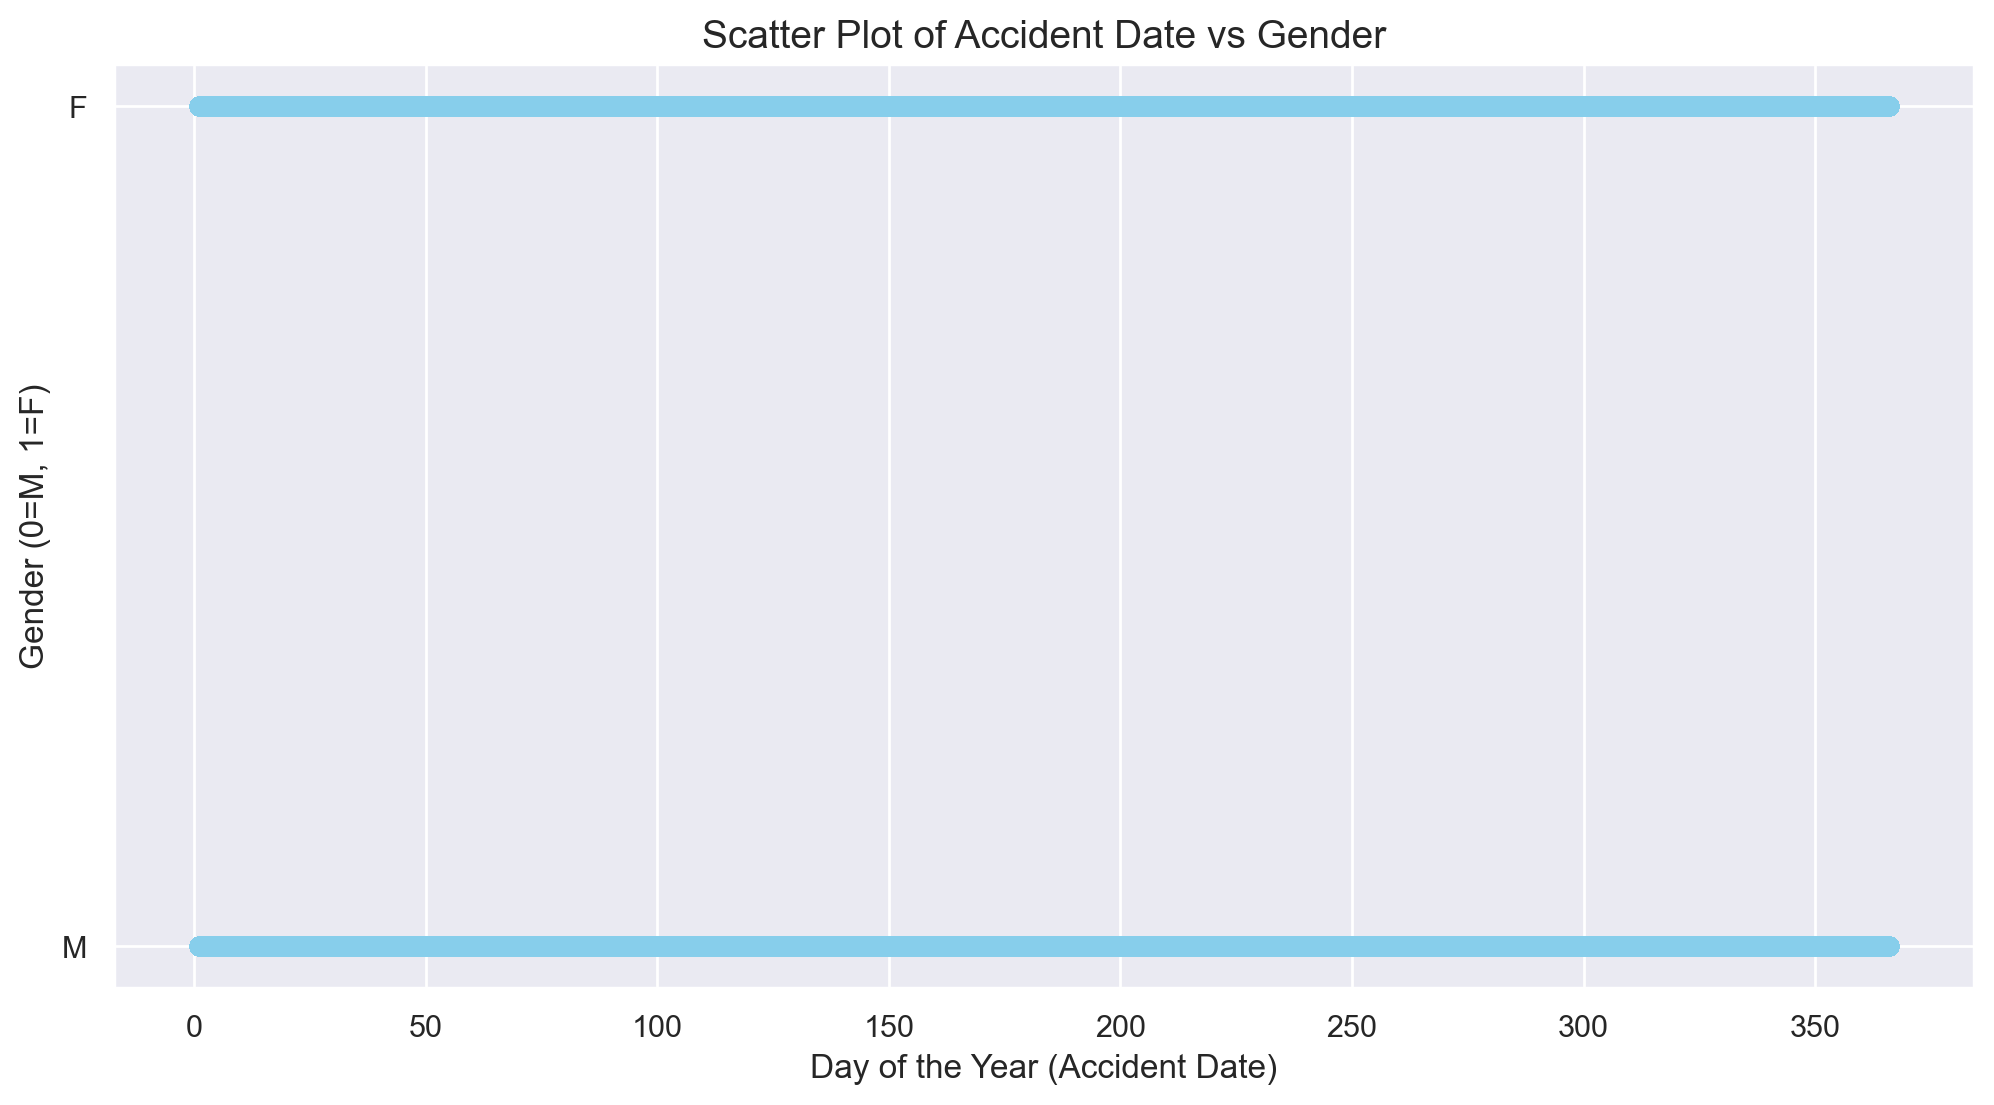

In [38]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(wcb['Day of Year'], wcb['Gender Numeric'], alpha=0.6, color='skyblue')

# Add labels and title
plt.title('Scatter Plot of Accident Date vs Gender', fontsize=14)
plt.xlabel('Day of the Year (Accident Date)', fontsize=12)
plt.ylabel('Gender (0=M, 1=F)', fontsize=12)

# Customizing the y-ticks for better interpretation
plt.yticks([0, 1], ['M', 'F'])

# Show the plot
plt.show()

# 2. Clean and Pre-process the Data <a name="2-clean-and-pre-process-the-data"></a>


## 2.1 Missing Values <a name="21-missing-values"></a>


Check for % non-null values for each feature:

In [42]:
wcb.shape

(593471, 35)

In [43]:
# Calculate the non-null percentage and null counts
non_null_percentage = wcb.notna().mean() * 100
null_counts = wcb.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': wcb.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

Variable  Non-Null Percentage  Null Values
3                        Assembly Date           100.000000            0
11                    Claim Identifier           100.000000            0
17                              Gender            96.723513        19445
9                         Carrier Name            96.723513        19445
15                       District Name            96.723513        19445
14                  COVID-19 Indicator            96.723513        19445
13                    County of Injury            96.723513        19445
12                   Claim Injury Type            96.723513        19445
10                        Carrier Type            96.723513        19445
30                   Agreement Reached            96.723513        19445
1                        Age at Injury            96.723513        19445
31                        WCB Decision            96.723513        19445
32                Number of Dependents            96.723513        19445
4              Attorney/Representative            96.723513        19445
2       Alternative Dispute Resolution            96.723513        19445
21                  Medical Fee Region            96.723513        19445
33                         Day of Year            96.101916        23134
0                        Accident Date            96.101916        23134
34                      Gender Numeric            95.921957        24202
20           Industry Code Description            95.045588        29403
19                       Industry Code            95.045588        29403
7                             C-2 Date            94.270150        34005
23           WCIO Cause of Injury Code            94.088169        35085
24    WCIO Cause of Injury Description            94.088169        35085
25          WCIO Nature of Injury Code            94.085305        35102
26   WCIO Nature of Injury Description            94.085305        35102
27              WCIO Part Of Body Code            93.845192        36527
28       WCIO Part Of Body Description            93.845192        36527
29                            Zip Code            91.898172        48082
5                  Average Weekly Wage            91.895813        48096
6                           Birth Year            91.823863        48523
8                             C-3 Date            31.550826       406226
16                  First Hearing Date            25.409498       442673
18                         IME-4 Count            22.377336       460668
22  OIICS Nature of Injury Description             0.000000       593471

**Drop column with all null values:**

In [45]:
wcb.drop(columns = ['OIICS Nature of Injury Description'], inplace = True)

Check how many rows with missing values there are throughout all dataset columns: <br>
*Excluding 'Assembly Date' and 'Claim Identifier', which have values for every row but aren't relevant enough to keep if all others are NaN*

In [47]:
#First we ignore the 2 columns with no missing values - since these are identifying for cases, but aren't relevant enough for each case
nan_columns = wcb.columns.drop(['Assembly Date', 'Claim Identifier'])

# Count how many rows have all NaN values in the selected columns
((wcb[nan_columns].isnull()) | (wcb[nan_columns] == 0)).all(axis=1).sum()

19445

**Drop rows with all NaN values, identified in previous step for the selected columns (all but 2):**

In [49]:
wcb = wcb.dropna(subset = nan_columns, how = 'all')

In [50]:
wcb.shape
# We know have 574026 rows, less 19445 then before

(574026, 34)

In summary: <br>
We **treated missing values for a total of 15 features** with this operation.

**Columns to drop** =1 <br>
`OIICS Nature of Injury Description` <br>
**Rows to drop** =19445 <br>
there were 14 columns with this exact number of missing values <br>

`Birth Year`

If the Age at injury and Accident Date are known, we can calculate the birth year from a simple subtraction between the two:

In [53]:
wcb['Birth Year'] = wcb.apply(lambda x: x['Accident Date'].year - x['Age at Injury'] if pd.isna(x['Birth Year']) else x['Birth Year'], axis=1)

### Proposal to fill missing values (for numerical data)
`Age at Injury`                        can be replaced with median <br>
`Average Weekly Wage`                   can be replaced with the average weekly age per age for the rows with values <br>
`Birth Year`                            if there is age, 2024-age at injury <br>
`IME-4 Count`                           Number of IME-4 forms received per claim. The IME-4 form is 
the “Independent Examiner's Report of Independen  Medica 
Examination” for m.missing values = 0 <br>
`Industry Code`                         <> NaN. if industry description isn't NaN, we can check code from this column <br>
`OIICS Nature of Injury Description`  <> oiics manual 2007 downloaded   <br>
`WCIO Cause of Injury Code`           site blocked   <br>
`WCIO Nature of Injury Code`          site blocked   <br>
`WCIO Part Of Body Code`              site blocked <br>
`Agreement Recahe `  Binary value: Yes if there is an agreement without  h einvolvement of the WCB -> "unknow:n at te  start of a clam" -> shol d return 0 or 1m<rb

`Number of Dependents` this variable is not explained.  NaN we can assume it's 0 dependent?s <br4

#### Notes

`WCIO Part Of Body Code` -> there are negative values!!! <br>
Dados apenas de 2020 ate 2022 <br>
Transformar a data em anos e meses <br>
Outliers nas idades (boxplot) <br>

In [57]:
non_null_df.sort_values('Non-Null Percentage', ascending=False)

Variable  Non-Null Percentage  Null Values
3                        Assembly Date           100.000000            0
11                    Claim Identifier           100.000000            0
17                              Gender            96.723513        19445
9                         Carrier Name            96.723513        19445
15                       District Name            96.723513        19445
14                  COVID-19 Indicator            96.723513        19445
13                    County of Injury            96.723513        19445
12                   Claim Injury Type            96.723513        19445
10                        Carrier Type            96.723513        19445
30                   Agreement Reached            96.723513        19445
1                        Age at Injury            96.723513        19445
31                        WCB Decision            96.723513        19445
32                Number of Dependents            96.723513        19445
4              Attorney/Representative            96.723513        19445
2       Alternative Dispute Resolution            96.723513        19445
21                  Medical Fee Region            96.723513        19445
33                         Day of Year            96.101916        23134
0                        Accident Date            96.101916        23134
34                      Gender Numeric            95.921957        24202
20           Industry Code Description            95.045588        29403
19                       Industry Code            95.045588        29403
7                             C-2 Date            94.270150        34005
23           WCIO Cause of Injury Code            94.088169        35085
24    WCIO Cause of Injury Description            94.088169        35085
25          WCIO Nature of Injury Code            94.085305        35102
26   WCIO Nature of Injury Description            94.085305        35102
27              WCIO Part Of Body Code            93.845192        36527
28       WCIO Part Of Body Description            93.845192        36527
29                            Zip Code            91.898172        48082
5                  Average Weekly Wage            91.895813        48096
6                           Birth Year            91.823863        48523
8                             C-3 Date            31.550826       406226
16                  First Hearing Date            25.409498       442673
18                         IME-4 Count            22.377336       460668
22  OIICS Nature of Injury Description             0.000000       593471

## 2.2 Duplicates <a name="22-duplicates"></a>


In [59]:
wcb.duplicated().sum()
#There is none to drop

0

In [60]:
duplicate_rows = wcb.duplicated()

# If you want to return the entire DataFrame with only the duplicate rows:
duplicate_rows_df = wcb[duplicate_rows]

duplicate_rows_df

Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, C-3 Date, Carrier Name, Carrier Type, Claim Identifier, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, First Hearing Date, Gender, IME-4 Count, Industry Code, Industry Code Description, Medical Fee Region, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Agreement Reached, WCB Decision, Number of Dependents, Day of Year, Gender Numeric]
Index: []

## 2.3 Outliers <a name="23-outliers"></a>


In [62]:
wcb.describe().T

count                           mean  \
Accident Date           570337  2021-04-28 21:00:27.892983296   
Age at Injury         574026.0                       42.11427   
Assembly Date           574026  2021-07-19 19:01:36.894565888   
Average Weekly Wage   545375.0                     491.088321   
Birth Year            573850.0                    1891.382286   
C-2 Date                559466  2021-07-16 20:11:19.865442816   
C-3 Date                187245  2021-07-26 21:31:28.449892096   
Claim Identifier      574026.0                 5778955.610948   
First Hearing Date      150798  2022-03-19 05:07:38.218278912   
IME-4 Count           132803.0                       3.207337   
Number of Dependents  574026.0                       3.006559   
Day of Year           570337.0                     182.079741   
Gender Numeric        569269.0                       0.411143   

                                      min                  25%  \
Accident Date         1961-09-06 00:00:00  2020-09-14 00:00:00   
Age at Injury                         0.0                 31.0   
Assembly Date         2020-01-01 00:00:00  2020-10-27 00:00:00   
Average Weekly Wage                   0.0                  0.0   
Birth Year                            0.0               1965.0   
C-2 Date              1996-01-12 00:00:00  2020-11-06 00:00:00   
C-3 Date              1992-11-13 00:00:00  2020-10-27 00:00:00   
Claim Identifier                5393066.0           5586764.25   
First Hearing Date    2020-01-30 00:00:00  2021-06-01 00:00:00   
IME-4 Count                           1.0                  1.0   
Number of Dependents                  0.0                  1.0   
Day of Year                           1.0                 87.0   
Gender Numeric                        0.0                  0.0   

                                      50%                  75%  \
Accident Date         2021-06-27 00:00:00  2022-03-21 00:00:00   
Age at Injury                        42.0                 54.0   
Assembly Date         2021-07-30 00:00:00  2022-04-19 00:00:00   
Average Weekly Wage                   0.0                841.0   
Birth Year                         1977.0               1989.0   
C-2 Date              2021-08-09 00:00:00  2022-04-26 00:00:00   
C-3 Date              2021-07-21 00:00:00  2022-04-20 00:00:00   
Claim Identifier                5778282.5           5971328.75   
First Hearing Date    2022-03-09 00:00:00  2023-01-11 00:00:00   
IME-4 Count                           2.0                  4.0   
Number of Dependents                  3.0                  5.0   
Day of Year                         184.0                274.0   
Gender Numeric                        0.0                  1.0   

                                      max            std  
Accident Date         2023-09-29 00:00:00            NaN  
Age at Injury                       117.0      14.256432  
Assembly Date         2022-12-31 00:00:00            NaN  
Average Weekly Wage             2828079.0     6092.91812  
Birth Year                         2022.0     404.576419  
C-2 Date              2024-06-01 00:00:00            NaN  
C-3 Date              2024-05-31 00:00:00            NaN  
Claim Identifier                6165685.0  222308.226013  
First Hearing Date    2024-06-07 00:00:00            NaN  
IME-4 Count                          73.0       2.832303  
Number of Dependents                  6.0       2.000801  
Day of Year                         366.0     105.903489  
Gender Numeric                        1.0       0.492042

`Age at Injury` 

In [79]:
wcb['Age at Injury'].describe()

count     574026.0
mean      42.11427
std      14.256432
min            0.0
25%           31.0
50%           42.0
75%           54.0
max          117.0
Name: Age at Injury, dtype: Float64

<Axes: >

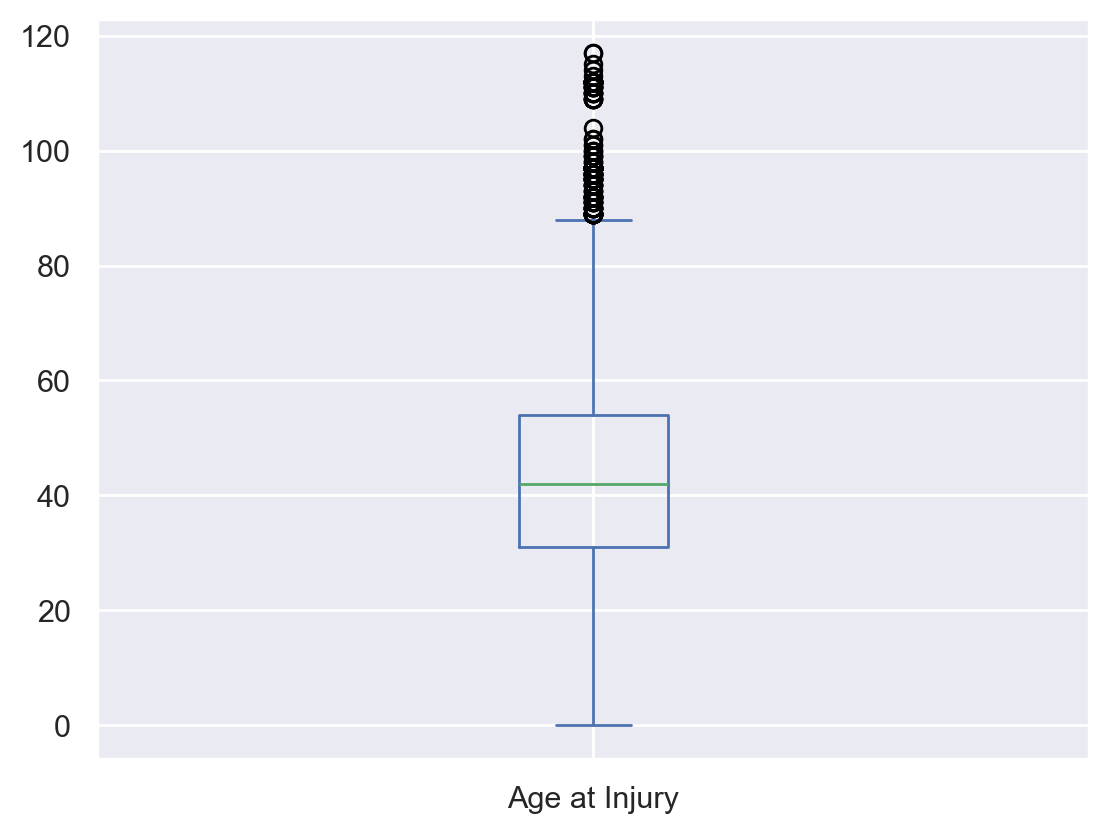

In [64]:
wcb['Age at Injury'].plot(kind='box')

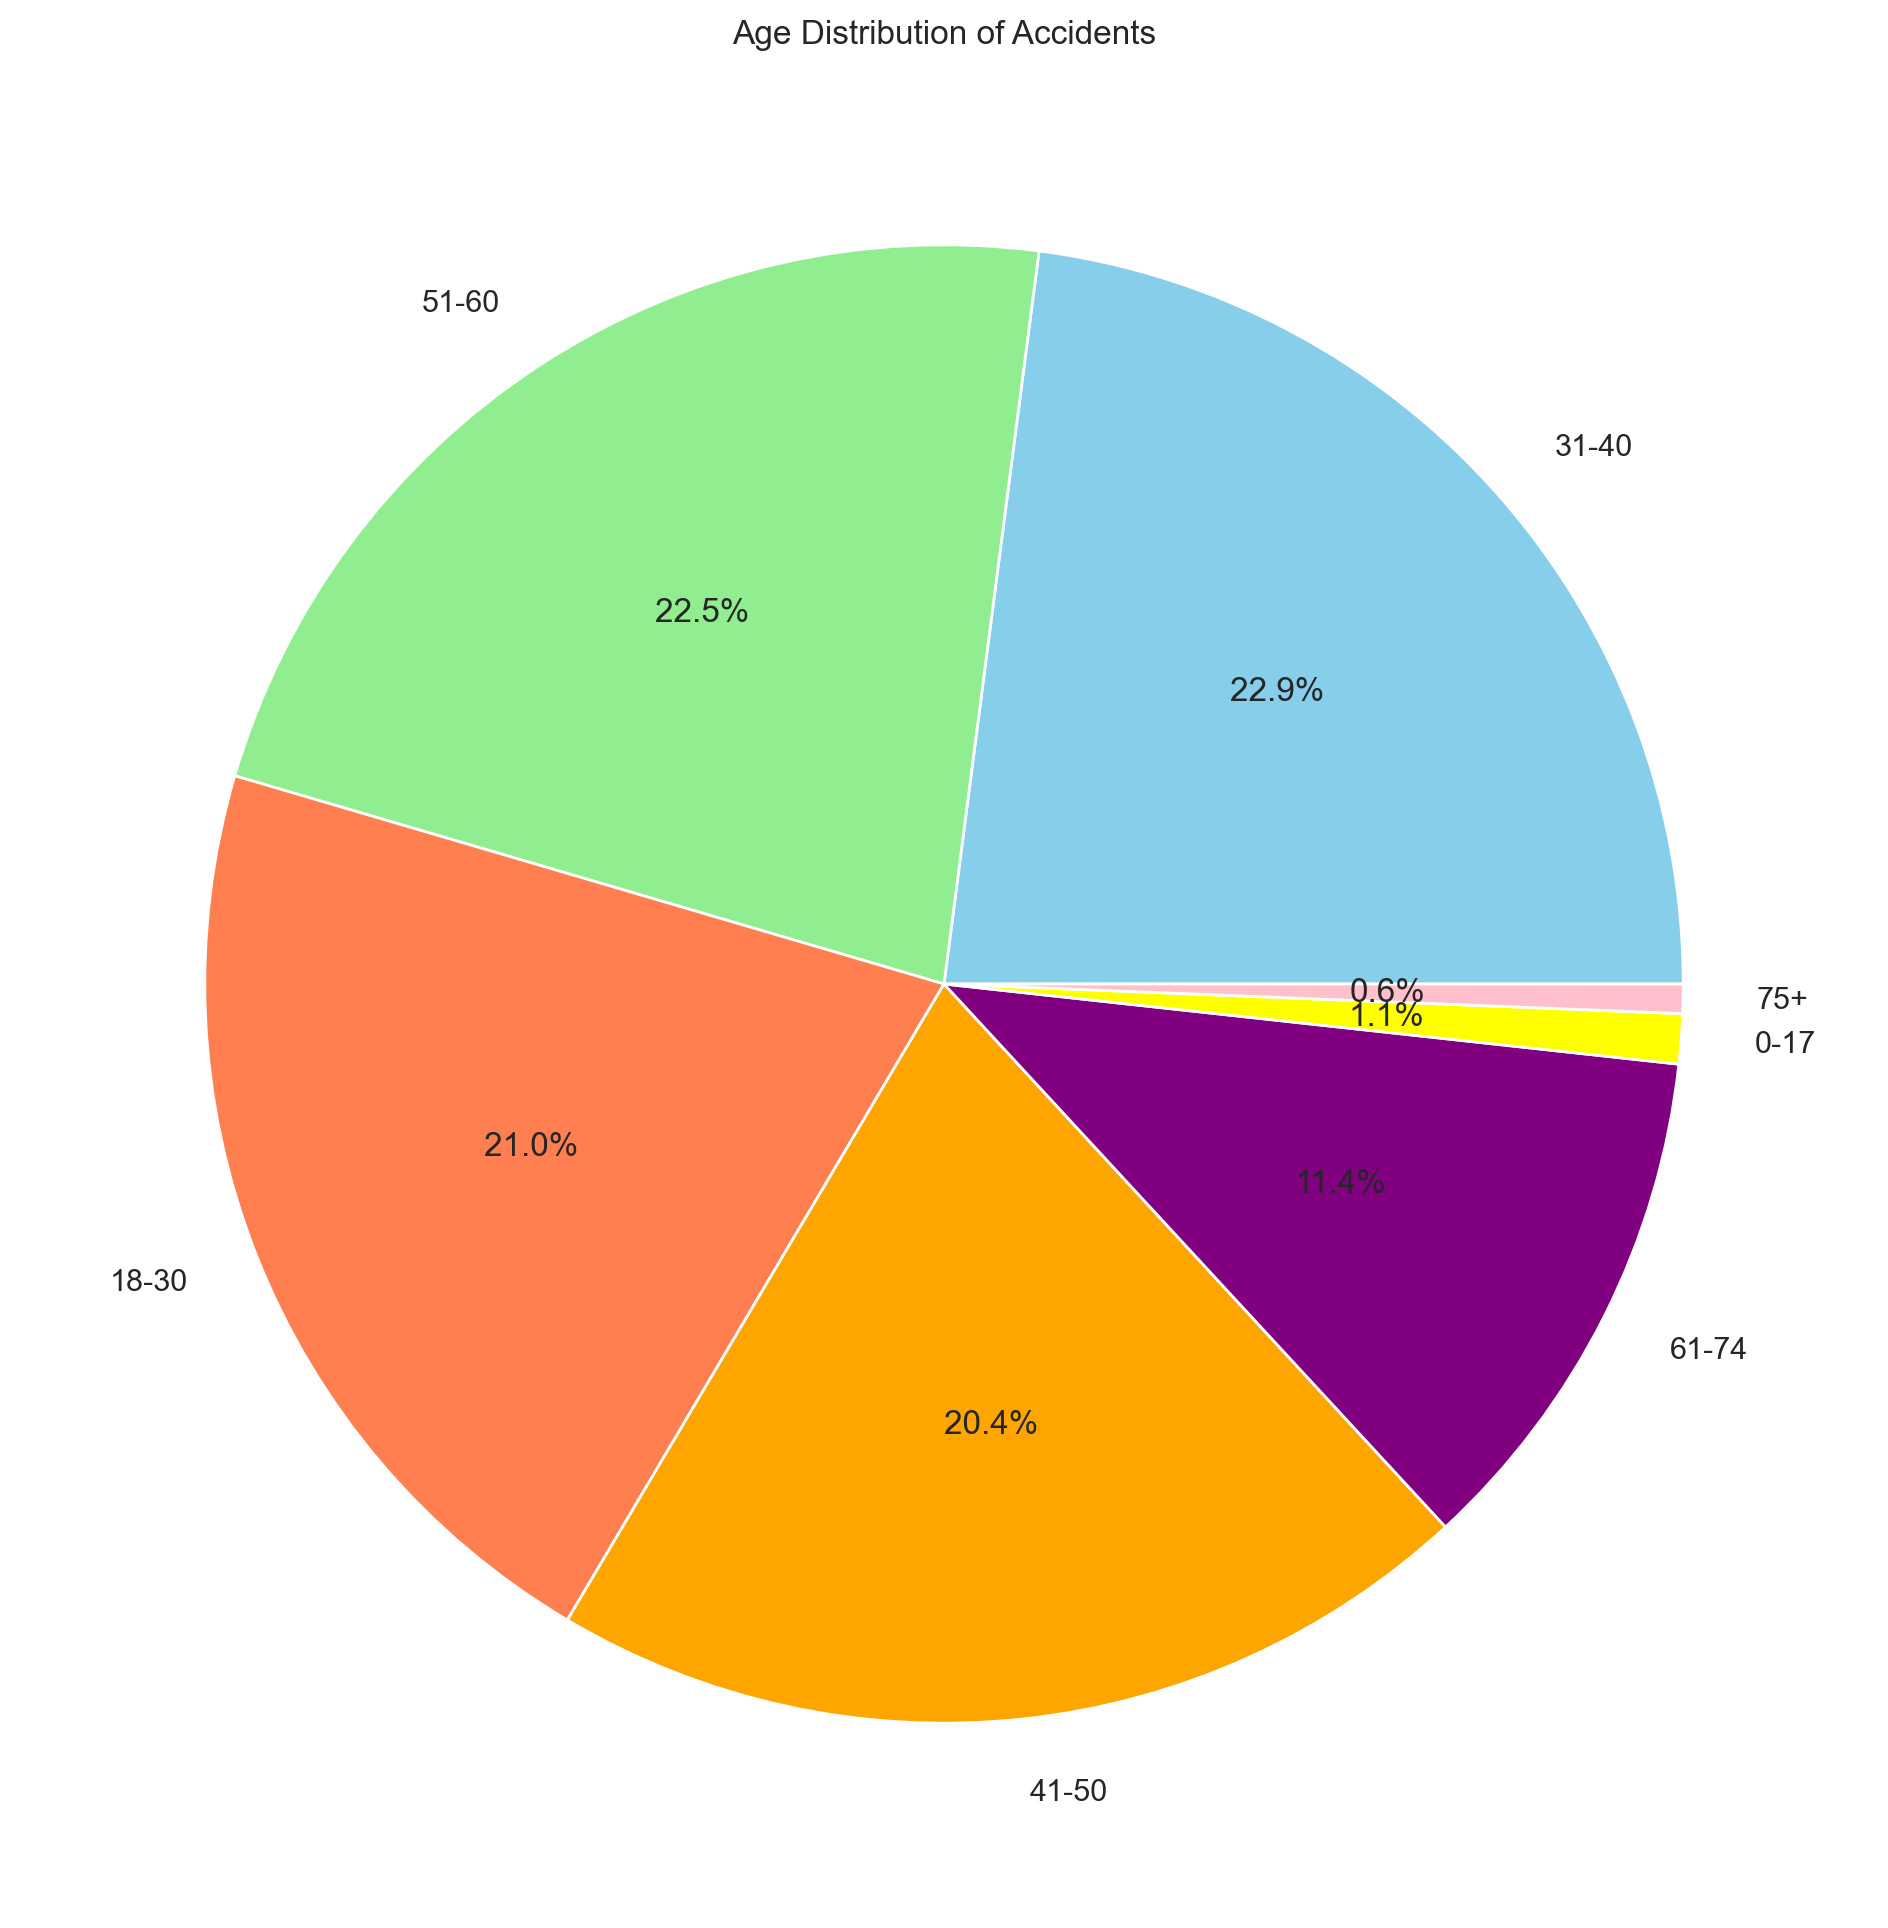

In [82]:
# Define age categories
bins = [0, 17, 30, 40, 50, 60, 74, 100]
labels = ['0-17', '18-30', '31-40', '41-50', '51-60', '61-74', '75+']

# Create a new column for age categories
wcb['Age Category'] = pd.cut(wcb['Age at Injury'], bins=bins, labels=labels, right=False)
age_distribution = wcb['Age Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(17, 12))  # Set the figure size

age_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'coral', 'orange', 'purple', 'yellow', 'pink'])

# Customize the plot
plt.title('Age Distribution of Accidents')
plt.ylabel('')  # Remove the default y-label (which shows "Age Category")

# Show the plot
plt.show()

## 2.4 Categorical Data <a name="24-categorical-data"></a>


#### Understand unique values <br>

**Dates** (5) <br>
`Accident Date` <br>
`Assembly Date` <br>
`C-2 Date` turn into a binary outcome where 0 is form wasn't received and 1 is form was received <br>
`C-3 Date` <br>
`First Hearing Date` <br>

**Categories** (9) <br>
`Alternative Dispute Resolution` <br>`Attorney/Representative` <br>
`Carrier Name` <br>
`Carrier Type` <br>
`Claim Injury Type` <br>
`County of Injury` <br>
`COVID-19 Indicator` <br>
`District Name` <br>

(8) <br>
`Gender` <br>
`Industry Code Description` <br>
`Medical Fee Region` <br>
`WCIO Cause of Injury Description` <br>
`WCIO Nature of Injury Description` <br>
`WCIO Part Of Body Description` <br>
`Zip Code`  <br>
`WCB Decision` <br>

#### Notes
`WCB Decision` is always 'not work related' <br>
`Gender`returns M, F, Y, U -> what does Y and U stand for?

In [84]:
wcb[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']] # rever depois de fazer a correlação
# ver também 21 a 26

WCIO Part Of Body Code WCIO Part Of Body Description
0                        62.0                      BUTTOCKS
1                        38.0                   SHOULDER(S)
2                        10.0          MULTIPLE HEAD INJURY
4                        36.0                     FINGER(S)
5                        38.0                   SHOULDER(S)
...                       ...                           ...
593451                   42.0               LOWER BACK AREA
593455                   35.0                          HAND
593456                   34.0                         WRIST
593457                   55.0                         ANKLE
593467                   -9.0                      MULTIPLE

[574026 rows x 2 columns]

In [95]:
wcb.describe(include=['object', 'category']).T

count unique  \
Alternative Dispute Resolution       574026      3   
Attorney/Representative              574026      2   
Carrier Name                         574026   2046   
Carrier Type                         574026      8   
Claim Injury Type                    574026      8   
County of Injury                     574026     63   
COVID-19 Indicator                   574026      2   
District Name                        574026      8   
Gender                               574026      4   
Industry Code                      564068.0   24.0   
Industry Code Description            564068     20   
Medical Fee Region                   574026      5   
WCIO Cause of Injury Code          558386.0   77.0   
WCIO Cause of Injury Description     558386     74   
WCIO Nature of Injury Code         558369.0   56.0   
WCIO Nature of Injury Description    558369     56   
WCIO Part Of Body Code             556944.0   57.0   
WCIO Part Of Body Description        556944     54   
Zip Code                             545389  10060   
Agreement Reached                  574026.0    2.0   
WCB Decision                         574026      1   
Age Category                         573969      7   

                                                                 top      freq  
Alternative Dispute Resolution                                     N    571412  
Attorney/Representative                                            N    392291  
Carrier Name                                    STATE INSURANCE FUND    111144  
Carrier Type                                             1A. PRIVATE    285368  
Claim Injury Type                                        2. NON-COMP    291078  
County of Injury                                             SUFFOLK     60430  
COVID-19 Indicator                                                 N    546505  
District Name                                                    NYC    270779  
Gender                                                             M    335218  
Industry Code                                                   62.0  114339.0  
Industry Code Description          HEALTH CARE AND SOCIAL ASSISTANCE    114339  
Medical Fee Region                                                IV    265981  
WCIO Cause of Injury Code                                       56.0   46610.0  
WCIO Cause of Injury Description                             LIFTING     46610  
WCIO Nature of Injury Code                                      52.0  153373.0  
WCIO Nature of Injury Description                     STRAIN OR TEAR    153373  
WCIO Part Of Body Code                                          42.0   51862.0  
WCIO Part Of Body Description                        LOWER BACK AREA     51862  
Zip Code                                                       11236      3302  
Agreement Reached                                                0.0  547239.0  
WCB Decision                                        Not Work Related    574026  
Age Category                                                   31-40    131712

In [97]:
unique = wcb.select_dtypes(include=['object', 'category']).apply(lambda x: x.unique(), axis=0)
pd.set_option('display.max_colwidth', 100)  # No limit on column width
unique

Alternative Dispute Resolution                                                                                                 [N, Y, U]
Attorney/Representative                                                                                                           [N, Y]
Carrier Name                         [NEW HAMPSHIRE INSURANCE CO, ZURICH AMERICAN INSURANCE CO, INDEMNITY INSURANCE CO OF, STATE INSU...
Carrier Type                         [1A. PRIVATE, 2A. SIF, 4A. SELF PRIVATE, 3A. SELF PUBLIC, UNKNOWN, 5D. SPECIAL FUND - UNKNOWN, 5...
Claim Injury Type                    [2. NON-COMP, 4. TEMPORARY, 3. MED ONLY, 5. PPD SCH LOSS, 6. PPD NSL, 1. CANCELLED, 8. DEATH, 7....
County of Injury                     [ST. LAWRENCE, WYOMING, ORANGE, DUTCHESS, SUFFOLK, ONONDAGA, RICHMOND, MONROE, KINGS, NEW YORK, ...
COVID-19 Indicator                                                                                                                [N, Y]
District Name                            

## 2.5 Feature Engineering <a name="25-feature-engineering"></a>


In [99]:
wcb[wcb['WCIO Part Of Body Code'] == -9] 

Accident Date  Age at Injury Alternative Dispute Resolution  \
128       2019-12-19             42                              N   
235       2019-09-13             36                              N   
790       2019-12-12             57                              N   
1006      2018-01-06             50                              N   
2276      2019-12-26             33                              N   
...              ...            ...                            ...   
593433    2022-11-23             30                              N   
593438    2022-05-03             52                              N   
593439    2022-12-26             30                              N   
593442    2022-12-22             53                              N   
593467    2022-12-13             72                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
128       2020-01-01                       Y              1093.74      1977.0   
235       2020-01-02                       Y              1500.00      1983.0   
790       2020-01-03                       Y               764.35      1962.0   
1006      2020-01-03                       N                 0.00      1967.0   
2276      2020-01-06                       Y               670.00      1986.0   
...              ...                     ...                  ...         ...   
593433    2022-12-30                       Y                 0.00      1992.0   
593438    2022-12-30                       N              1555.03      1970.0   
593439    2022-12-30                       Y              1234.19      1992.0   
593442    2022-12-30                       Y                 0.00      1969.0   
593467    2022-12-31                       N                 0.00      1950.0   

         C-2 Date   C-3 Date                   Carrier Name     Carrier Type  \
128    2019-12-31 2020-01-14    PUBLIC EMPLOYERS RISK MGMT.  3A. SELF PUBLIC   
235    2020-02-07 2019-12-27       POLICE, FIRE, SANITATION  3A. SELF PUBLIC   
790    2020-01-03 2020-01-09          PROPERTY AND CASUALTY      1A. PRIVATE   
1006   2020-01-03        NaT     NEW HAMPSHIRE INSURANCE CO      1A. PRIVATE   
2276   2020-01-06 2020-12-08              SYRACUSE, CITY OF  3A. SELF PUBLIC   
...           ...        ...                            ...              ...   
593433 2023-01-06 2022-12-21        WESCO INSURANCE COMPANY      1A. PRIVATE   
593438 2022-12-29        NaT   ONONDAGA COUNTY SELF INS DIV  3A. SELF PUBLIC   
593439 2022-12-30        NaT             TONAWANDA, TOWN OF  3A. SELF PUBLIC   
593442 2022-12-30        NaT    INDEMNITY INS. OF N AMERICA      1A. PRIVATE   
593467 2022-12-31        NaT  TECHNOLOGY INSURANCE CO. INC.      1A. PRIVATE   

        Claim Identifier Claim Injury Type County of Injury  \
128              5393974      4. TEMPORARY         DUTCHESS   
235              5393785   5. PPD SCH LOSS          SUFFOLK   
790              5395679   5. PPD SCH LOSS            BRONX   
1006             5395006       2. NON-COMP            BRONX   
2276             5396338      4. TEMPORARY         ONONDAGA   
...                  ...               ...              ...   
593433           6164364       2. NON-COMP           QUEENS   
593438           6165182      4. TEMPORARY         ONONDAGA   
593439           6165293      4. TEMPORARY             ERIE   
593442           6165175       2. NON-COMP           NASSAU   
593467           6165075       2. NON-COMP         SULLIVAN   

       COVID-19 Indicator District Name First Hearing Date Gender  \
128                     N        ALBANY         2020-08-27      M   
235                     N     HAUPPAUGE         2020-03-12      F   
790                     N           NYC         2020-02-18      M   
1006                    N           NYC                NaT      M   
2276                    N      SYRACUSE         2021-02-16      M   
...                   ...           ...                ...   

In [101]:
# transformar o -9 em 9, deve ter sido um erro

Turn 'C-3 Date' into 'C-3 Form', a binary outcome feature, where 0="no form received" and 1="at least 1 form received":

In [104]:
wcb['C-3 Form'] = wcb['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)

Turn 'First Hearing Date' into 'First Hearing', a binary outcome feature, where 0="there was no hearing" and 1="there was a hearing":

In [107]:
wcb['First Hearing'] = wcb['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1)

Examining 'IME-4 Count':

In [109]:
wcb['IME-4 Count']

0         <NA>
1            4
2         <NA>
4         <NA>
5         <NA>
          ... 
593451    <NA>
593455    <NA>
593456       1
593457    <NA>
593467    <NA>
Name: IME-4 Count, Length: 574026, dtype: Int64

In [110]:
wcb['IME-4 Count'].isna().sum()
#how much data from this variable has null values

441223

In [114]:
wcb['IME-4 Count'].nunique()
#how many unique entries there are for IME-4 Count

41

In [116]:
wcb['IME-4 Count'].describe()
# further inspect the distribution of data and outliers

count    132803.0
mean     3.207337
std      2.832303
min           1.0
25%           1.0
50%           2.0
75%           4.0
max          73.0
Name: IME-4 Count, dtype: Float64

`Accident Date` <br>
Days are not as relevant, we can keep only YYYY-MM <br>
"WCB has provided labelled data with all claims assembled between 2020 and 2022" -> So, we only should keep cases from this period, since everything else is not labelled

In [119]:
# Extract year and month, and combine them into a new column
wcb['Accident Date'] = wcb['Accident Date'].dt.to_period('M')

# Display the new column
print(wcb['Accident Date'])

0         2019-12
1         2019-08
2         2019-12
4         2019-12
5         2019-12
           ...   
593451    2022-12
593455    2022-12
593456    2022-12
593457    2022-12
593467    2022-12
Name: Accident Date, Length: 574026, dtype: period[M]


In [121]:
wcb = wcb[(wcb['Accident Date'].dt.year >= 2020) & (wcb['Accident Date'].dt.year <= 2022)]

# "WCB has provided labelled data with all claims assembled between 2020 and 2022" accident date or assembly date?

#### Test column for index:

`Claim Identifier` <br>
[x] Returns unique values and there is one identifying value for each row/case <br>
[x] This column doesn't add any relevant information about each case/row

In [125]:
#Check which unique values there are for this column and store as variable
id = wcb['Claim Identifier'].nunique()

In [127]:
#count all unique values and see if its the same number as total rows, meaning, there is one unique value for each case
id == len(wcb)

True

In [129]:
wcb = wcb.set_index('Claim Identifier')

## 2.6 Data Scaling <a name="26-data-scaling"></a>




# 3. Feature Selection <a name="3-feature-selection"></a>

## 3.1 Correlation Matrix <a name="31-correlation-matrix"></a>


## Correlation Matrix

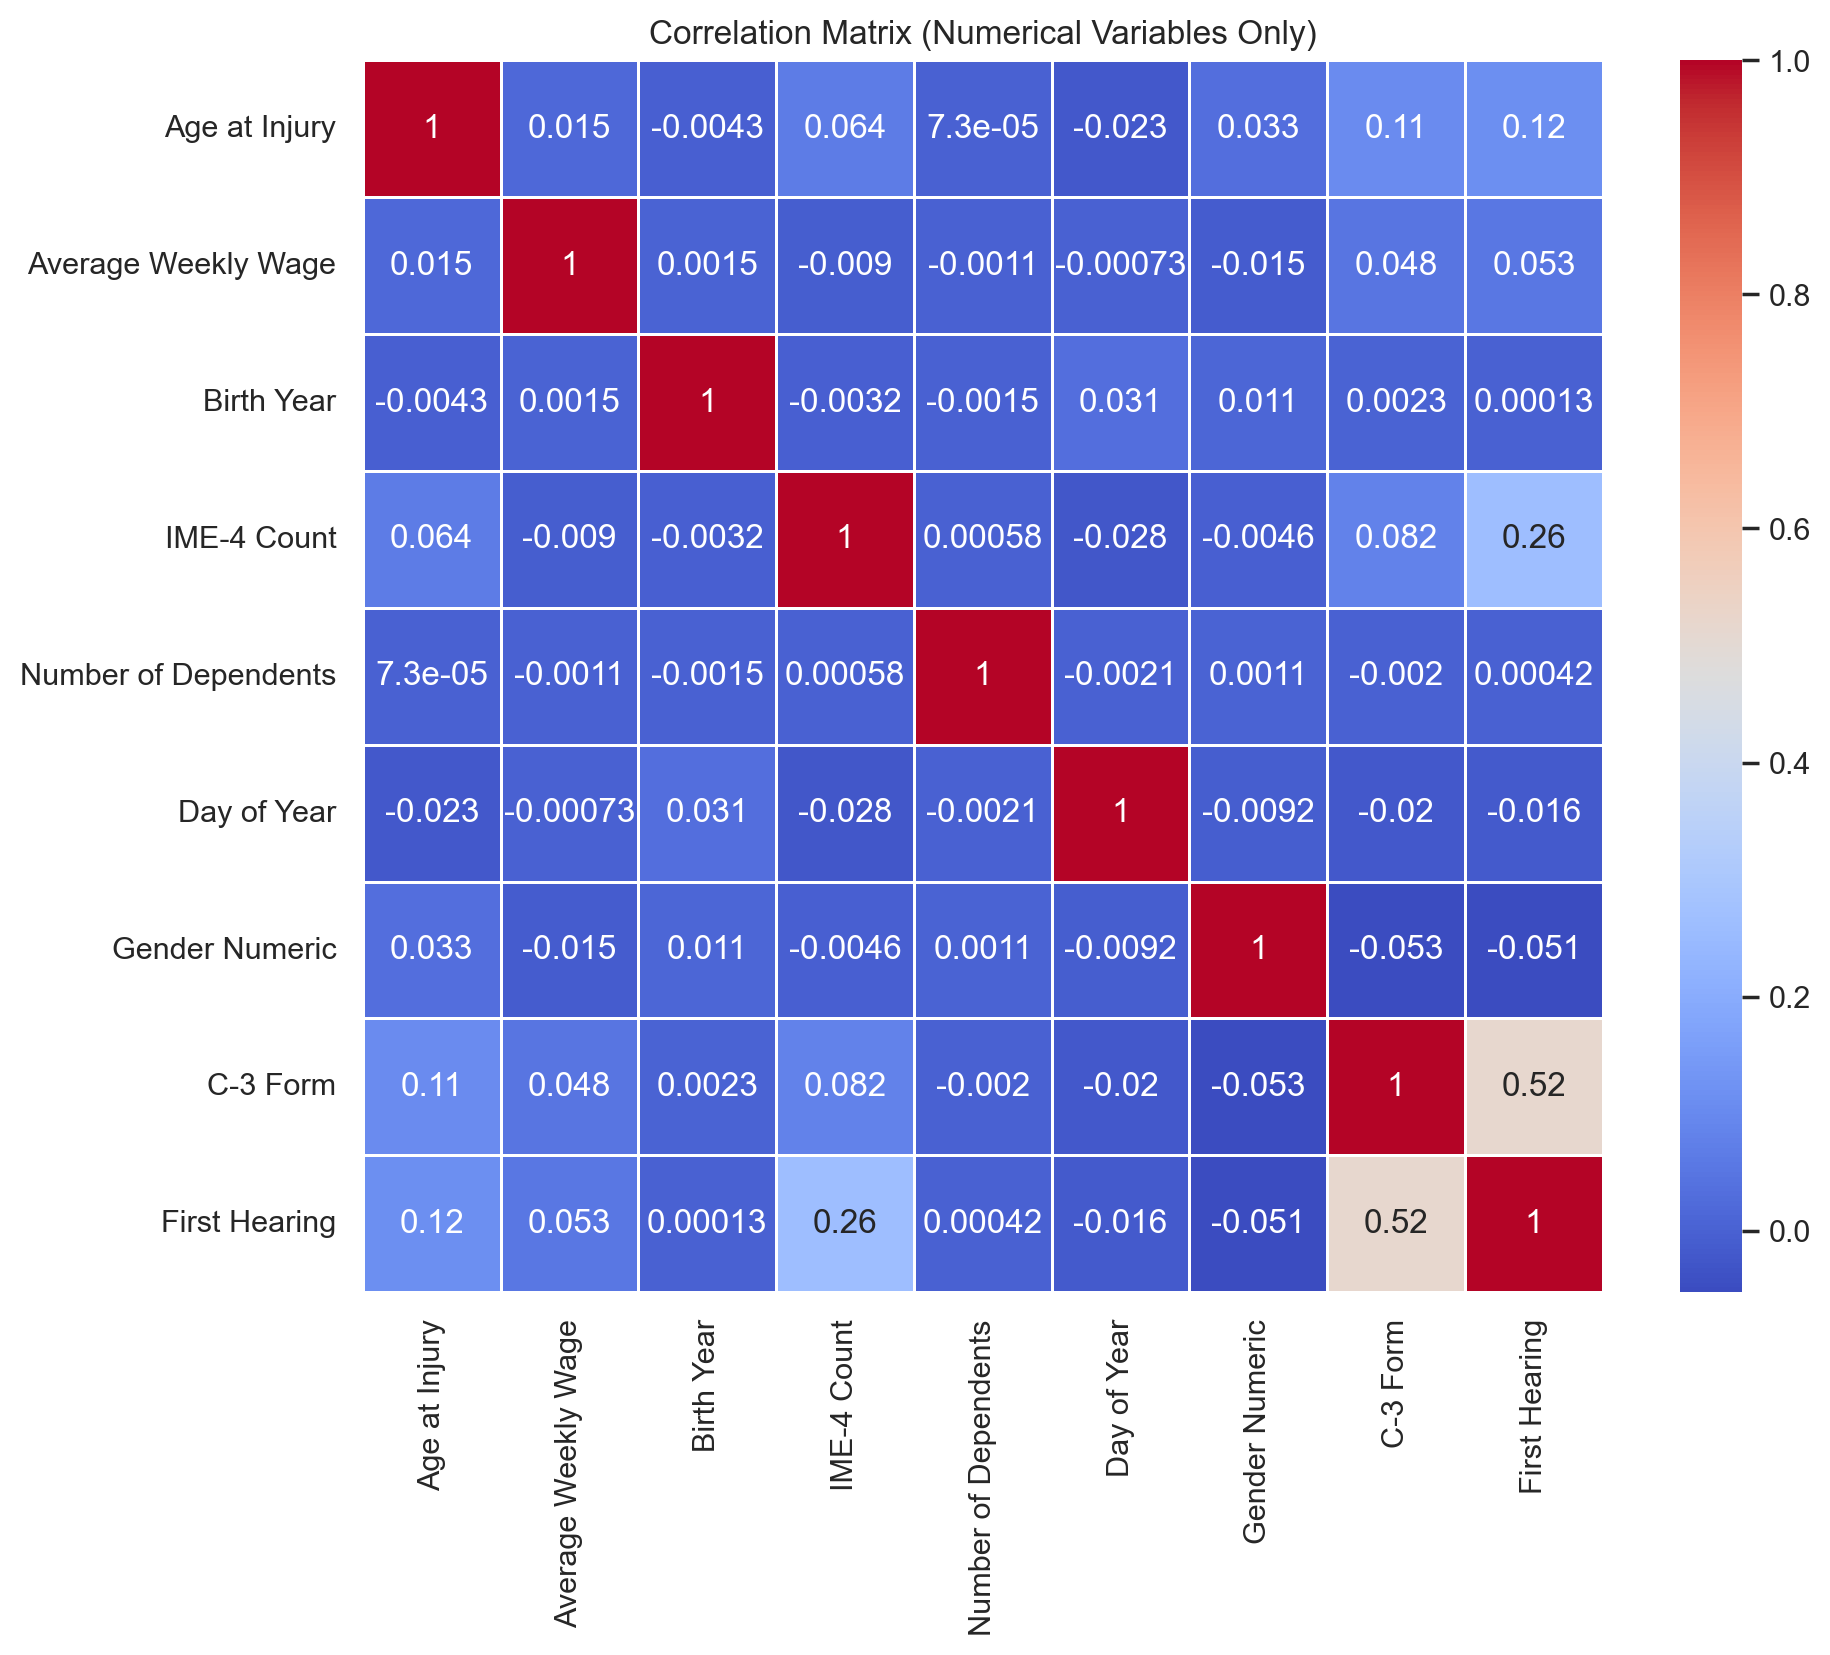

In [135]:
# Step 1: Select only numerical columns
numerical_df = wcb.select_dtypes(include='number')

# Step 2: Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Optional: Adjusts the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()

### 3.2 Aggregations to find patterns


In [143]:
wcb.groupby(['Claim Injury Type','Gender']).agg({'Average Weekly Wage':['mean', 'min', 'max']})

Average Weekly Wage                     
                                        mean      min         max
Claim Injury Type Gender                                         
1. CANCELLED      F                 6.932772     0.00     1782.49
                  M                10.679976     0.00     3442.92
                  U                 8.640000     0.00     1080.00
                  X                 0.000000     0.00        0.00
2. NON-COMP       F                 1.781719     0.00     3500.00
                  M                 3.670954     0.00     4289.65
                  U                 1.616275     0.00     2058.45
                  X                 0.000000     0.00        0.00
3. MED ONLY       F               455.940701     0.00  1227017.00
                  M               502.265649     0.00    70521.00
                  U               382.639082     0.00     4654.74
                  X              1004.996250     0.00     3321.50
4. TEMPORARY      F              1020.469701     0.00  1055027.00
                  M              1230.986939     0.00  2659398.00
                  U              1109.195830     0.00     4962.01
                  X              1048.782000   325.00     1727.01
5. PPD SCH LOSS   F              1329.067919     0.00   248573.00
                  M              1661.123104     0.00  2828079.00
                  U              1304.056768   226.54     5309.25
                  X              2064.402500  1376.63     3079.10
6. PPD NSL        F              1134.777148     0.00     6267.71
                  M              1343.346153     0.00     5903.47
                  U              1433.275000     0.00     2963.10
7. PTD            F              1212.465000   465.00     2119.67
                  M              1405.700952   250.00     3321.22
8. DEATH          F               773.320408     0.00     2845.70
                  M              1116.323523     0.00    11730.77

In [145]:
wcb.groupby(['Claim Injury Type','District Name']).agg({'Age at Injury':['mean', 'min', 'max'], 'Average Weekly Wage':['mean', 'min', 'max']})

Age at Injury         Average Weekly Wage  \
                                         mean min max                mean   
Claim Injury Type District Name                                             
1. CANCELLED      ALBANY            43.465318   0  96            8.438492   
                  BINGHAMTON         46.44086   0  83            0.000000   
                  BUFFALO           44.251969   0  83            6.287546   
                  HAUPPAUGE         42.853372   0  80            9.638070   
                  NYC               42.170676   0  97           10.027809   
...                                       ...  ..  ..                 ...   
8. DEATH          HAUPPAUGE             53.75  29  82         1034.859474   
                  NYC               55.376812  18  84         1195.539598   
                  ROCHESTER              58.1  30  78          492.245789   
                  STATEWIDE         55.789474  29  78         1504.688235   
                  SYRACUSE          55.388889  19  84          826.490286   

                                                
                                 min       max  
Claim Injury Type District Name                 
1. CANCELLED      ALBANY         0.0   1954.86  
                  BINGHAMTON     0.0      0.00  
                  BUFFALO        0.0   1000.00  
                  HAUPPAUGE      0.0   1782.49  
                  NYC            0.0   3442.92  
...                              ...       ...  
8. DEATH          HAUPPAUGE      0.0   4936.36  
                  NYC            0.0  11730.77  
                  ROCHESTER      0.0   1847.94  
                  STATEWIDE      0.0   3167.16  
                  SYRACUSE       0.0   2000.33  

[63 rows x 6 columns]

In [147]:
wcb.groupby('Age at Injury').agg({'Number of Dependents':['mean', 'min', 'max']})

Number of Dependents        
                              mean min max
Age at Injury                             
0                         2.976208   0   6
1                              5.0   4   6
7                              4.0   4   4
8                              3.0   0   5
9                              3.5   1   6
...                            ...  ..  ..
110                       2.166667   1   5
111                          1.875   0   4
112                           3.25   0   6
113                            5.0   5   5
114                            3.0   3   3

[104 rows x 3 columns]

## Step 2: Loop through each column (variable) and create a histogram
for i in range(len(wcb.columns)):
    column_name = wcb.columns[i]  # Get the column name
    plt.figure(figsize=(8, 5))  # Optional: Set figure size for better visuals
    plt.hist(wcb[column_name].dropna(), bins=30, edgecolor='k', alpha=0.7)  # Drop NaNs and create the histogram
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)  # Optional: Add grid
    plt.show()  # Display the plot

## wcb['Gender'].value_counts().plot(kind='bar')

## wcb['Alternative Dispute Resolution'].value_counts().plot(kind='bar')